In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
# Install required PSO library
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=b8a8946a260fbbd4e5ab1362b78d11042653890fa3036bda8336caaafde74ba0
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [2]:
import random
import numpy as np
import tensorflow as tf
import os

SEED = 42

# 1. Python's random
random.seed(SEED)

# 2. Numpy
np.random.seed(SEED)

# 3. TensorFlow
tf.random.set_seed(SEED)

# 4. Atur environment variable untuk Python hash seed
os.environ['PYTHONHASHSEED'] = str(SEED)


2025-08-06 10:08:47.706891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754474927.922969      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754474927.984309      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# LOAD DATA

In [3]:
data = pd.read_excel('/kaggle/input/datagula/13062025 Data Gula APFITA.xlsx', sheet_name='DATA')
data = data.drop(['No'],axis=1)
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Province  Year  Month  Production  Importation  Demand  Supply    Price  \
0        Aceh  2013      1         0.0          0.0  3262.0     0.0  12500.0   
1        Aceh  2013      2         0.0          0.0  3127.0     0.0  12500.0   
2        Aceh  2013      3         0.0          0.0  3223.0     0.0  12500.0   
3        Aceh  2013      4         0.0          0.0  4188.0     0.0  12000.0   
4        Aceh  2013      5         0.0          0.0  5076.0     0.0  12659.0   
...       ...   ...    ...         ...          ...     ...     ...      ...   
4075    Papua  2022      8         0.0          0.0  2460.0     0.0  16120.0   
4076    Papua  2022      9         0.0          0.0  5308.0     0.0  15846.0   
4077    Papua  2022     10         0.0          0.0  2538.0     0.0  15425.0   
4078    Papua  2022     11         0.0          0.0  4808.0     0.0  16357.0   
4079    Papua  2022     12         0.0          0.0  3470.0     0.0  16473.0   

      Population  Religious Holiday  Economy Growth (%)  Inflation  
0        4811100                  0                 NaN       6.39  
1        4811100                  0                 NaN       6.39  
2        4811100                  0                 NaN       6.39  
3        4811100                  0                 NaN       6.39  
4        4811100                  0                 NaN       6.39  
...          ...                ...                 ...        ...  
4075     4418600                  0                8.97       5.81  
4076     4418600                  0                8.97       5.81  
4077     4418600                  0                8.97       5.81  
4078     4418600                  0                8.97       5.81  
4079     4418600                  1                8.97       5.81  

[4080 rows x 12 columns]

# EXPLORATORY DATA ANALYSIS

## Cek Unik data (penting)

In [4]:
data['Population'].unique()

array([ 4811100,  4906800,  5020000,  5096200,  5189500, 13590300,
        5066500,  6033300,  6188400,  3344400,  7941500,  1844800,
        1874900,  8117300,  1372800,  1973000,  2028200, 10277600,
       47379400, 34019100,  3720900,  3762200, 39293000, 12448200,
        4246500,  4292200,  5013700,  5371500,  5001700,  2660200,
        2714900,  4244100,  3721400,        0,   742200,   701800,
        2621900,  2985700,  9073500,  2624900,  2659200,  1181000,
        1436800,  1862600,  1881700,  1319300,  1183300,  4418600])

In [5]:
# Filter baris yang Population = 0
df_zero_population = data[data['Population'] == 0]

# Cek provinsi (misal kolom provinsi namanya 'Provinsi')
provinsi_zero_population = df_zero_population['Province'].unique()

print(provinsi_zero_population)


['Kalimantan Utara']


In [6]:
data['Religious Holiday'].value_counts()

Religious Holiday
0    3407
1     673
Name: count, dtype: int64

In [7]:
data['Inflation'].unique()

array([ 6.39,  7.83,  1.27,  3.13,  4.86,  1.93,  1.38,  3.46,  2.41,
        6.  , 10.09,  8.24,  3.32,  6.6 ,  3.18,  1.  ,  2.43,  1.76,
        1.7 ,  6.1 , 10.87, 11.9 ,  0.85,  5.02,  2.11,  2.55,  1.72,
        2.12,  1.37,  7.38,  8.83,  8.53,  2.71,  4.19,  4.07,  2.54,
        2.56,  2.24,  1.55,  7.04,  8.74,  8.72,  4.54,  2.68,  3.02,
        3.09,  1.67,  8.38,  3.05,  3.68,  2.85,  2.78,  2.06,  1.5 ,
        1.84,  5.95,  9.94, 10.85,  3.25,  5.  ,  3.56,  2.35,  2.91,
        0.89,  2.42,  5.92,  7.56,  8.36,  4.65,  2.75,  3.14,  2.92,
        3.53,  2.13,  5.52,  8.71,  6.81,  4.66,  7.78,  2.66,  3.45,
        2.31,  0.52,  3.6 ,  6.07,  7.49,  2.46,  3.06,  3.37,  2.36,
        2.4 ,  1.66,  0.86,  4.96,  8.  ,  8.95,  3.3 ,  2.37,  3.72,
        3.27,  3.23,  1.59,  1.53,  4.21,  7.97,  7.76,  3.93,  2.93,
        3.76,  1.75,  1.65,  7.45,  8.19,  2.32,  3.64,  2.76,  1.49,
        4.99,  7.32,  6.59,  2.29,  4.2 ,  2.77,  1.4 ,  6.49,  7.52,
        7.9 ,  3.43,

## CEK MISSING VALUE SEMUA FITUR

In [8]:
data.isna().sum()

Province                 0
Year                     0
Month                    0
Production               1
Importation              0
Demand                   1
Supply                   1
Price                    1
Population               0
Religious Holiday        0
Economy Growth (%)    1224
Inflation                0
dtype: int64

## 1) AVERAGE 10 YEARS SUPPLY VS DEMAND (2013 - 2022)

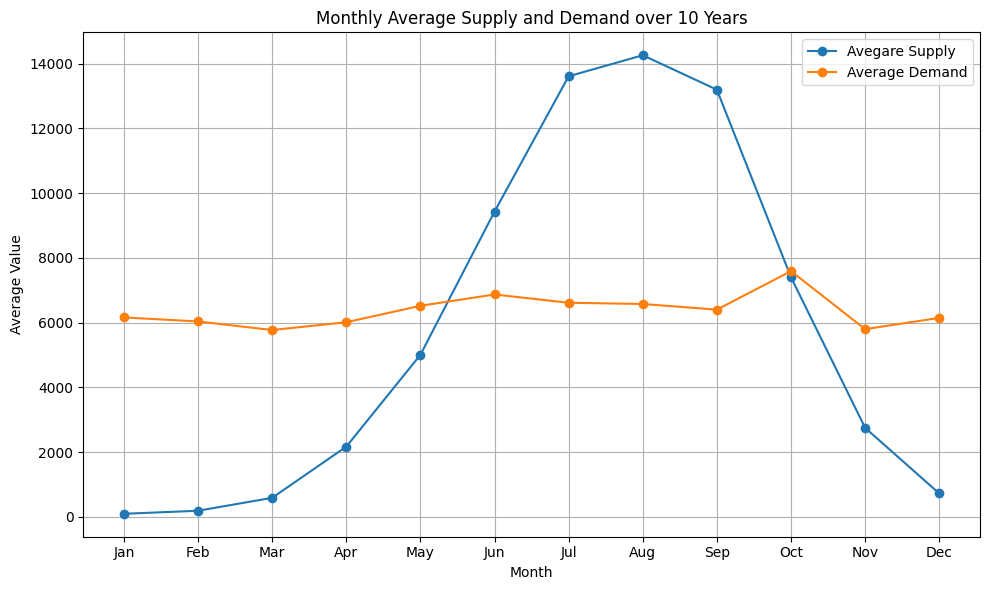

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan data sudah dibaca dari file CSV atau Excel
# Contoh: data = pd.read_csv('data.csv')

# Hitung rata-rata bulanan dari kolom 'Supply' dan 'Demand'
monthly_avg = data.groupby('Month')[['Supply', 'Demand']].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Supply'], marker='o', label='Avegare Supply')
plt.plot(monthly_avg.index, monthly_avg['Demand'], marker='o', label='Average Demand')

# Label dan judul
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Supply and Demand over 10 Years')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 2) AVERAGE 10 YEARS SUPPLY VS PRICE (2013 - 2022)

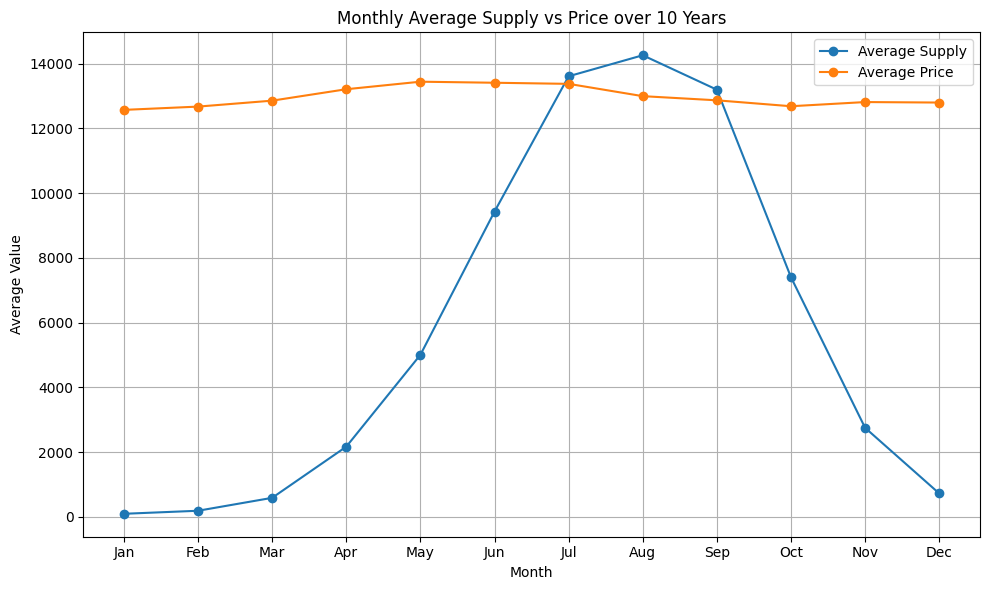

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan DataFrame bernama 'data'

# Hitung rata-rata per bulan
monthly_avg = data.groupby('Month')[['Supply', 'Price']].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Supply'], marker='o', label='Average Supply')
plt.plot(monthly_avg.index, monthly_avg['Price'], marker='o', label='Average Price')

# Format plot
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Supply vs Price over 10 Years')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 3) AVERAGE 10 YEARS DEMAND VS PRICE (2013 - 2022)

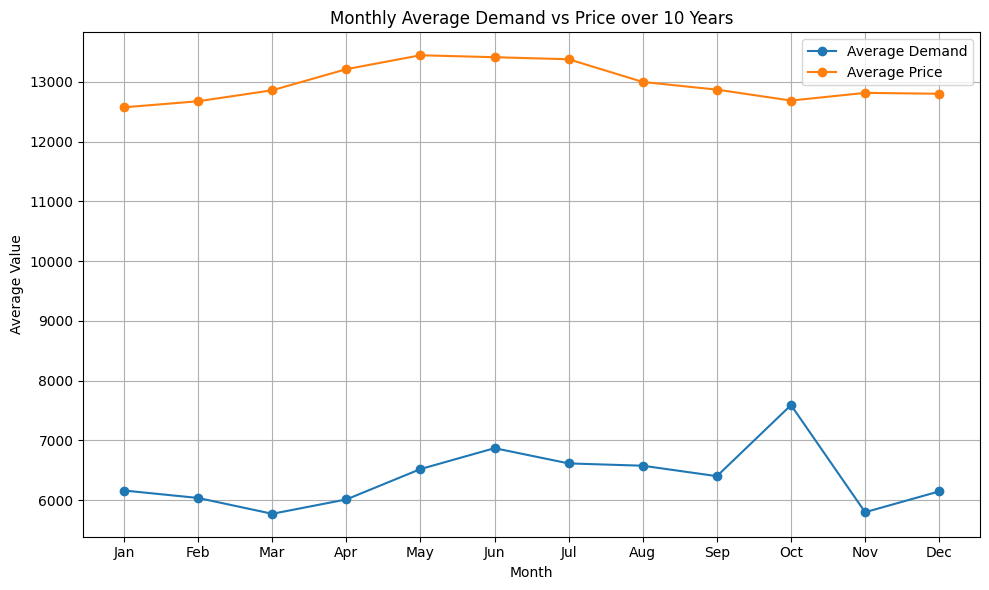

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan DataFrame sudah tersedia sebagai 'data'

# Hitung rata-rata bulanan
monthly_avg = data.groupby('Month')[['Demand', 'Price']].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Demand'], marker='o', label='Average Demand')
plt.plot(monthly_avg.index, monthly_avg['Price'], marker='o', label='Average Price')

# Format plot
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Demand vs Price over 10 Years')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 4) AVERAGE 10 YEARS DEMAND VS PRICE VS IMPORTATION VS PRODUCTION (2013 - 2022)

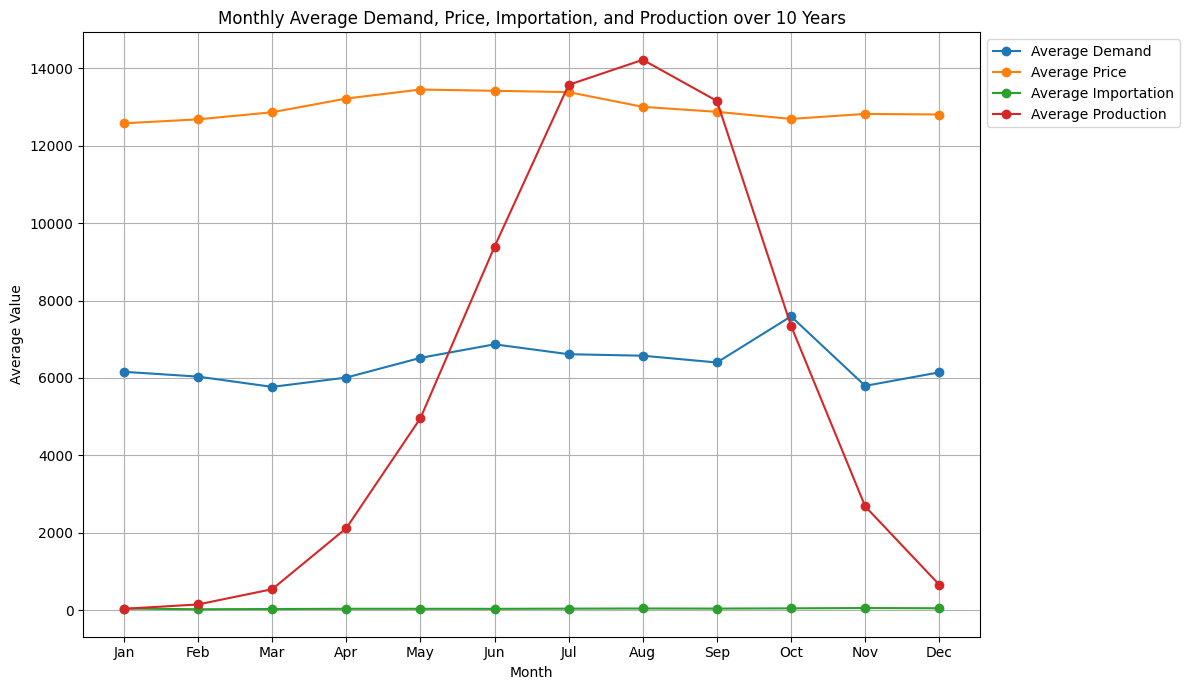

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan DataFrame sudah tersedia sebagai 'data'
# Dan kolom: 'Month', 'Demand', 'Price', 'Importation', 'Production'

# Hitung rata-rata bulanan
monthly_avg = data.groupby('Month')[['Demand', 'Price', 'Importation', 'Production']].mean()

# Plot
plt.figure(figsize=(12, 7))
plt.plot(monthly_avg.index, monthly_avg['Demand'], marker='o', label='Average Demand')
plt.plot(monthly_avg.index, monthly_avg['Price'], marker='o', label='Average Price')
plt.plot(monthly_avg.index, monthly_avg['Importation'], marker='o', label='Average Importation')
plt.plot(monthly_avg.index, monthly_avg['Production'], marker='o', label='Average Production')

# Format plot
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Demand, Price, Importation, and Production over 10 Years')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## 5) AVERAGE 10 YEARS ECONOMY GROWTH (%) VS INFLATION (2013 - 2022)

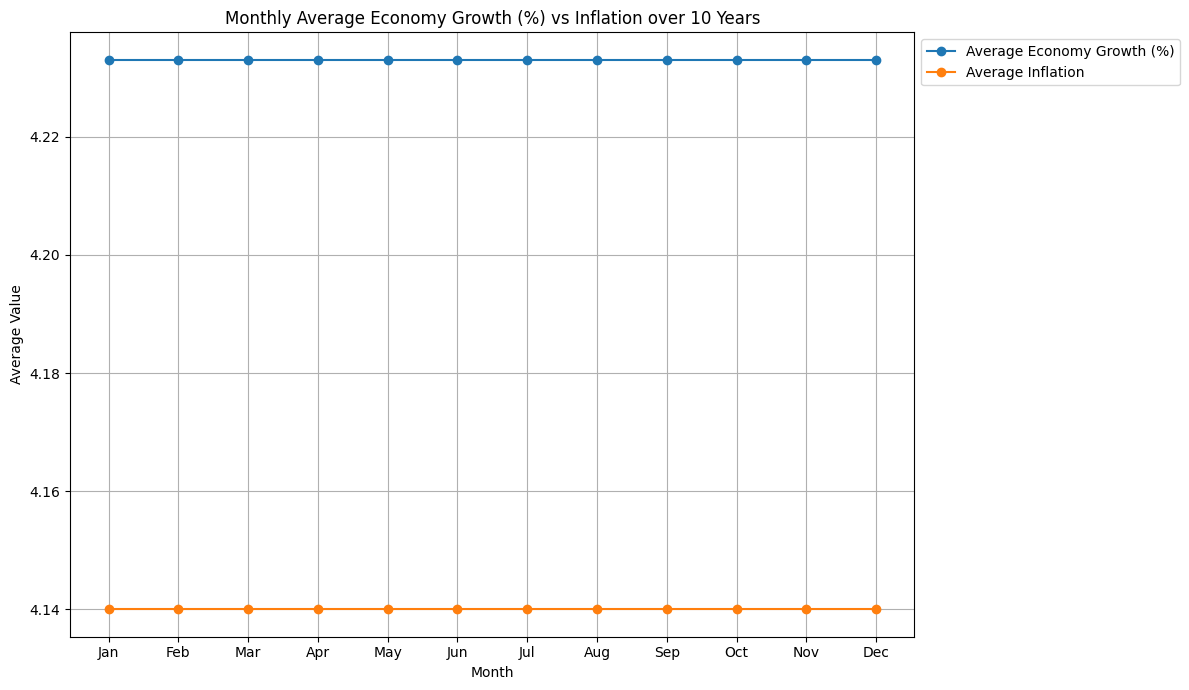

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan DataFrame sudah tersedia sebagai 'data'
# Dan kolom: 'Month', 'Demand', 'Price', 'Importation', 'Production'

# Hitung rata-rata bulanan
monthly_avg = data.groupby('Month')[['Economy Growth (%)', 'Inflation']].mean()

# Plot
plt.figure(figsize=(12, 7))
plt.plot(monthly_avg.index, monthly_avg['Economy Growth (%)'], marker='o', label='Average Economy Growth (%)')
plt.plot(monthly_avg.index, monthly_avg['Inflation'], marker='o', label='Average Inflation')

# Format plot
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Economy Growth (%) vs Inflation over 10 Years')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## 6) YEARLY PRODUCTION VS IMPORT VS SUPPLY (2013 - 2022)

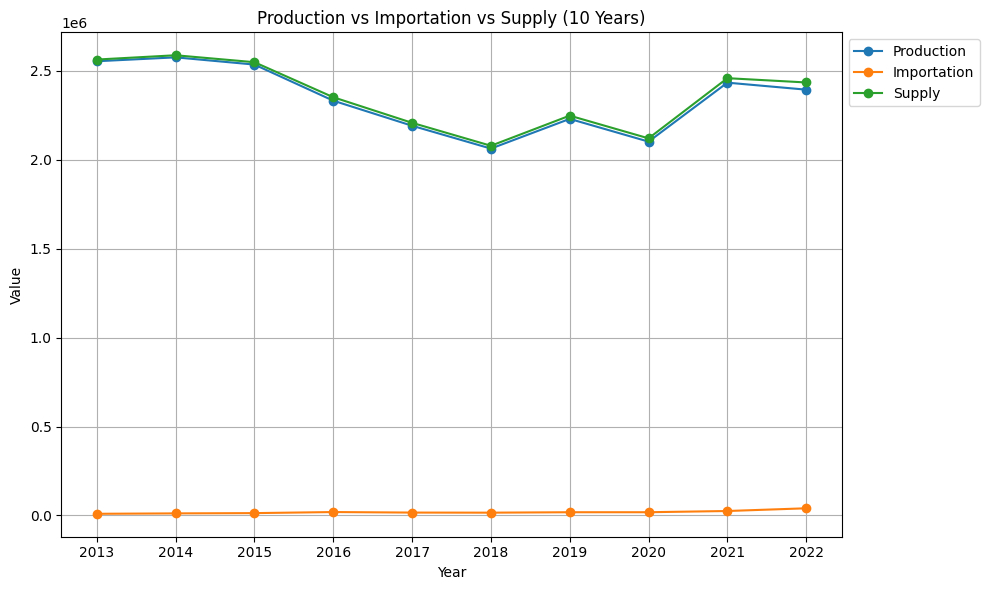

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan data sudah dalam DataFrame 'data'

# Hitung total (atau bisa juga pakai .mean()) per tahun
yearly_sum = data.groupby('Year')[['Production', 'Importation', 'Supply']].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum['Production'], marker='o', label='Production')
plt.plot(yearly_sum.index, yearly_sum['Importation'], marker='o', label='Importation')
plt.plot(yearly_sum.index, yearly_sum['Supply'], marker='o', label='Supply')

# Label dan format
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Production vs Importation vs Supply (10 Years)')
plt.xticks(yearly_sum.index)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## 7) YEARLY DEMAND (2013 - 2022)

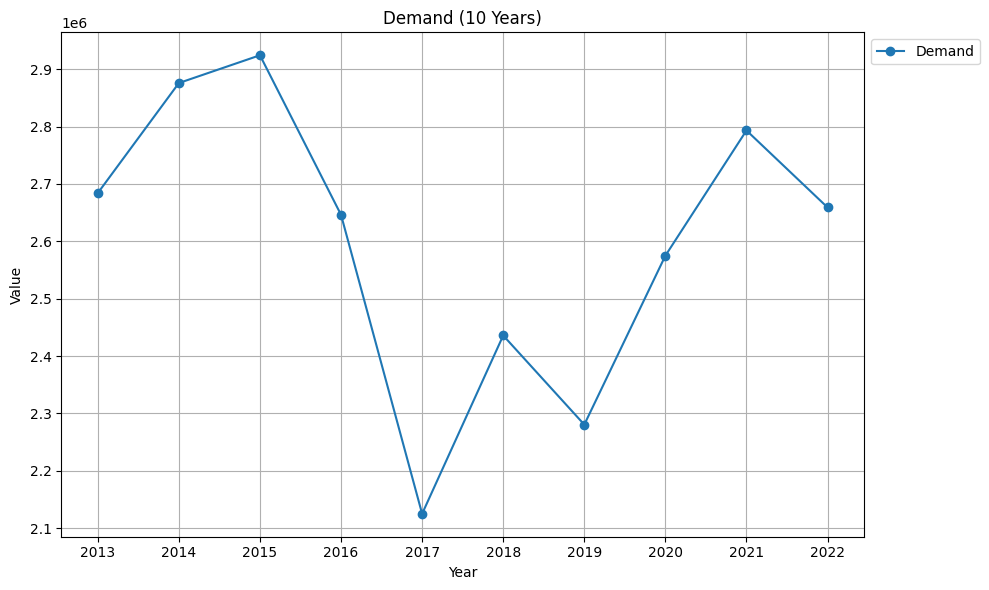

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan data sudah dalam DataFrame 'data'

# Hitung total (atau bisa juga pakai .mean()) per tahun
yearly_sum = data.groupby('Year')[['Demand']].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum['Demand'], marker='o', label='Demand')


# Label dan format
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Demand (10 Years)')
plt.xticks(yearly_sum.index)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## 8) YEARLY PRICE (2013 - 2022)

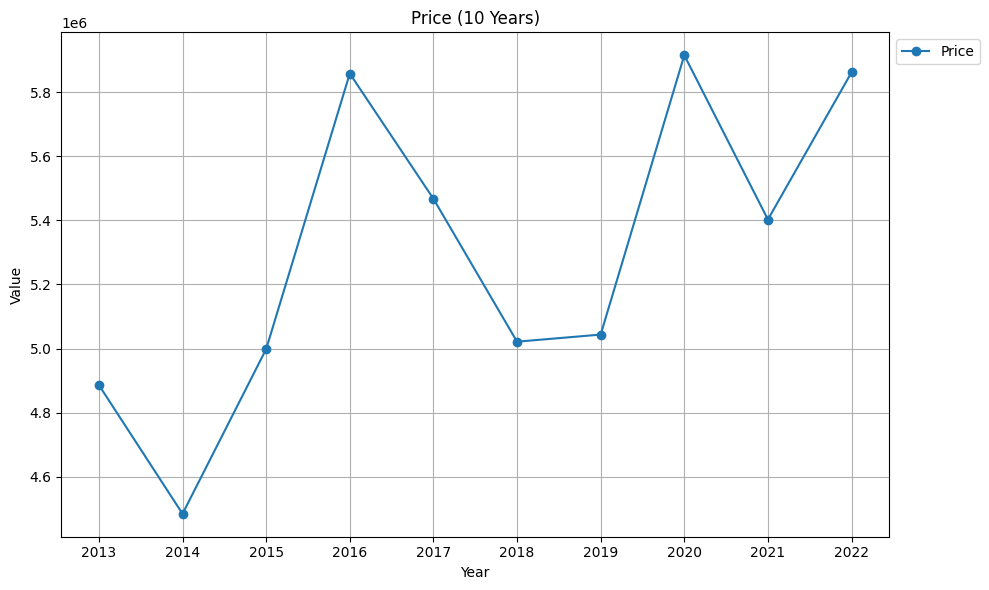

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan data sudah dalam DataFrame 'data'

# Hitung total (atau bisa juga pakai .mean()) per tahun
yearly_sum = data.groupby('Year')[['Price']].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum['Price'], marker='o', label='Price')


# Label dan format
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Price (10 Years)')
plt.xticks(yearly_sum.index)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## 9) YEARLY ECONOMY GROWTH (%) VS INFLATION

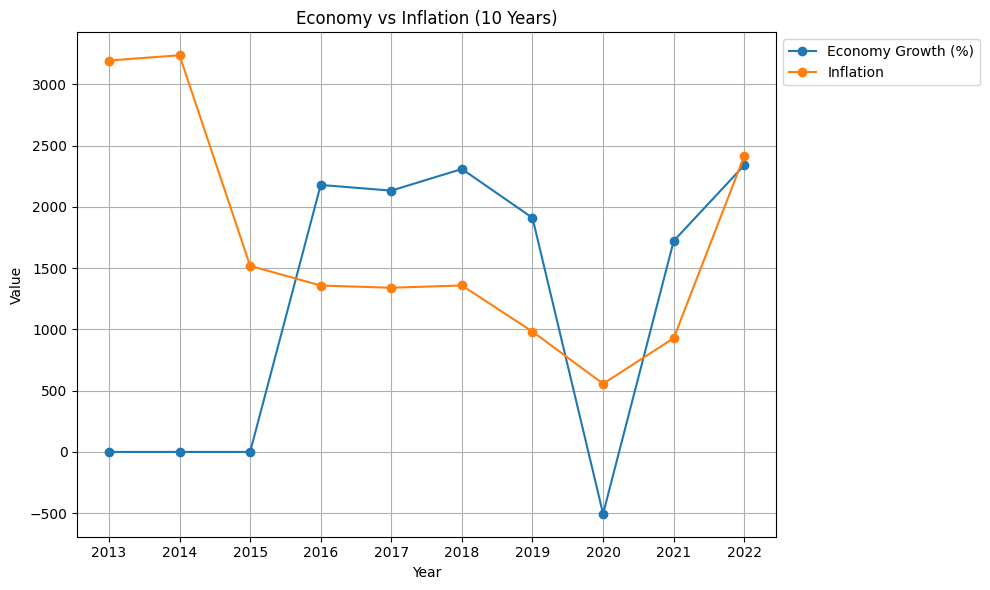

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan data sudah dalam DataFrame 'data'

# Hitung total (atau bisa juga pakai .mean()) per tahun
yearly_sum = data.groupby('Year')[['Economy Growth (%)', 'Inflation',]].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum['Economy Growth (%)'], marker='o', label='Economy Growth (%)')
plt.plot(yearly_sum.index, yearly_sum['Inflation'], marker='o', label='Inflation')


# Label dan format
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Economy vs Inflation (10 Years)')
plt.xticks(yearly_sum.index)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


# ===

## 10) SUPPLY YEARLY TIAP PROVINSI

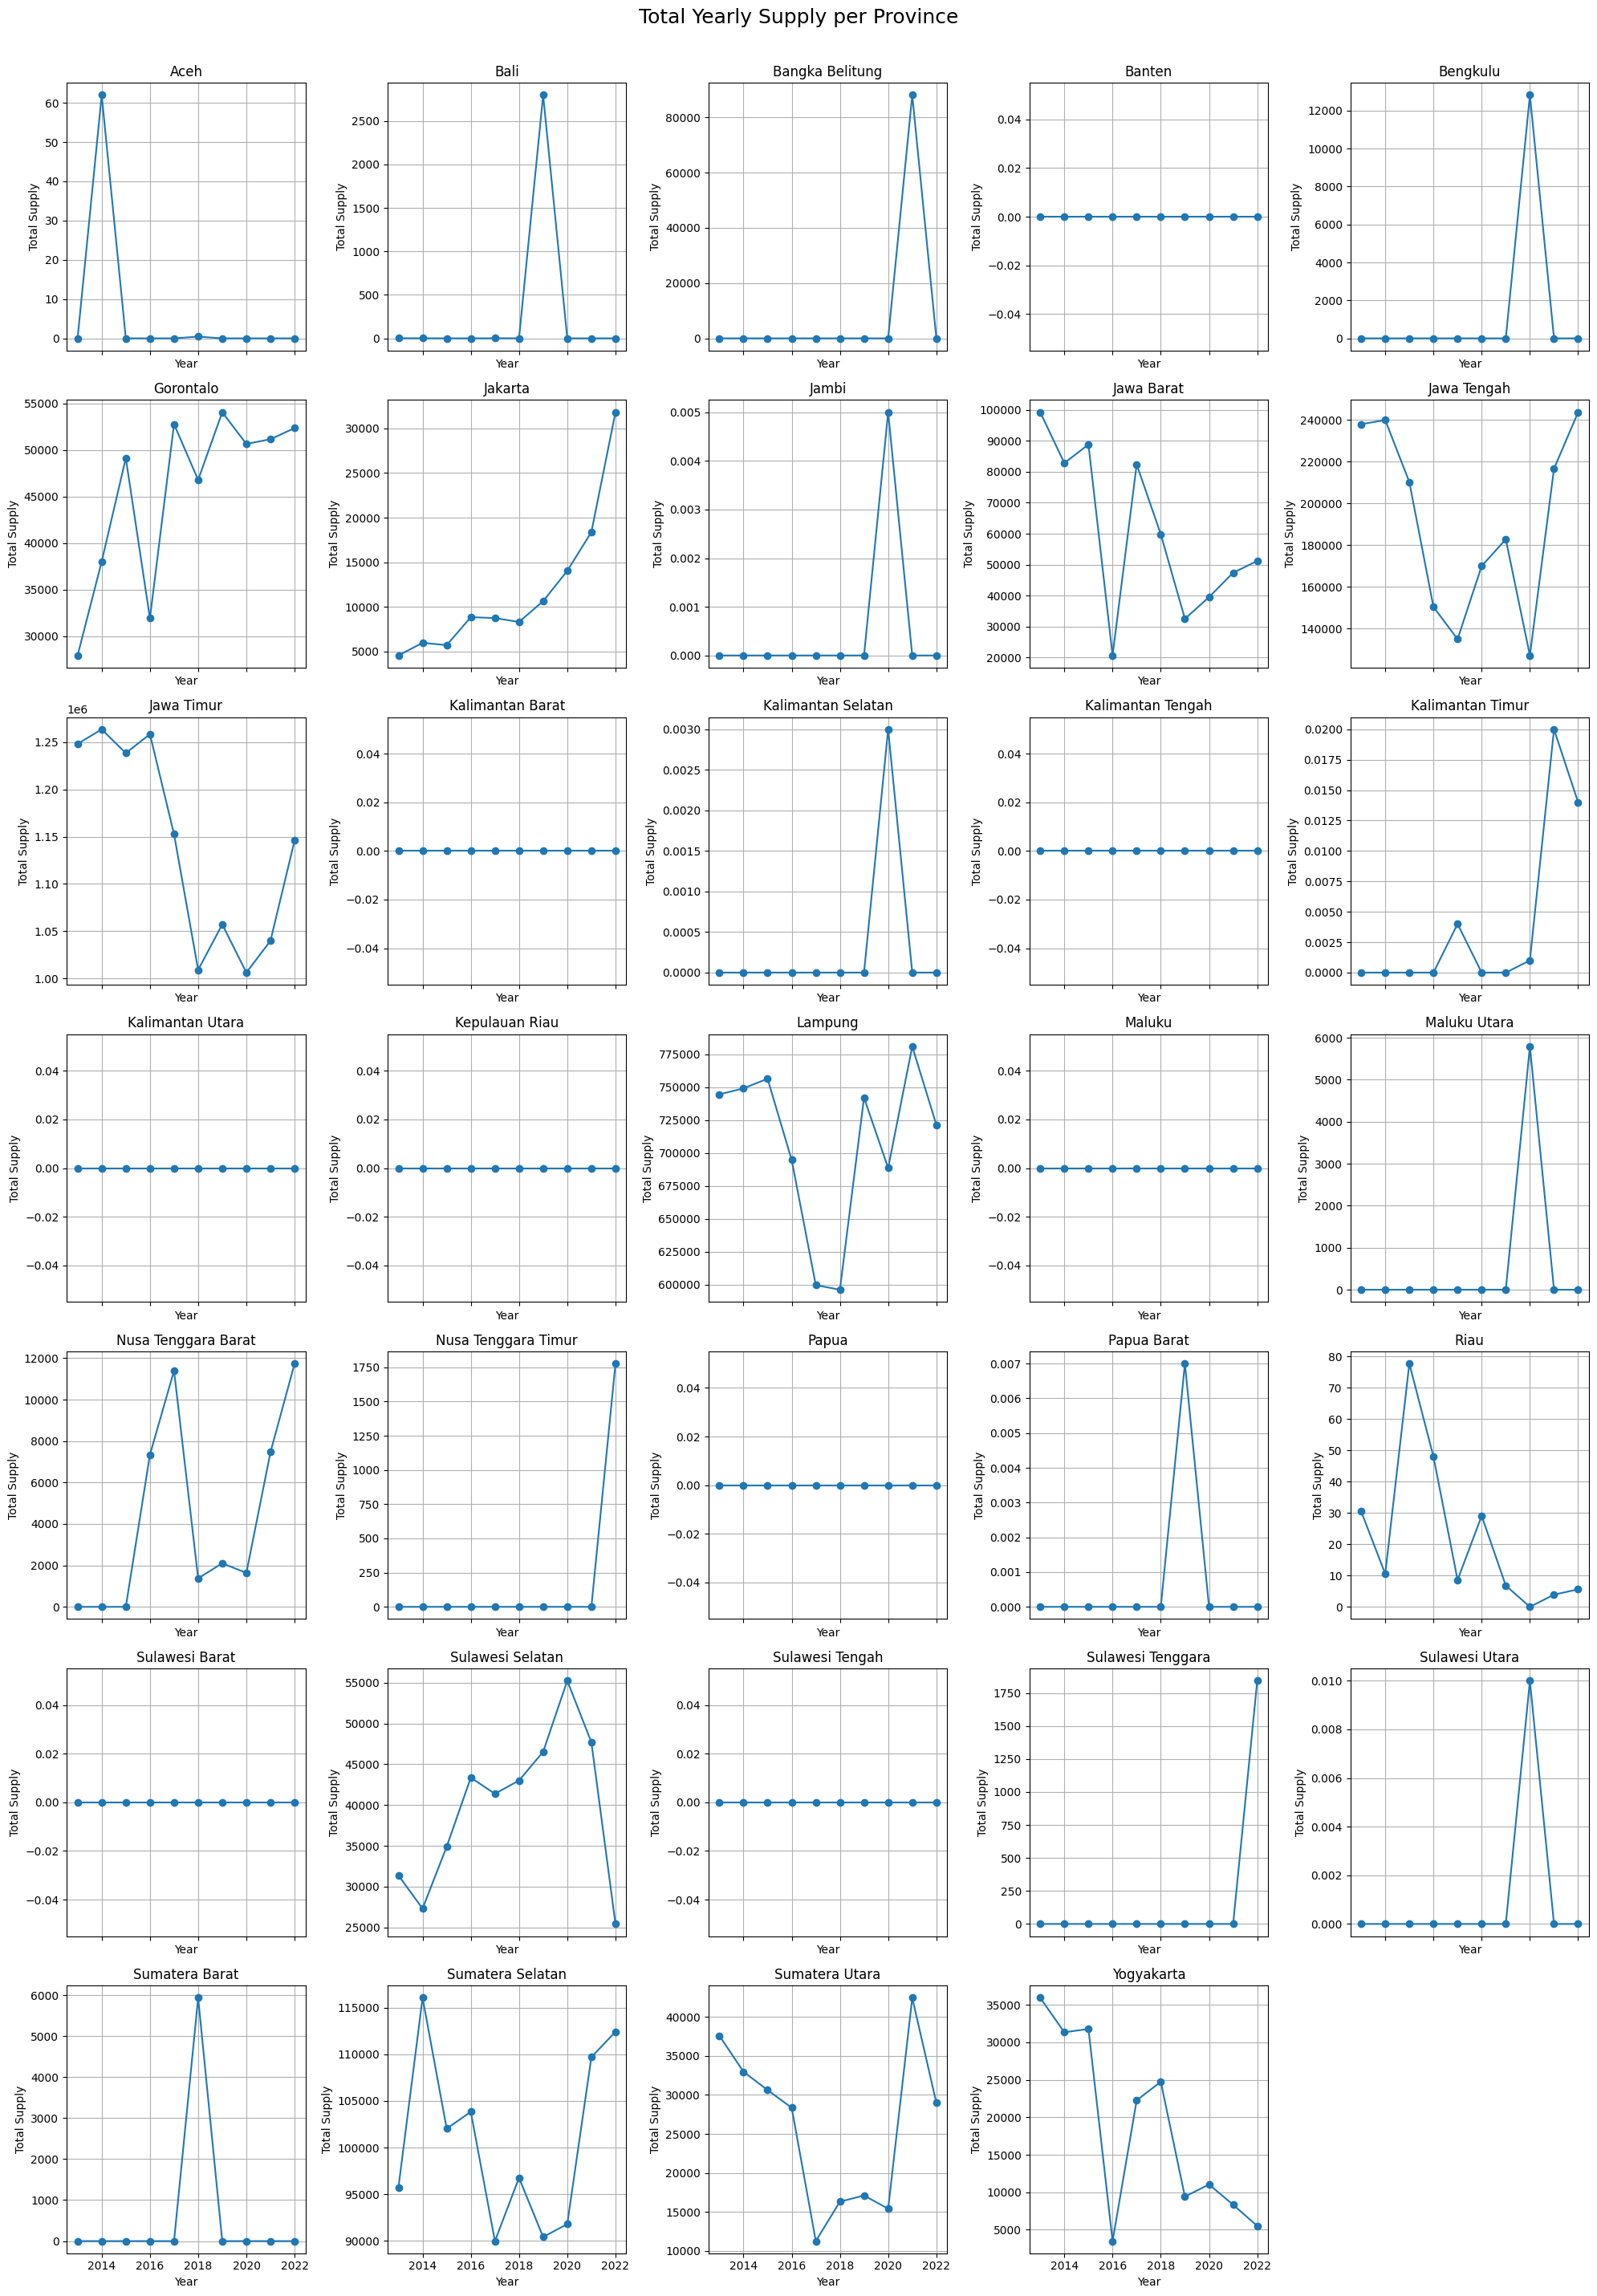

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Hitung total supply per Province per Year
yearly_supply = data.groupby(['Province', 'Year'])['Supply'].sum().reset_index()

# Dapatkan daftar provinsi unik
provinces = yearly_supply['Province'].unique()
n_provinces = len(provinces)

# Tentukan layout subplot: misalnya 5 kolom
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()  # Agar bisa diakses seperti array 1D

# Buat subplot untuk setiap provinsi
for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_supply[yearly_supply['Province'] == province]
    ax.plot(prov_data['Year'], prov_data['Supply'], marker='o')
    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Supply')

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Total Yearly Supply per Province', fontsize=18, y=1.02)
plt.show()


## 11) DEMAND YEARLY TIAP PROVINCE

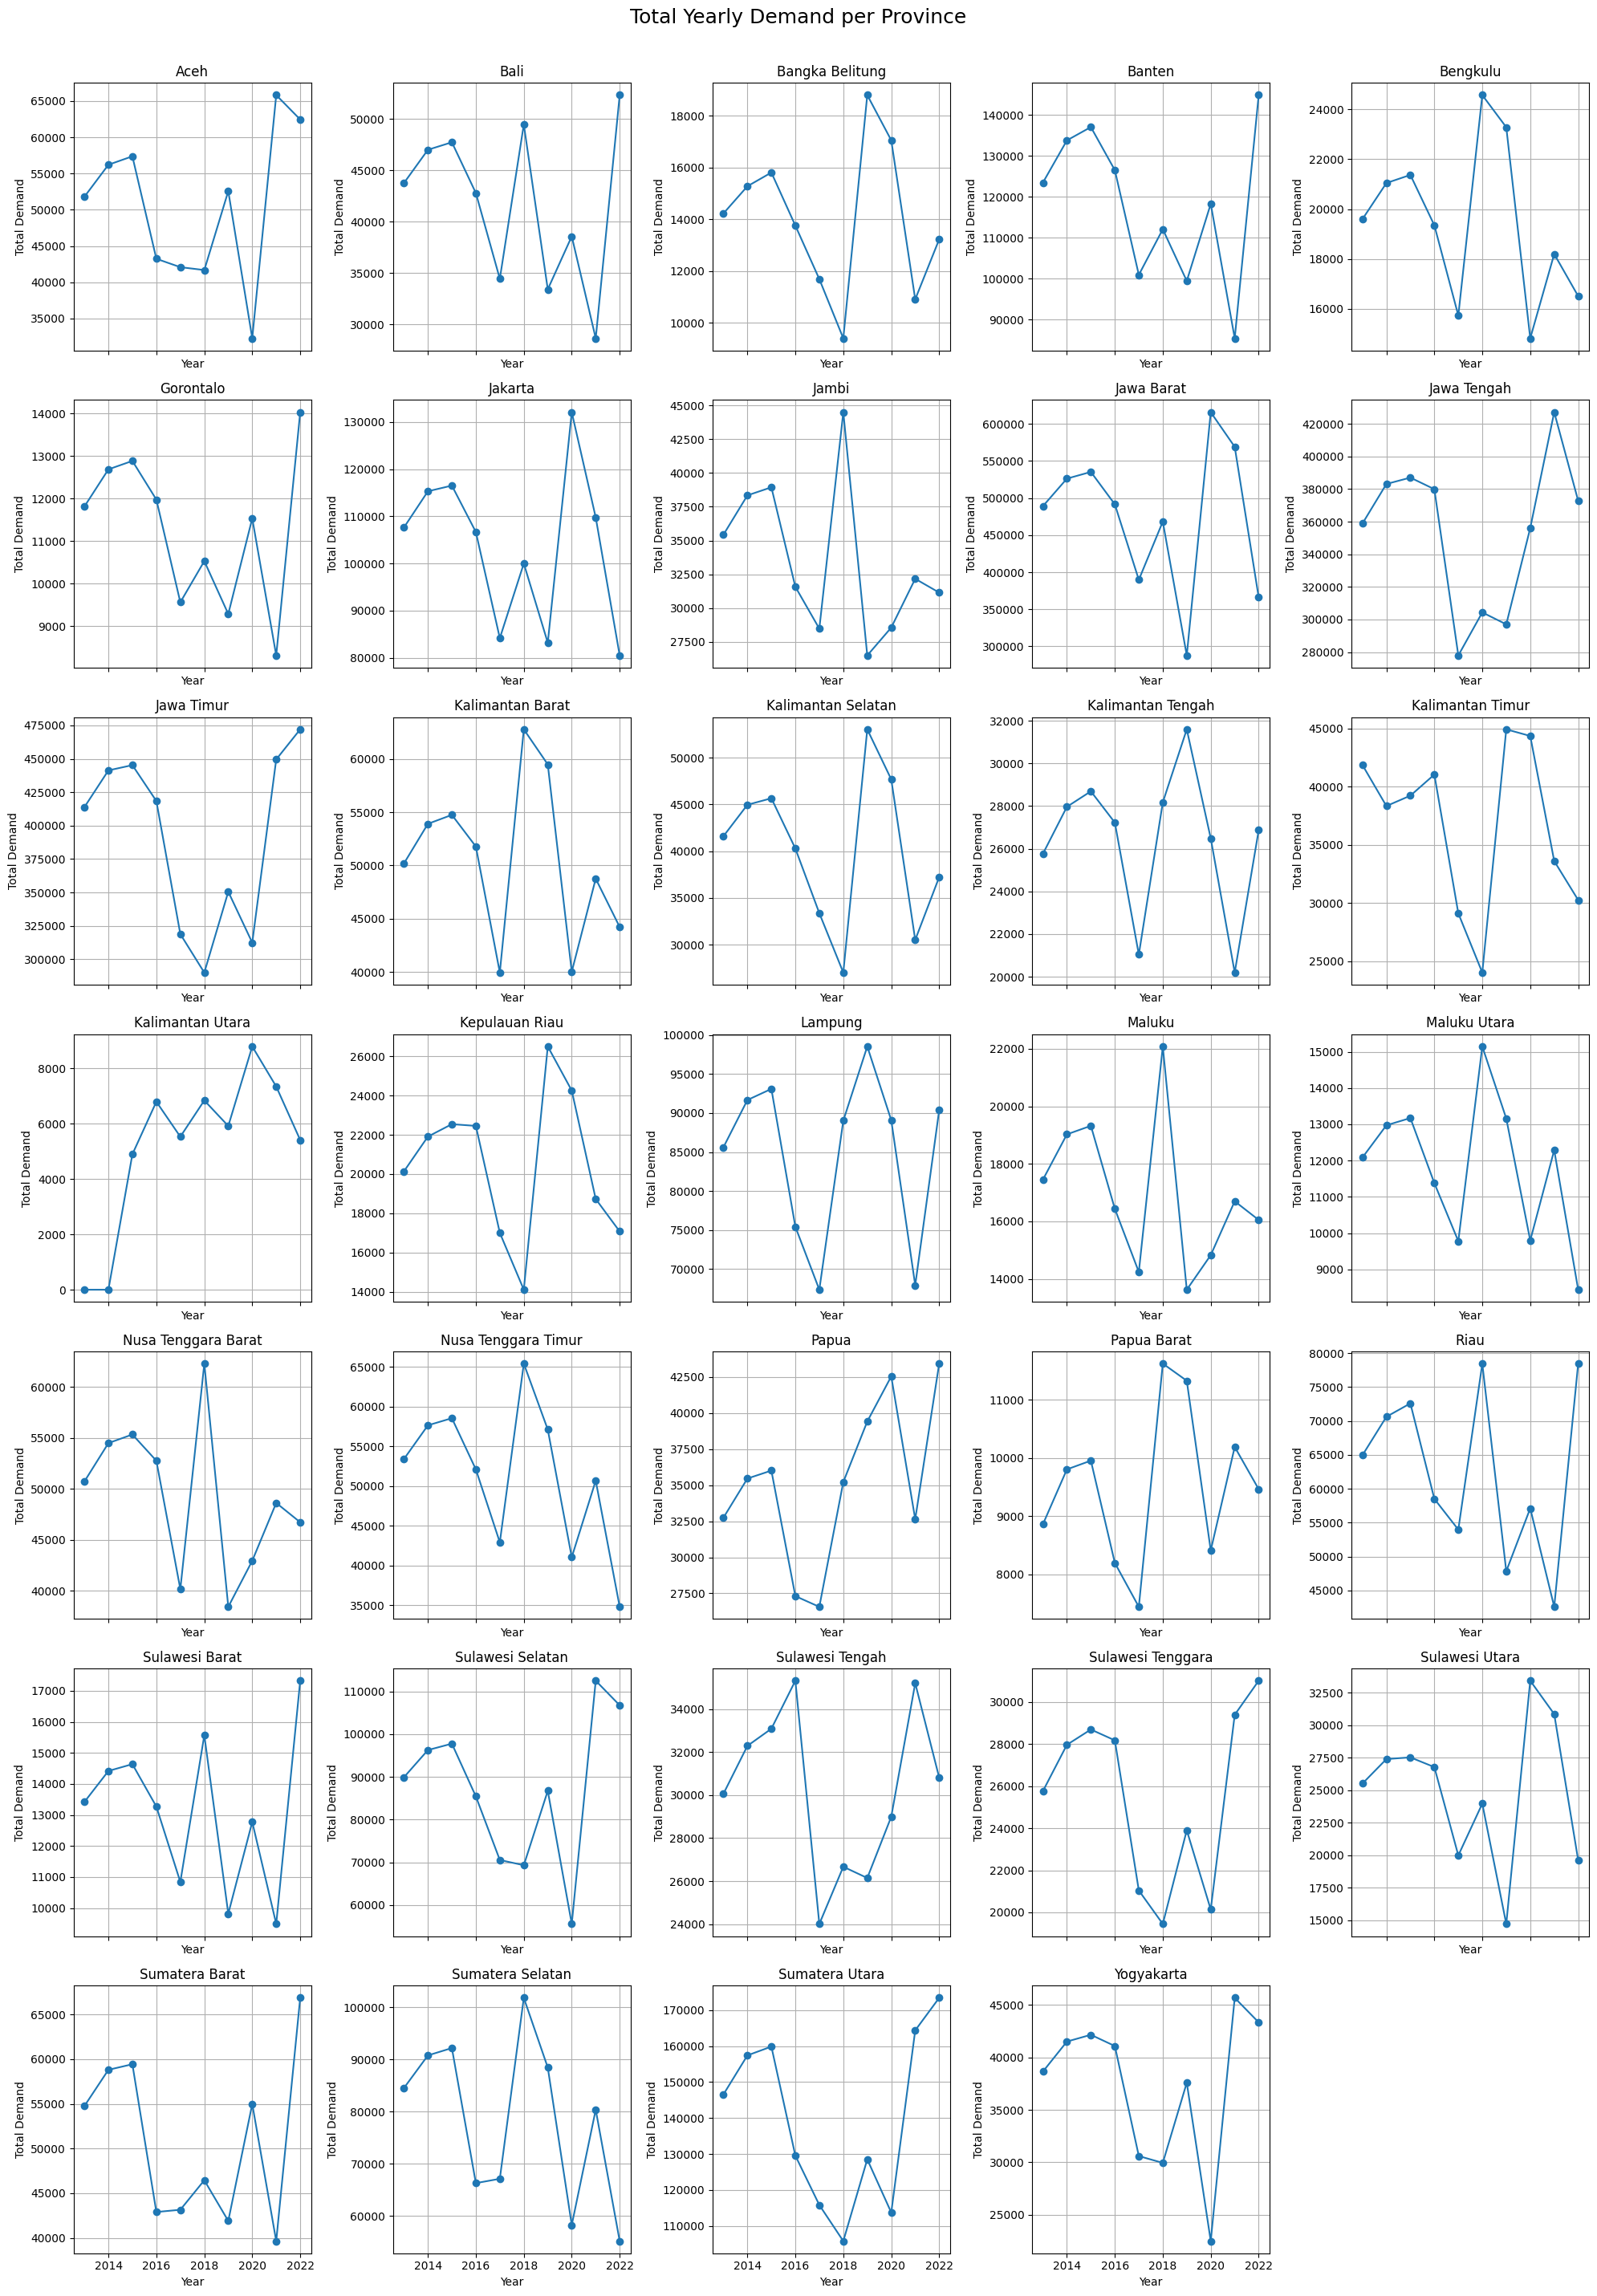

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import math


# Hitung total supply per Province per Year
yearly_demand = data.groupby(['Province', 'Year'])['Demand'].sum().reset_index()

# Dapatkan daftar provinsi unik
provinces = yearly_demand['Province'].unique()
n_provinces = len(provinces)

# Tentukan layout subplot: misalnya 5 kolom
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()  # Agar bisa diakses seperti array 1D

# Buat subplot untuk setiap provinsi
for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_demand[yearly_demand['Province'] == province]
    ax.plot(prov_data['Year'], prov_data['Demand'], marker='o')
    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Demand')

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Total Yearly Demand per Province', fontsize=18, y=1.02)
plt.show()


## 12) PRODUCTION YEARLY TIAP PROVINCE

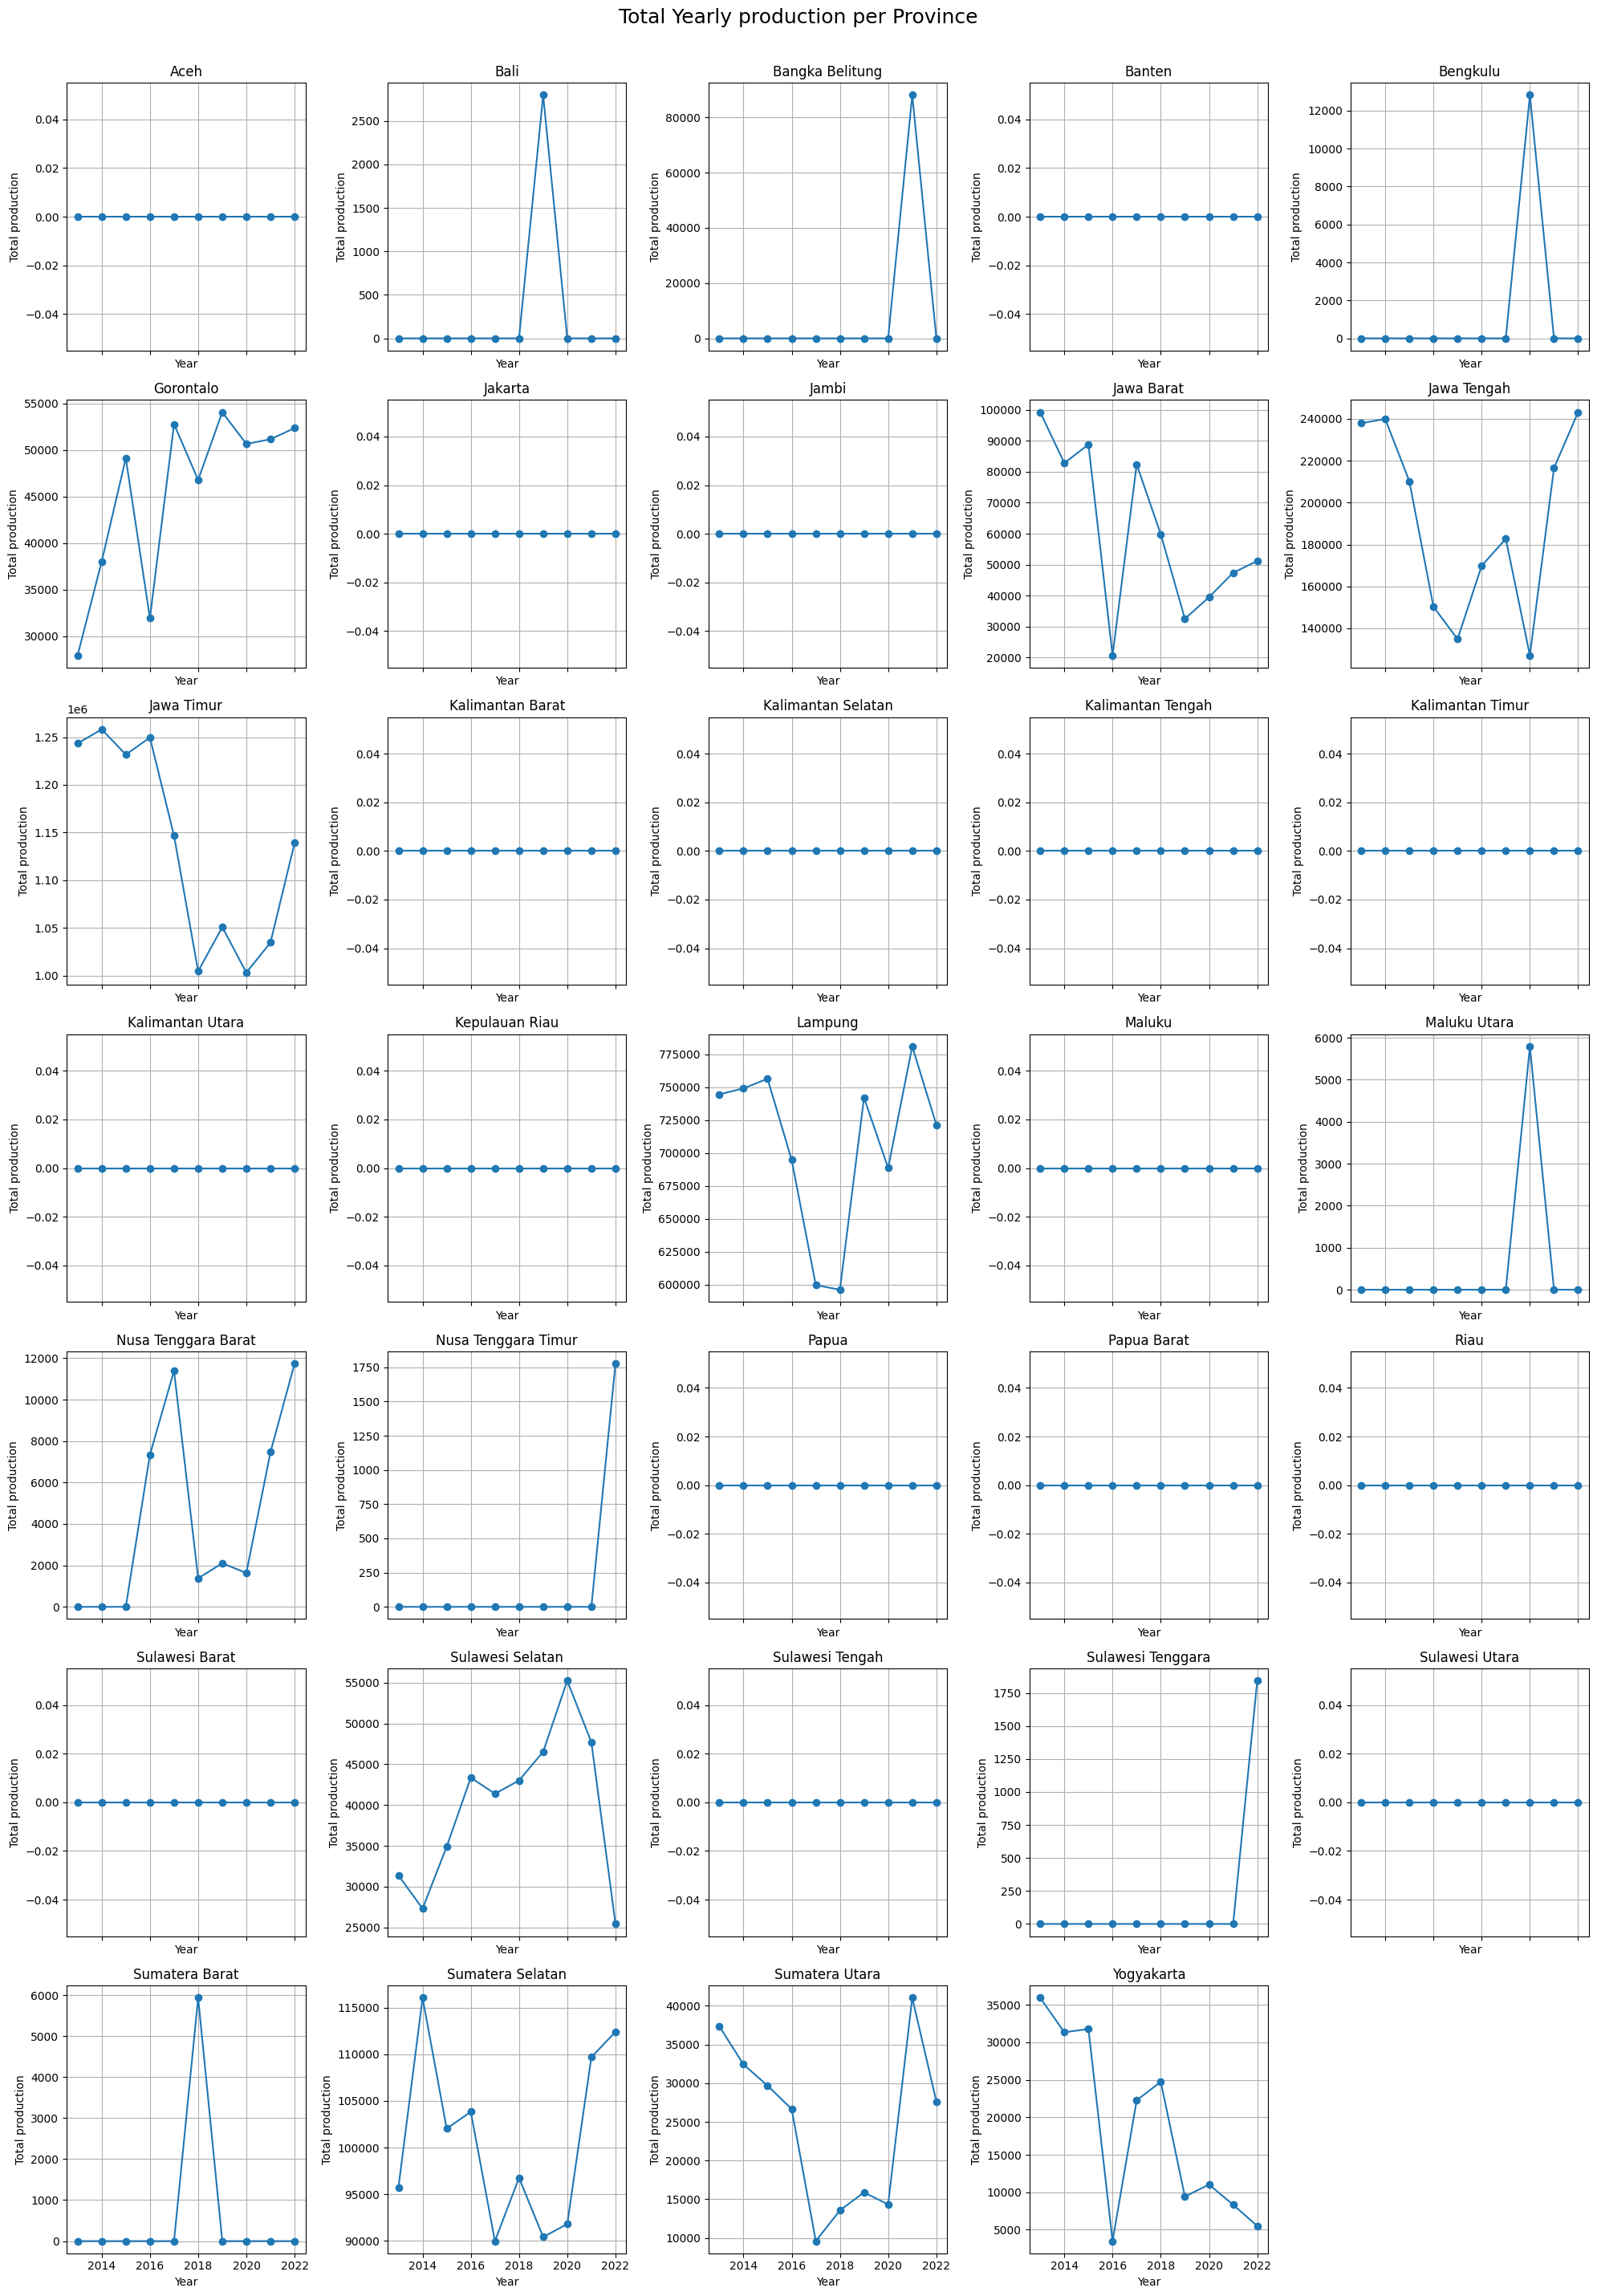

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import math


# Hitung total supply per Province per Year
yearly_production = data.groupby(['Province', 'Year'])['Production'].sum().reset_index()

# Dapatkan daftar provinsi unik
provinces = yearly_production['Province'].unique()
n_provinces = len(provinces)

# Tentukan layout subplot: misalnya 5 kolom
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()  # Agar bisa diakses seperti array 1D

# Buat subplot untuk setiap provinsi
for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_production[yearly_production['Province'] == province]
    ax.plot(prov_data['Year'], prov_data['Production'], marker='o')
    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total production')

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Total Yearly production per Province', fontsize=18, y=1.02)
plt.show()


## 13) IMPORTATION YEARLY TIAP PROVINCE

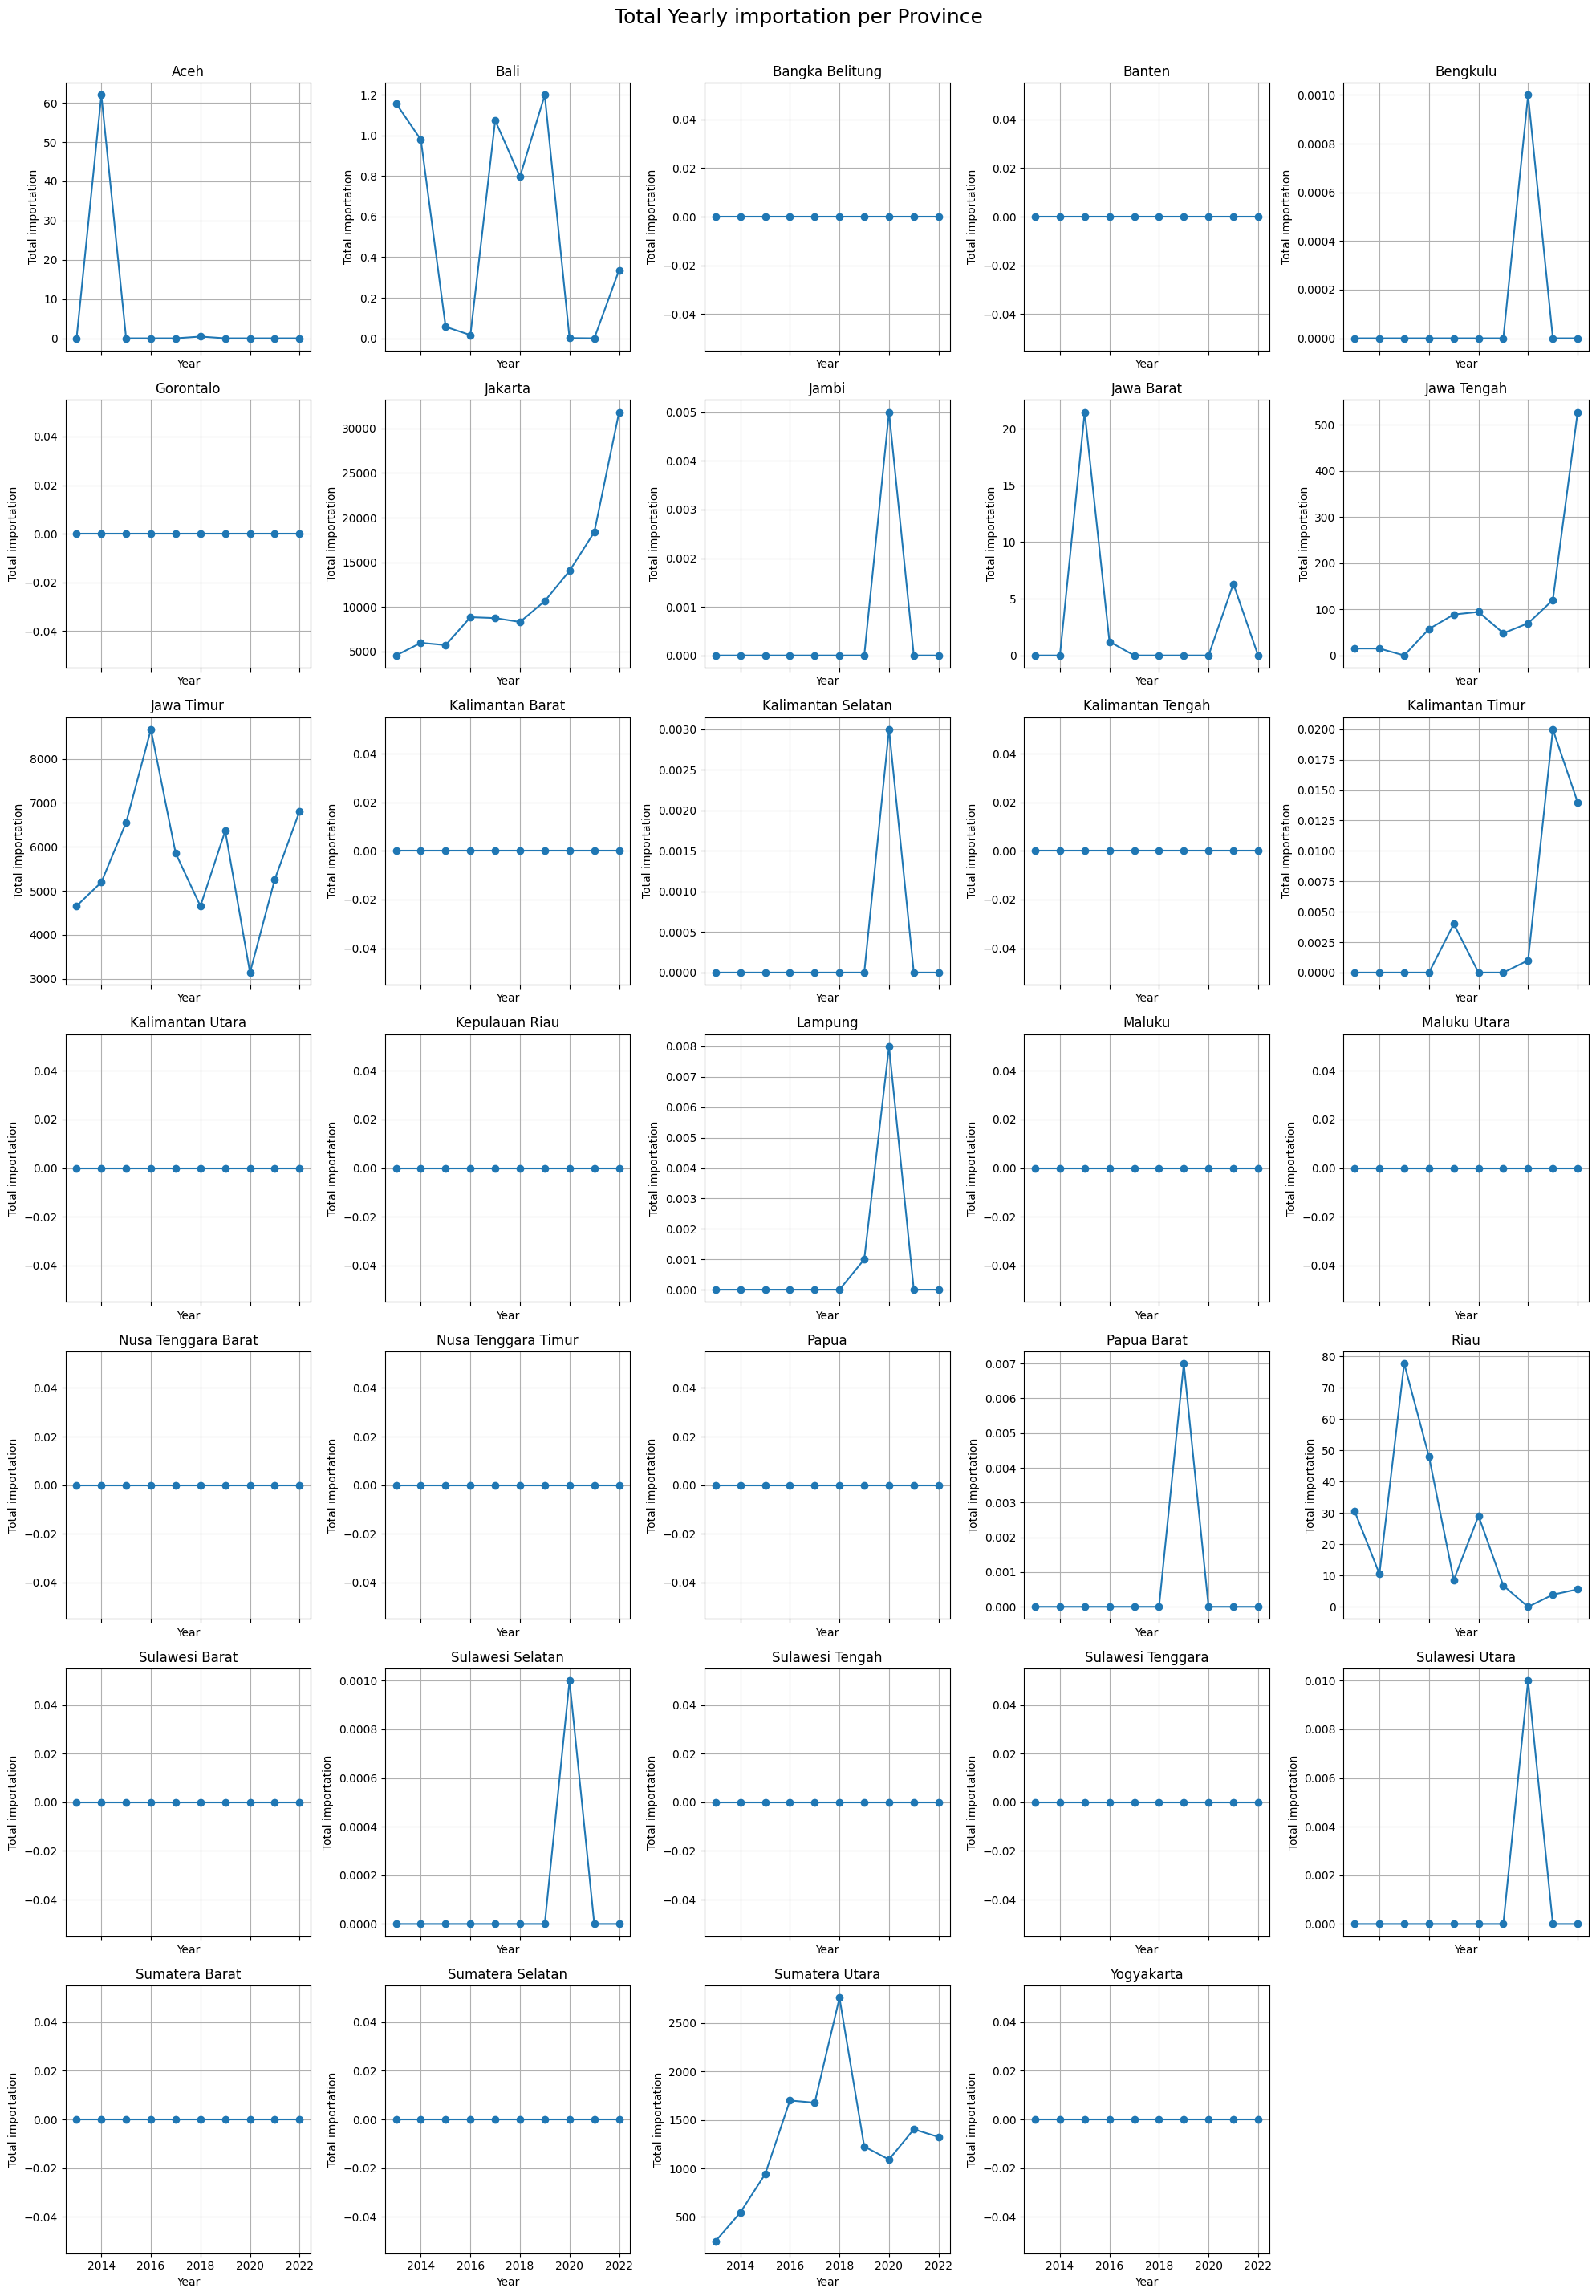

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import math


# Hitung total supply per Province per Year
yearly_importation = data.groupby(['Province', 'Year'])['Importation'].sum().reset_index()

# Dapatkan daftar provinsi unik
provinces = yearly_importation['Province'].unique()
n_provinces = len(provinces)

# Tentukan layout subplot: misalnya 5 kolom
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()  # Agar bisa diakses seperti array 1D

# Buat subplot untuk setiap provinsi
for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_importation[yearly_importation['Province'] == province]
    ax.plot(prov_data['Year'], prov_data['Importation'], marker='o')
    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total importation')

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Total Yearly importation per Province', fontsize=18, y=1.02)
plt.show()


## 14) PRICE YEARLY TIAP PROVINCE

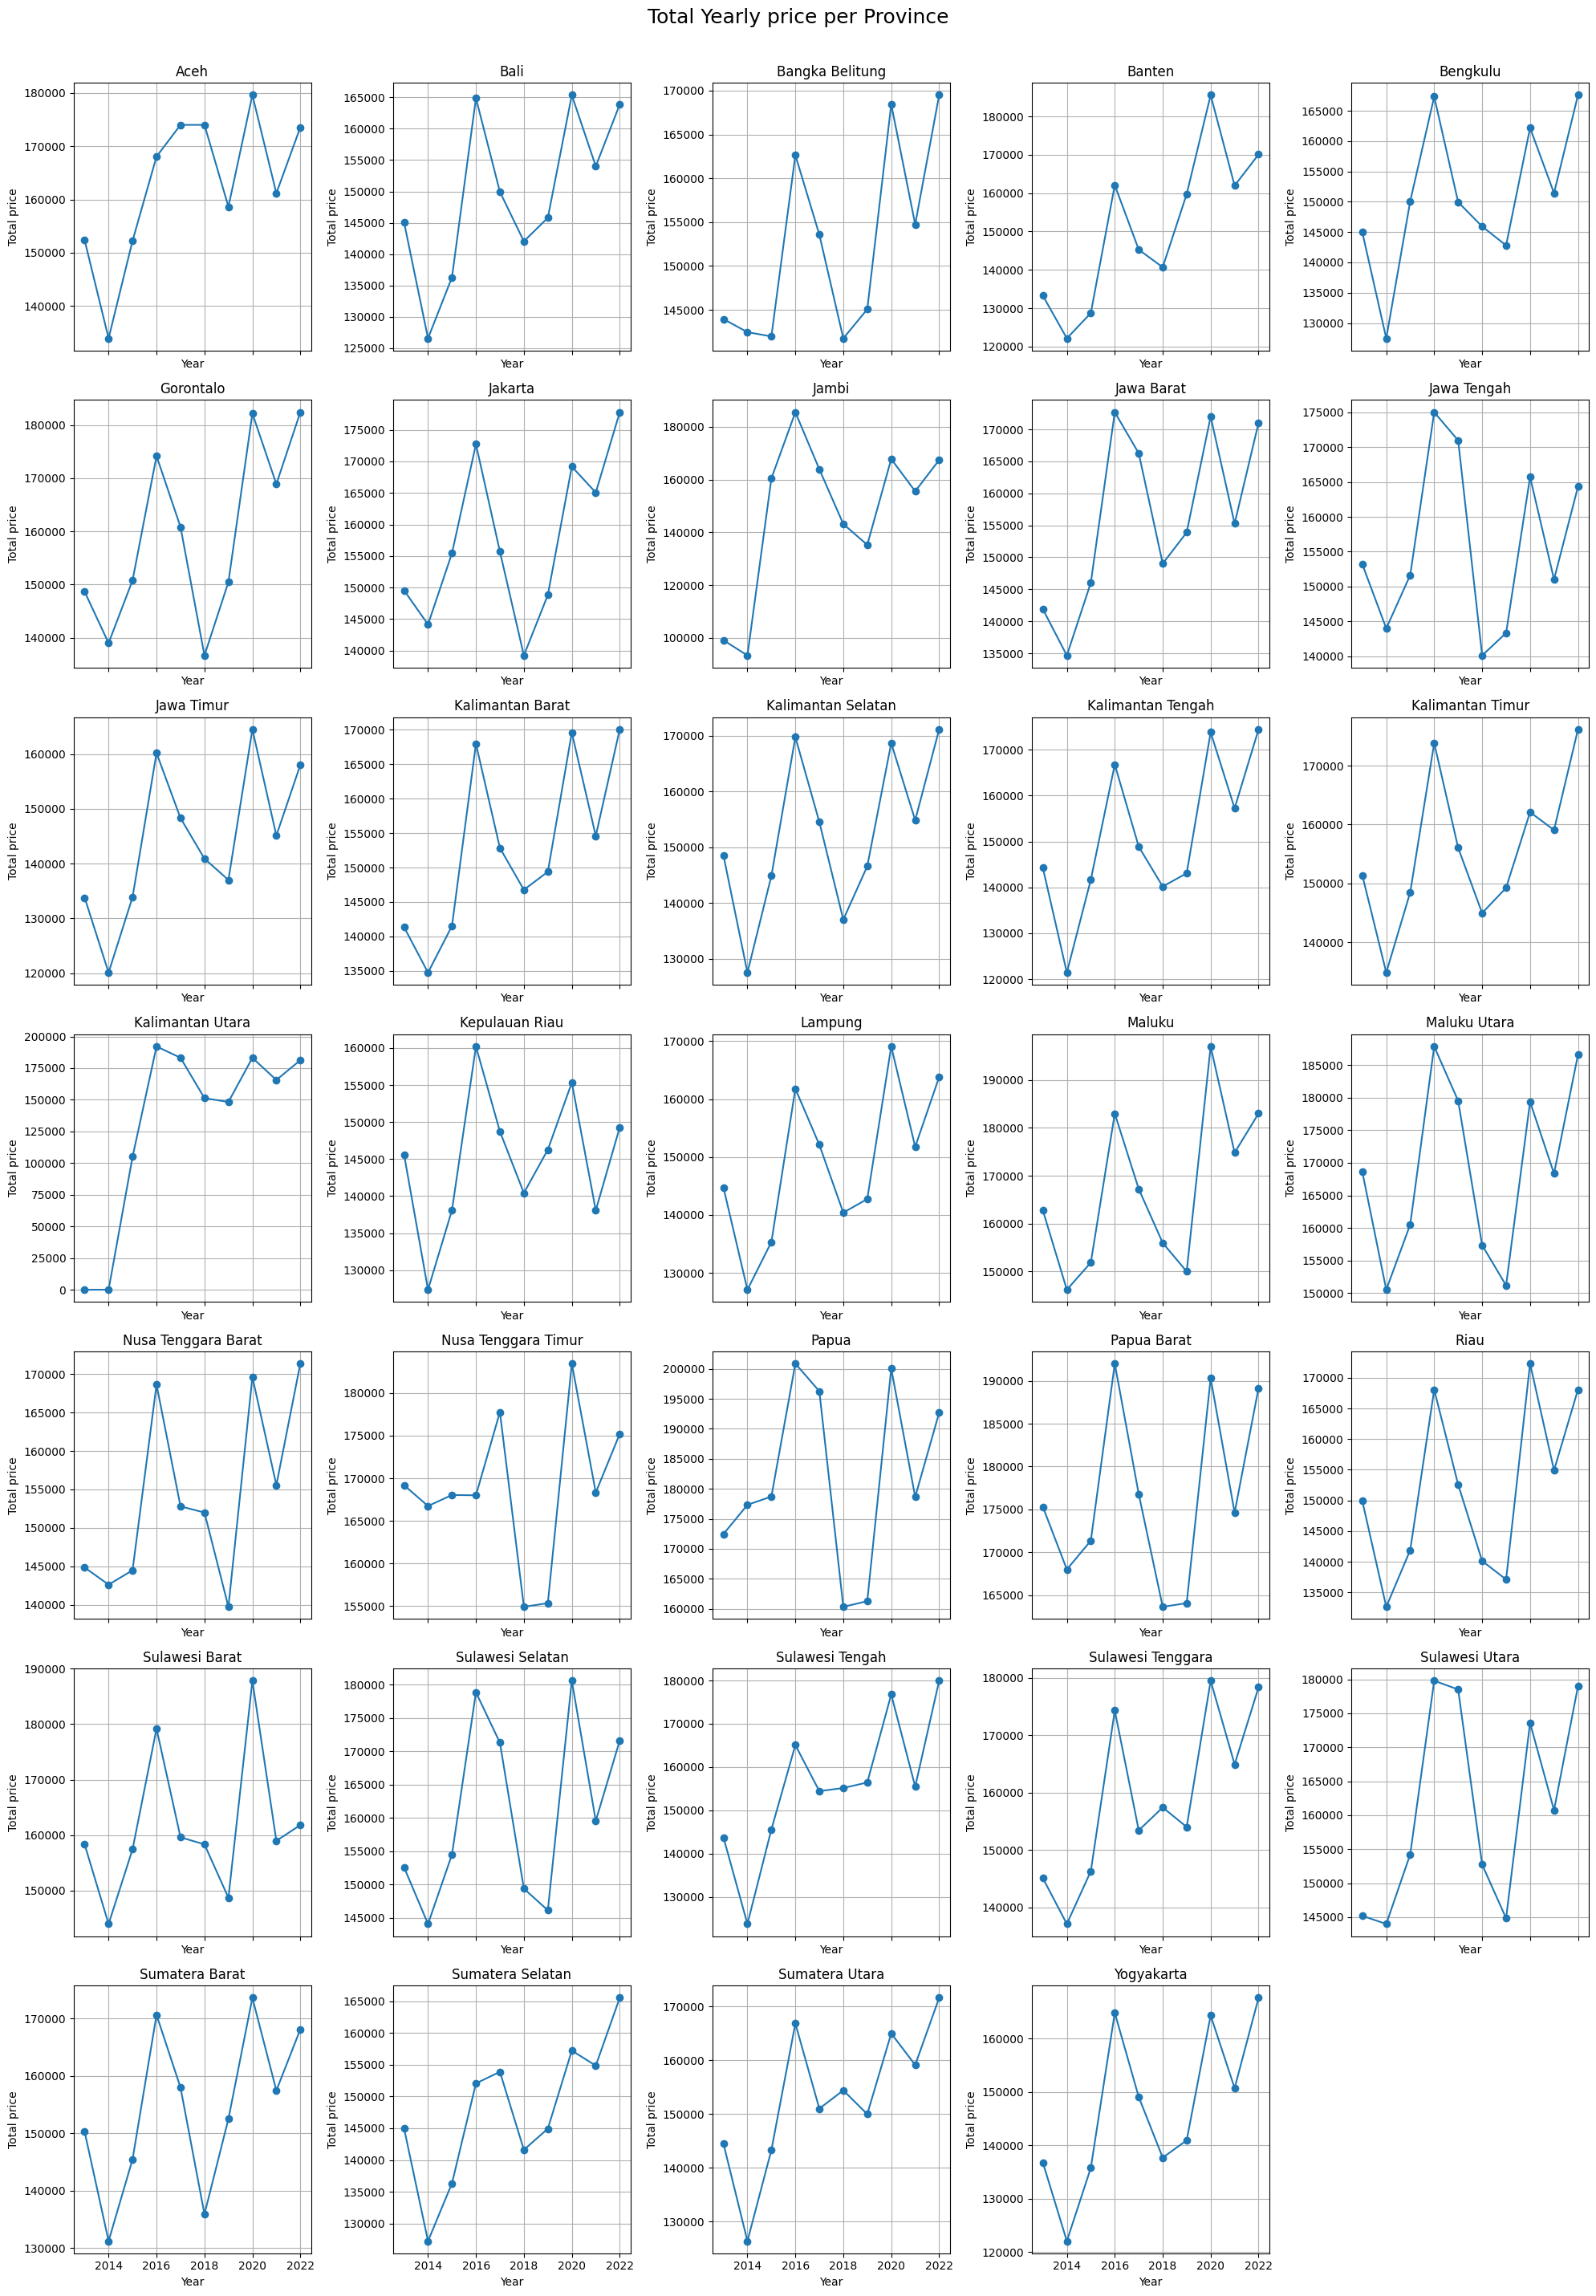

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import math


# Hitung total supply per Province per Year
yearly_price = data.groupby(['Province', 'Year'])['Price'].sum().reset_index()

# Dapatkan daftar provinsi unik
provinces = yearly_price['Province'].unique()
n_provinces = len(provinces)

# Tentukan layout subplot: misalnya 5 kolom
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()  # Agar bisa diakses seperti array 1D

# Buat subplot untuk setiap provinsi
for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_price[yearly_price['Province'] == province]
    ax.plot(prov_data['Year'], prov_data['Price'], marker='o')
    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total price')

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Total Yearly price per Province', fontsize=18, y=1.02)
plt.show()


## 15) ECONOMY GROWTH (%)

In [23]:
data.isna().sum()

Province                 0
Year                     0
Month                    0
Production               1
Importation              0
Demand                   1
Supply                   1
Price                    1
Population               0
Religious Holiday        0
Economy Growth (%)    1224
Inflation                0
dtype: int64

In [24]:
# Filter baris yang Economy Growth-nya NaN
missing_economy = data[data['Economy Growth (%)'].isna()]

# Group by Province dan Year, lalu hitung jumlah NaN
missing_summary = missing_economy.groupby(['Province', 'Year']).size().reset_index(name='Missing_Count')

# Tampilkan
print(missing_summary)


           Province  Year  Missing_Count
0              Aceh  2013             12
1              Aceh  2014             12
2              Aceh  2015             12
3              Bali  2013             12
4              Bali  2014             12
..              ...   ...            ...
97   Sumatera Utara  2014             12
98   Sumatera Utara  2015             12
99       Yogyakarta  2013             12
100      Yogyakarta  2014             12
101      Yogyakarta  2015             12

[102 rows x 3 columns]


In [25]:
missing_summary['Year'].value_counts()

Year
2013    34
2014    34
2015    34
Name: count, dtype: int64

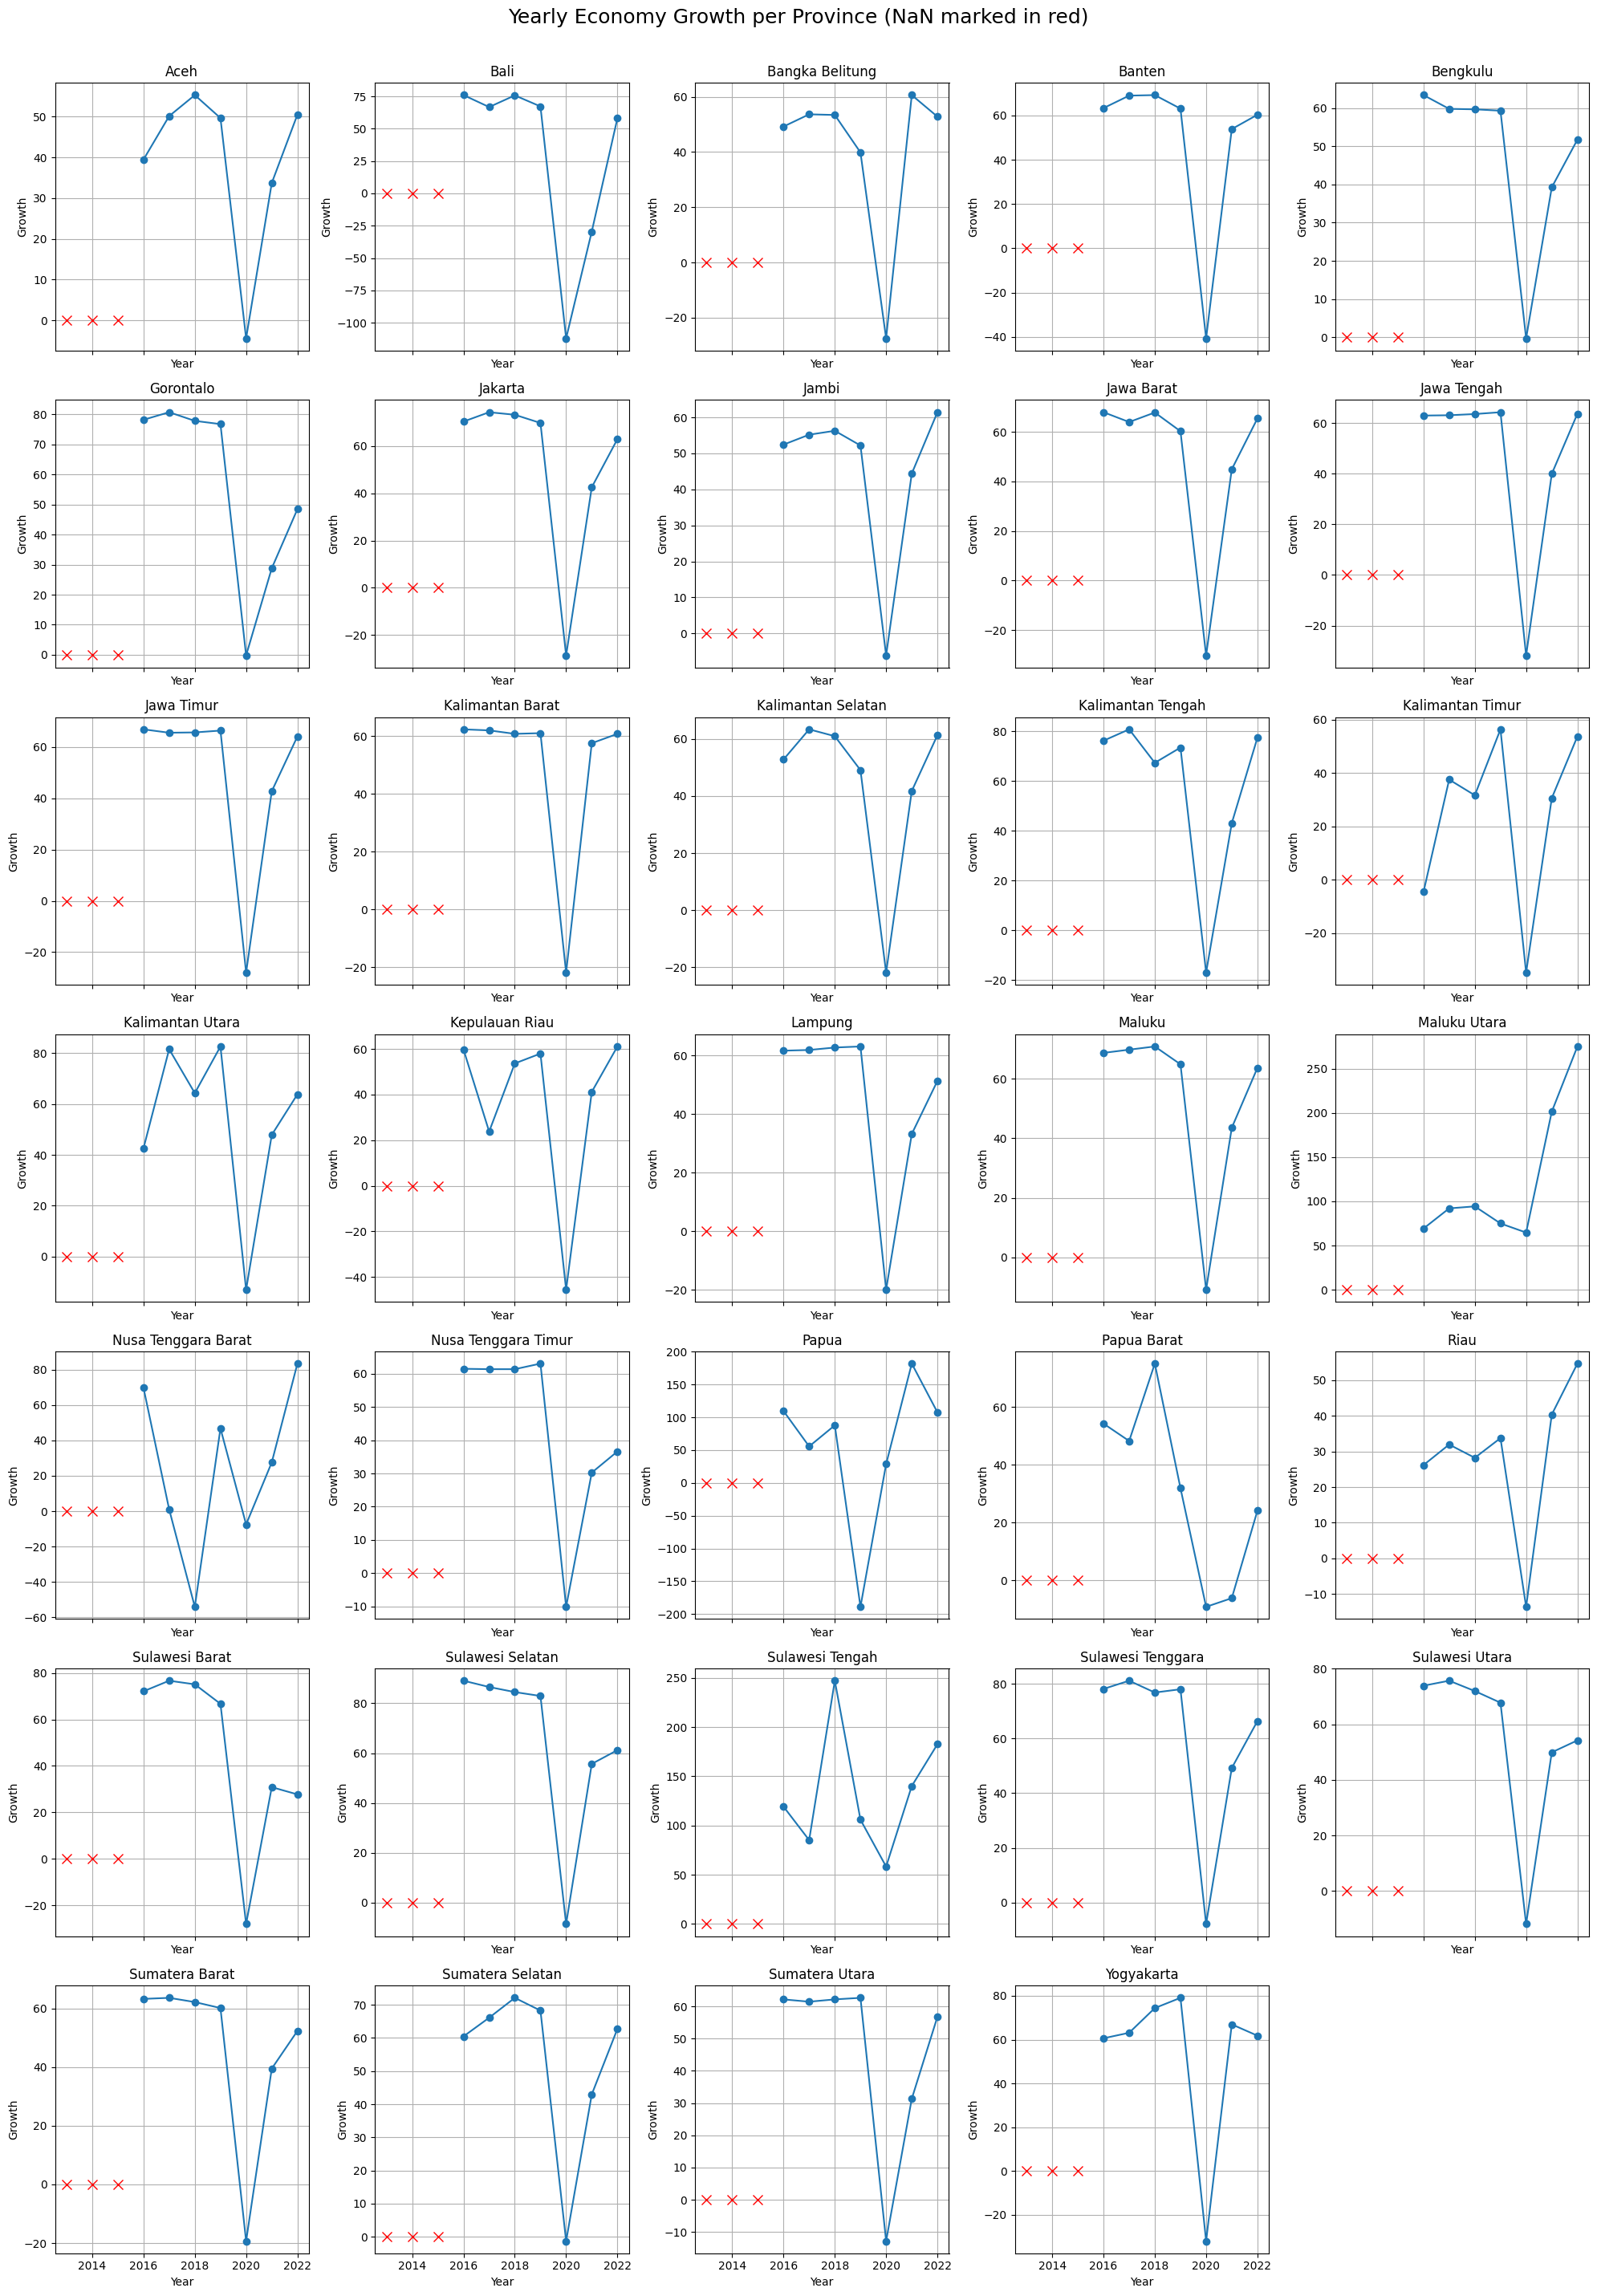

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Gunakan min_count agar NaN tetap muncul
yearly_economy = data.groupby(['Province', 'Year'])['Economy Growth (%)'] \
                     .agg(lambda x: x.sum(min_count=1)) \
                     .reset_index()

# Daftar provinsi
provinces = yearly_economy['Province'].unique()
n_provinces = len(provinces)

# Layout subplot
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_economy[yearly_economy['Province'] == province]

    # Plot garis normal
    ax.plot(prov_data['Year'], prov_data['Economy Growth (%)'], marker='o', label='Growth')

    # Tandai NaN dengan titik merah (Y=0 hanya placeholder)
    nan_data = prov_data[prov_data['Economy Growth (%)'].isna()]
    ax.plot(nan_data['Year'], [0]*len(nan_data), 'rx', label='Missing', markersize=8)

    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Growth')

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Yearly Economy Growth per Province (NaN marked in red)', fontsize=18, y=1.02)
plt.show()


## 16) INFLATION YERLY TIAP PROVINCE

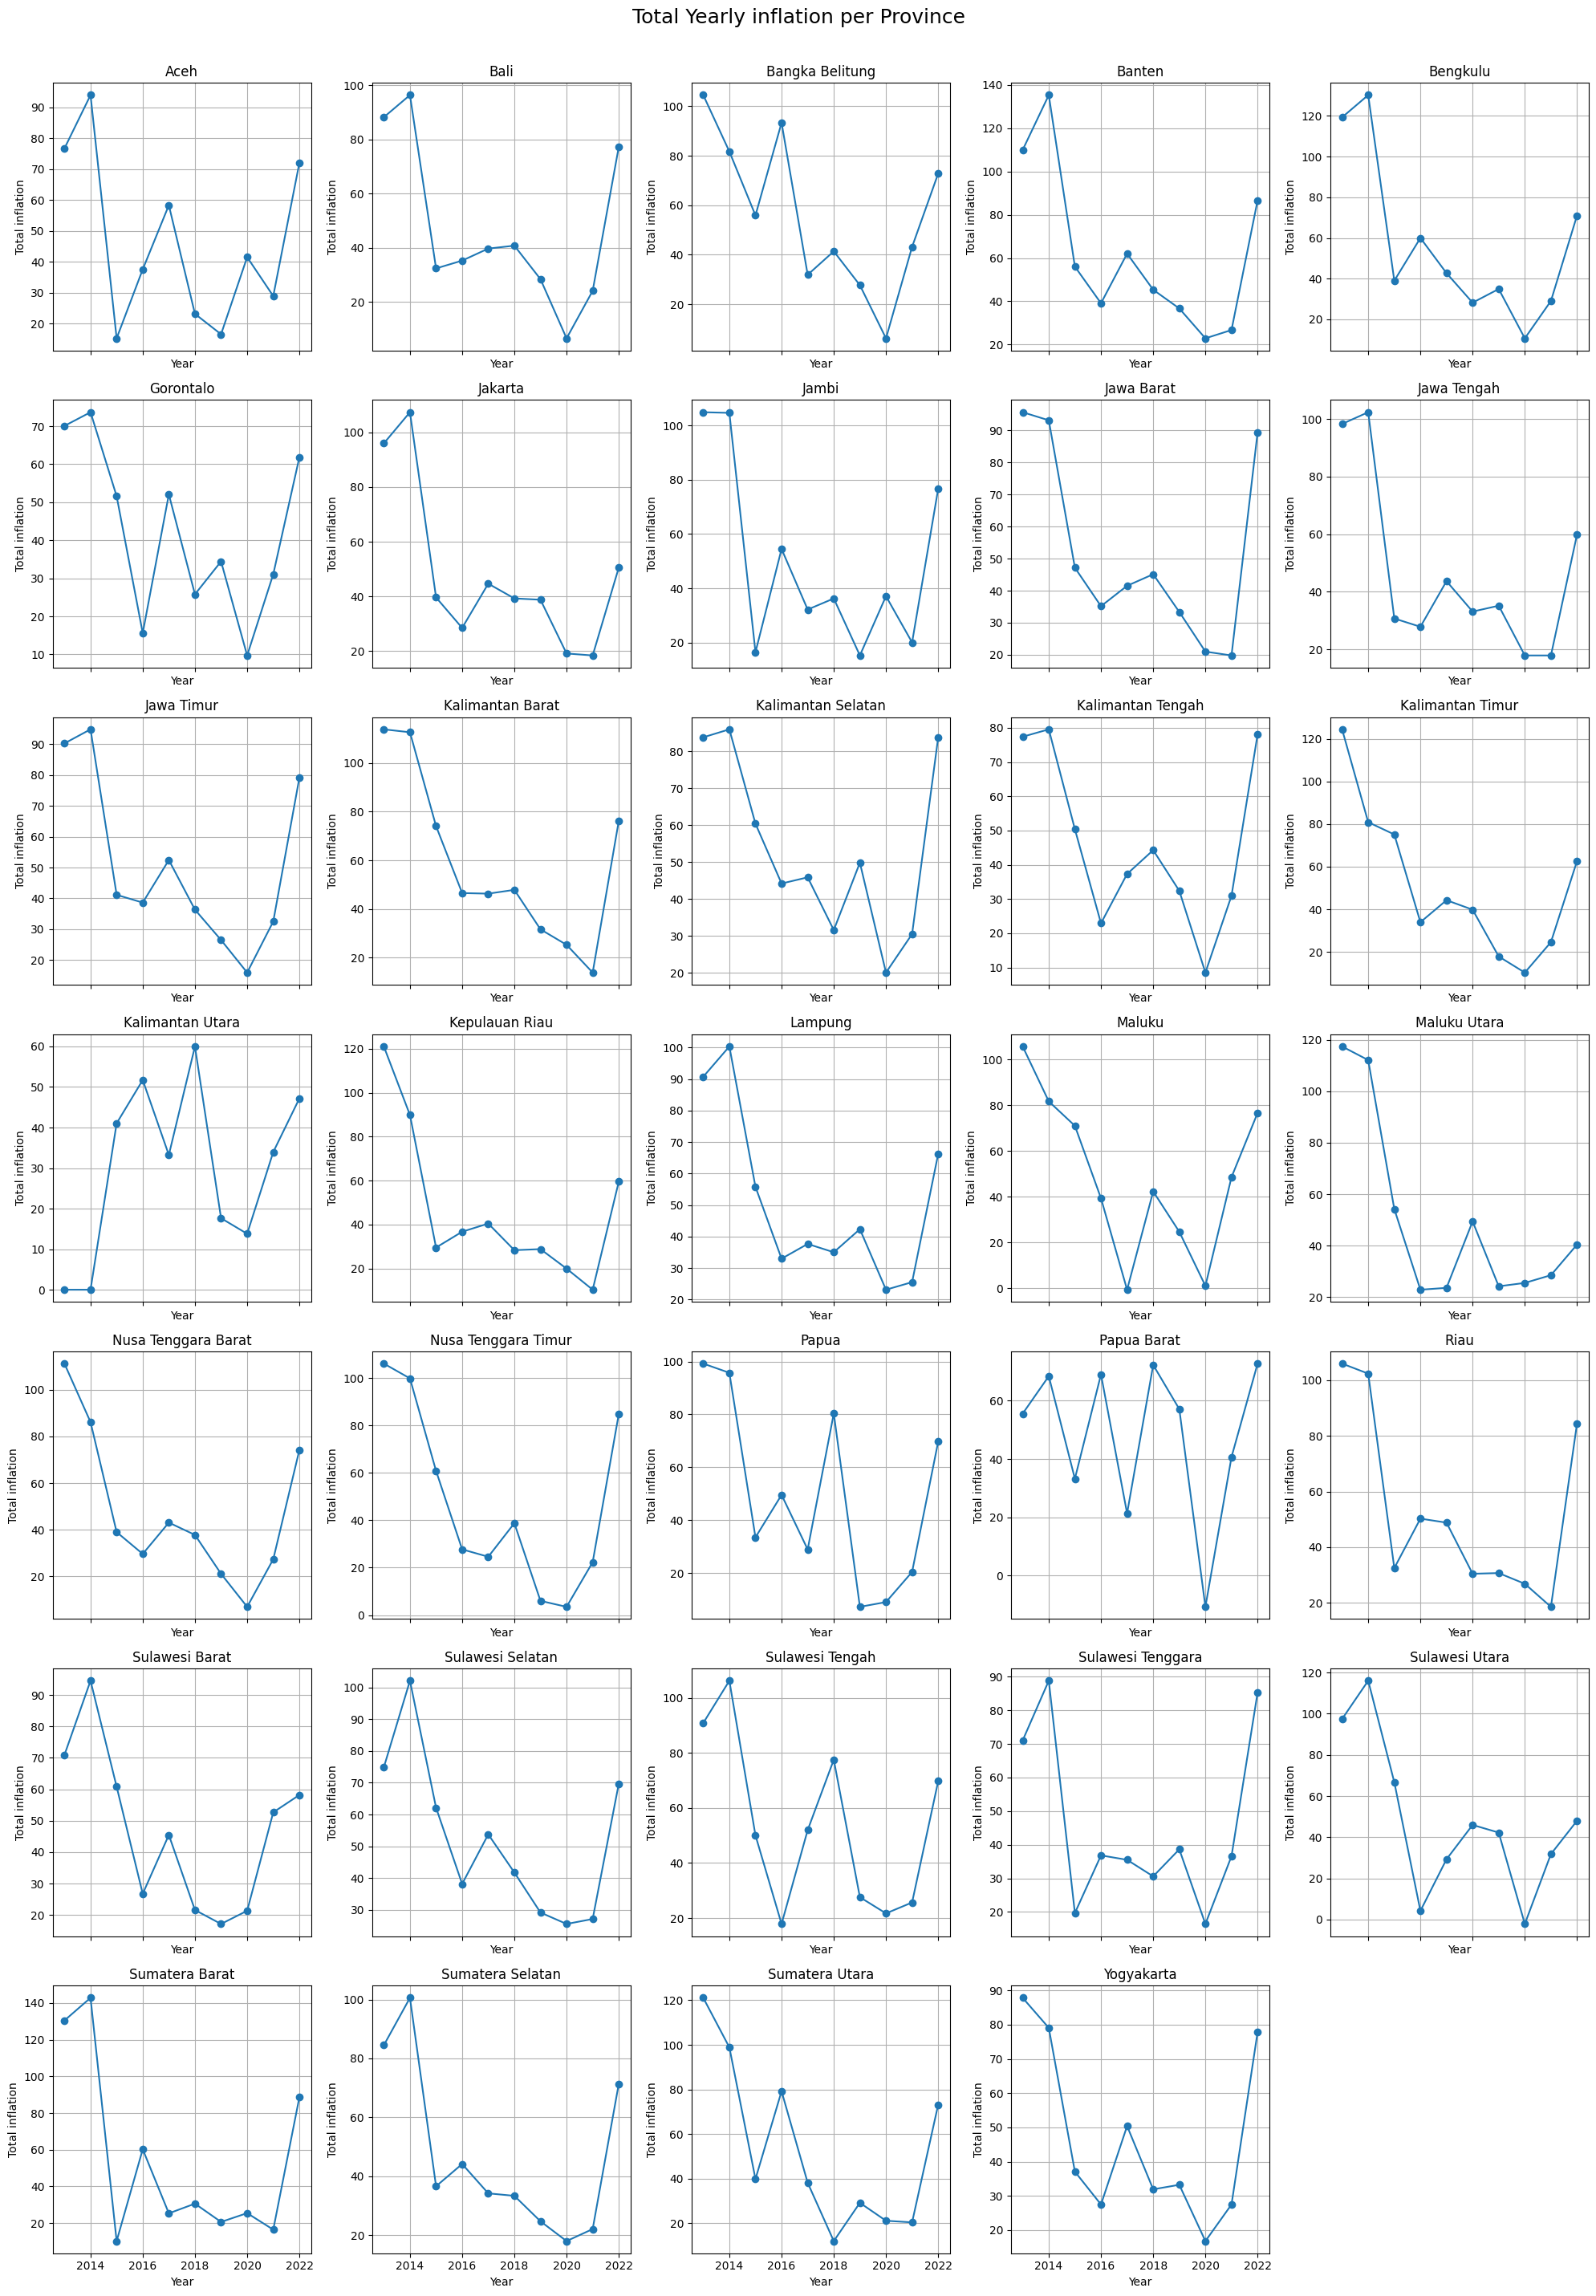

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import math


# Hitung total supply per Province per Year
yearly_inflation = data.groupby(['Province', 'Year'])['Inflation'].sum().reset_index()

# Dapatkan daftar provinsi unik
provinces = yearly_inflation['Province'].unique()
n_provinces = len(provinces)

# Tentukan layout subplot: misalnya 5 kolom
n_cols = 5
n_rows = math.ceil(n_provinces / n_cols)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), sharex=True)
axes = axes.flatten()  # Agar bisa diakses seperti array 1D

# Buat subplot untuk setiap provinsi
for i, province in enumerate(provinces):
    ax = axes[i]
    prov_data = yearly_inflation[yearly_inflation['Province'] == province]
    ax.plot(prov_data['Year'], prov_data['Inflation'], marker='o')
    ax.set_title(province)
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total inflation')

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Total Yearly inflation per Province', fontsize=18, y=1.02)
plt.show()


# ====

## 6) IMPUTE NILAI NAN DENGAN KNNimputer - TIAP PROVINSI

## 6.1) NOTE : ADA POPULATION 0 - DIISI DULU DENGAN DATA VALID

In [28]:
# Ganti nilai Population yang 0 dan provinsinya Kalimantan Utara di variabel data
data.loc[(data['Population'] == 0) & (data['Province'] == 'Kalimantan Utara'), 'Population'] = 701814

# Tampilkan data Kalimantan Utara setelah perubahan
print(data[data['Province'] == 'Kalimantan Utara'])


              Province  Year  Month  Production  Importation  Demand  Supply  \
2760  Kalimantan Utara  2013      1         0.0          0.0     0.0     0.0   
2761  Kalimantan Utara  2013      2         0.0          0.0     0.0     0.0   
2762  Kalimantan Utara  2013      3         0.0          0.0     0.0     0.0   
2763  Kalimantan Utara  2013      4         0.0          0.0     0.0     0.0   
2764  Kalimantan Utara  2013      5         0.0          0.0     0.0     0.0   
...                ...   ...    ...         ...          ...     ...     ...   
2875  Kalimantan Utara  2022      8         0.0          0.0   403.0     0.0   
2876  Kalimantan Utara  2022      9         0.0          0.0   564.0     0.0   
2877  Kalimantan Utara  2022     10         0.0          0.0   825.0     0.0   
2878  Kalimantan Utara  2022     11         0.0          0.0   502.0     0.0   
2879  Kalimantan Utara  2022     12         0.0          0.0   502.0     0.0   

        Price  Population  Religious Ho

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [29]:
data['Population'].unique()

array([ 4811100,  4906800,  5020000,  5096200,  5189500, 13590300,
        5066500,  6033300,  6188400,  3344400,  7941500,  1844800,
        1874900,  8117300,  1372800,  1973000,  2028200, 10277600,
       47379400, 34019100,  3720900,  3762200, 39293000, 12448200,
        4246500,  4292200,  5013700,  5371500,  5001700,  2660200,
        2714900,  4244100,  3721400,   701814,   742200,   701800,
        2621900,  2985700,  9073500,  2624900,  2659200,  1181000,
        1436800,  1862600,  1881700,  1319300,  1183300,  4418600])

In [30]:
data.isna().sum()

Province                 0
Year                     0
Month                    0
Production               1
Importation              0
Demand                   1
Supply                   1
Price                    1
Population               0
Religious Holiday        0
Economy Growth (%)    1224
Inflation                0
dtype: int64

In [31]:
# from sklearn.impute import KNNImputer

# df = data.copy()
# # Buat salinan dataframe
# df_imputed = pd.DataFrame()

# # Fitur yang ingin diimputasi
# features = ['Production', 'Demand', 'Supply', 'Price', 'Economy Growth (%)']

# for province, group in df.groupby('Province'):
#     group_sorted = group.sort_values(['Year', 'Month'])
    
#     imputer = KNNImputer(n_neighbors=5)  # Bisa disesuaikan
#     group_numeric = group_sorted[features]
#     group_imputed = imputer.fit_transform(group_numeric)
    
#     group_sorted[features] = group_imputed
#     df_imputed = pd.concat([df_imputed, group_sorted], axis=0)


In [32]:
df = data.copy()
df_imputed = pd.DataFrame()

features = ['Production', 'Demand', 'Supply', 'Price', 'Economy Growth (%)']

for province, group in df.groupby('Province'):
    group_sorted = group.sort_values(['Year', 'Month'])
    
    # Backward fill hanya di fitur yang dipilih
    group_sorted[features] = group_sorted[features].bfill()
    
    # Kalau mau, bisa lanjut dengan forward fill juga untuk isi yang masih kosong setelah bfill
    group_sorted[features] = group_sorted[features].ffill()
    
    df_imputed = pd.concat([df_imputed, group_sorted], axis=0)

df_imputed = df_imputed.sort_values(['Province', 'Year', 'Month']).reset_index(drop=True)
df_imputed

Province  Year  Month  Production  Importation  Demand  Supply  \
0           Aceh  2013      1         0.0          0.0  3262.0     0.0   
1           Aceh  2013      2         0.0          0.0  3127.0     0.0   
2           Aceh  2013      3         0.0          0.0  3223.0     0.0   
3           Aceh  2013      4         0.0          0.0  4188.0     0.0   
4           Aceh  2013      5         0.0          0.0  5076.0     0.0   
...          ...   ...    ...         ...          ...     ...     ...   
4075  Yogyakarta  2022      8      1275.0          0.0  4431.0  1275.0   
4076  Yogyakarta  2022      9      1405.0          0.0  4677.0  1405.0   
4077  Yogyakarta  2022     10         0.0          0.0  2264.0     0.0   
4078  Yogyakarta  2022     11         0.0          0.0  2663.0     0.0   
4079  Yogyakarta  2022     12         0.0          0.0  3724.0     0.0   

        Price  Population  Religious Holiday  Economy Growth (%)  Inflation  
0     12500.0     4811100                  0                3.29       6.39  
1     12500.0     4811100                  0                3.29       6.39  
2     12500.0     4811100                  0                3.29       6.39  
3     12000.0     4811100                  0                3.29       6.39  
4     12659.0     4811100                  0                3.29       6.39  
...       ...         ...                ...                 ...        ...  
4075  13855.0     3762200                  0                5.15       6.49  
4076  13152.0     3762200                  0                5.15       6.49  
4077  12830.0     3762200                  0                5.15       6.49  
4078  13239.0     3762200                  0                5.15       6.49  
4079  13386.0     3762200                  1                5.15       6.49  

[4080 rows x 12 columns]

In [33]:
df_imputed.isna().sum()

Province              0
Year                  0
Month                 0
Production            0
Importation           0
Demand                0
Supply                0
Price                 0
Population            0
Religious Holiday     0
Economy Growth (%)    0
Inflation             0
dtype: int64

## OUTLIER DETECT -- OPSIONAL

In [34]:
df_imputed

Province  Year  Month  Production  Importation  Demand  Supply  \
0           Aceh  2013      1         0.0          0.0  3262.0     0.0   
1           Aceh  2013      2         0.0          0.0  3127.0     0.0   
2           Aceh  2013      3         0.0          0.0  3223.0     0.0   
3           Aceh  2013      4         0.0          0.0  4188.0     0.0   
4           Aceh  2013      5         0.0          0.0  5076.0     0.0   
...          ...   ...    ...         ...          ...     ...     ...   
4075  Yogyakarta  2022      8      1275.0          0.0  4431.0  1275.0   
4076  Yogyakarta  2022      9      1405.0          0.0  4677.0  1405.0   
4077  Yogyakarta  2022     10         0.0          0.0  2264.0     0.0   
4078  Yogyakarta  2022     11         0.0          0.0  2663.0     0.0   
4079  Yogyakarta  2022     12         0.0          0.0  3724.0     0.0   

        Price  Population  Religious Holiday  Economy Growth (%)  Inflation  
0     12500.0     4811100                  0                3.29       6.39  
1     12500.0     4811100                  0                3.29       6.39  
2     12500.0     4811100                  0                3.29       6.39  
3     12000.0     4811100                  0                3.29       6.39  
4     12659.0     4811100                  0                3.29       6.39  
...       ...         ...                ...                 ...        ...  
4075  13855.0     3762200                  0                5.15       6.49  
4076  13152.0     3762200                  0                5.15       6.49  
4077  12830.0     3762200                  0                5.15       6.49  
4078  13239.0     3762200                  0                5.15       6.49  
4079  13386.0     3762200                  1                5.15       6.49  

[4080 rows x 12 columns]

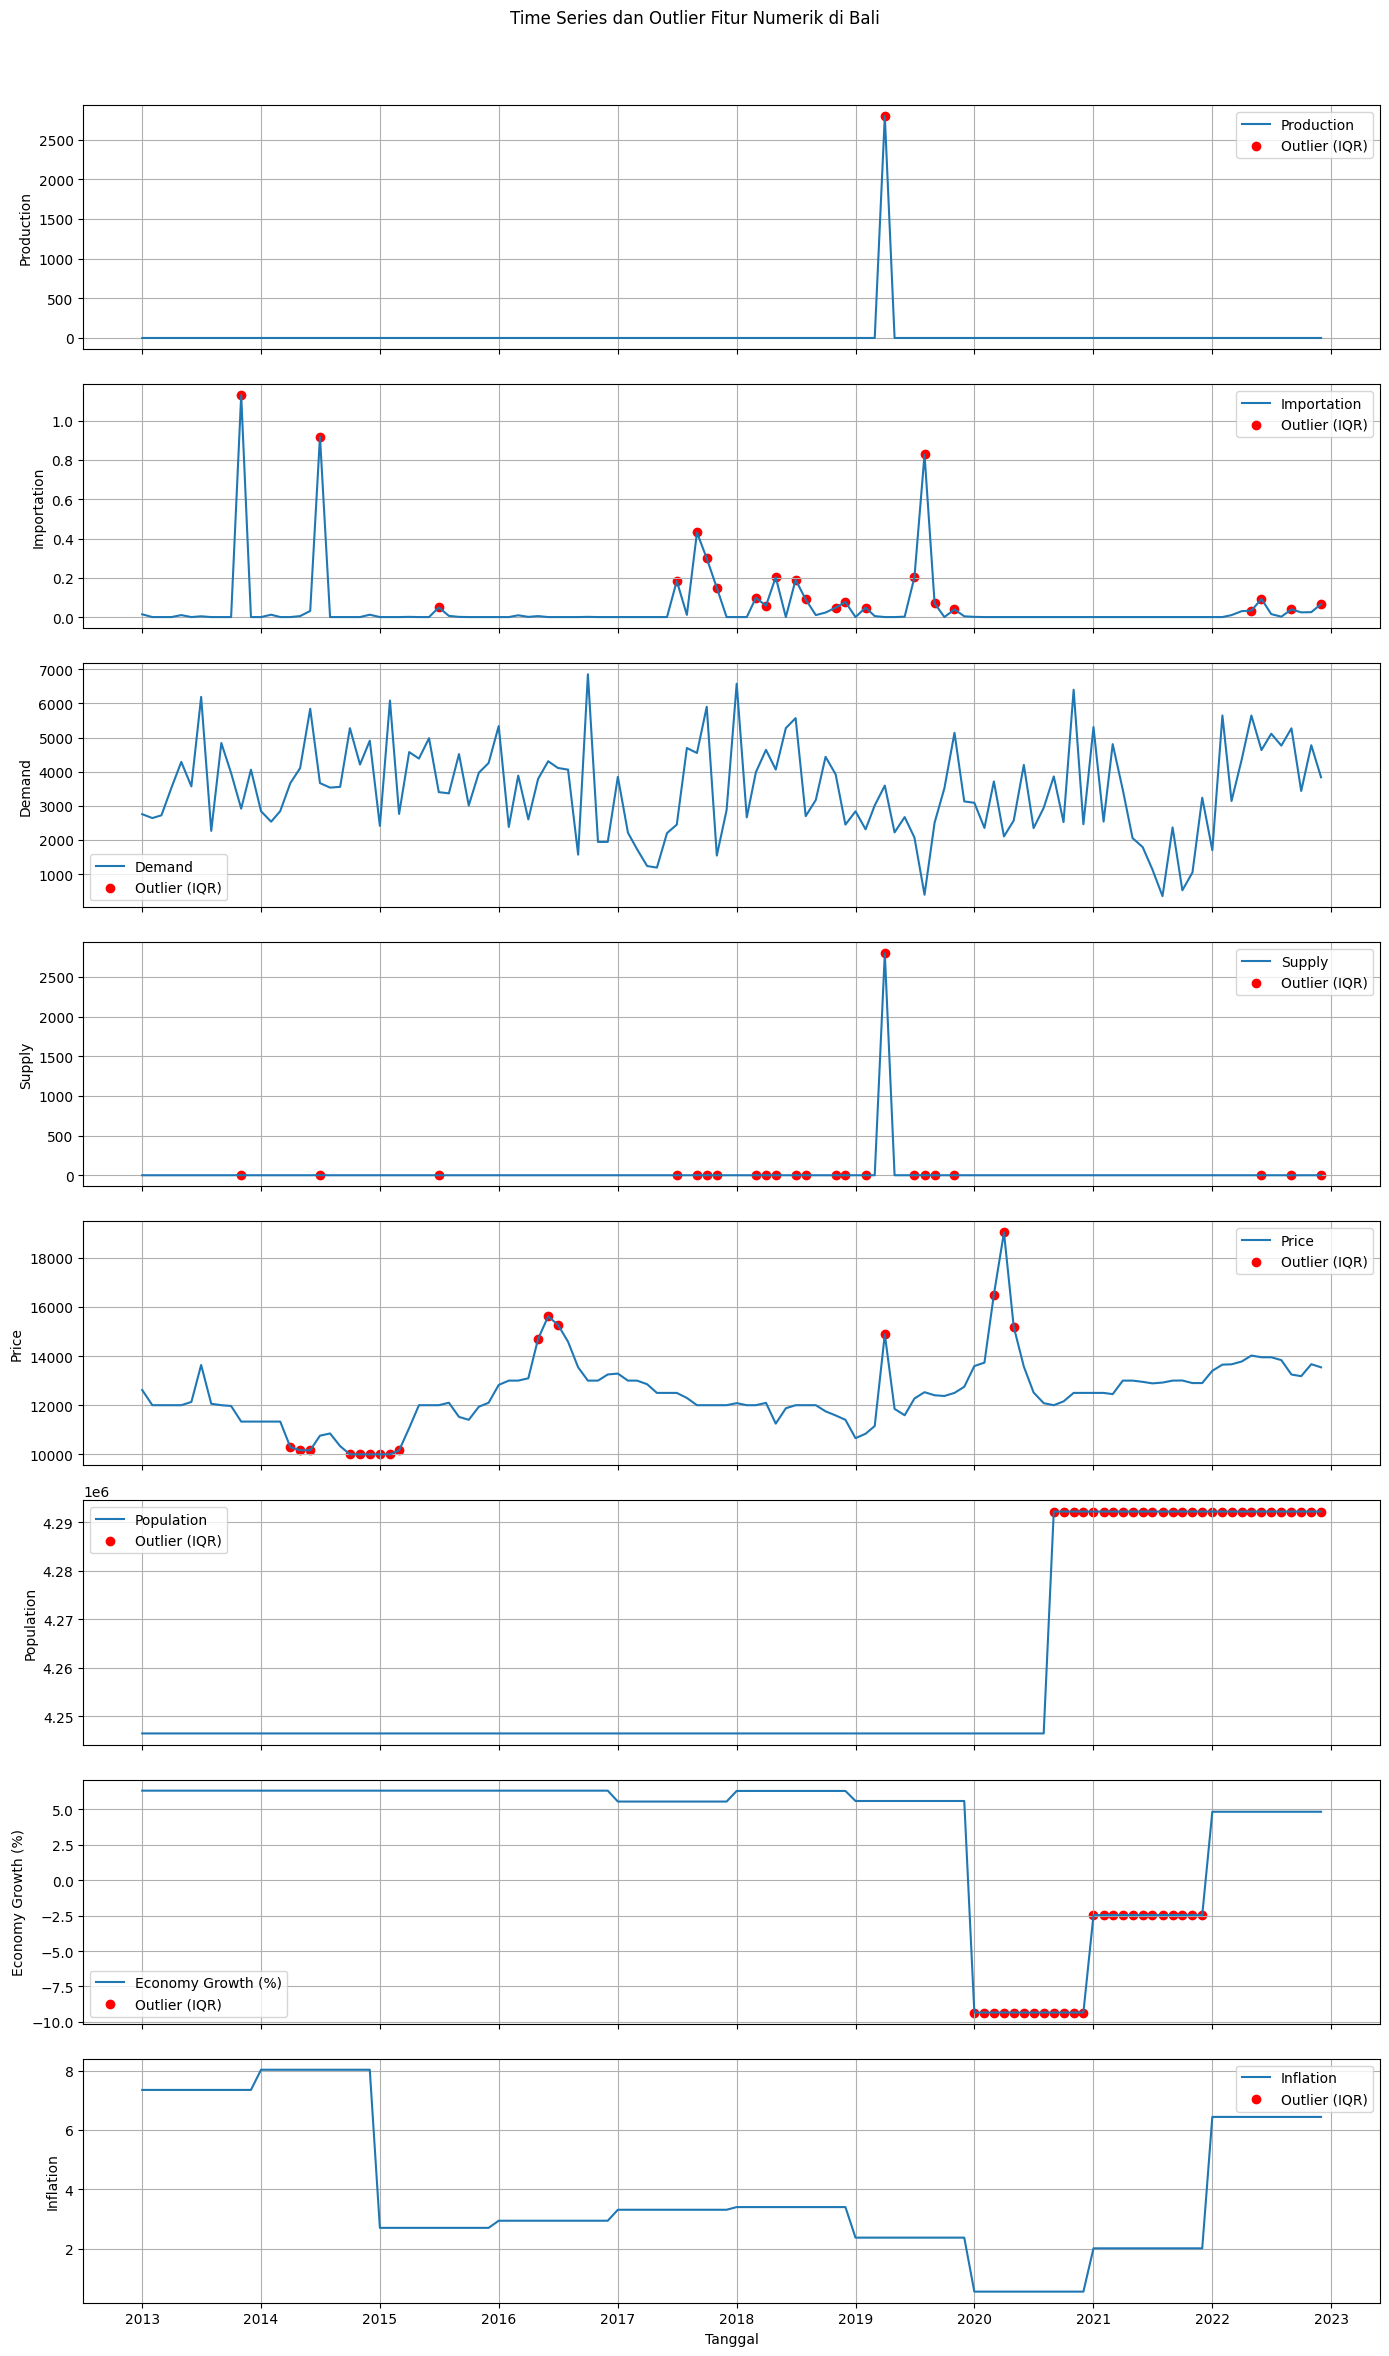

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsi df_imputed adalah dataframe yang sudah ada dan sudah diimputasi
# Pilih provinsi Aceh
provinsi_cek = 'Bali'
df_aceh = df_imputed[df_imputed['Province'] == provinsi_cek].sort_values(['Year', 'Month'])

# Fitur numerik yang akan dicek outlier
num_cols = ['Production', 'Importation', 'Demand', 'Supply', 'Price', 'Population', 'Economy Growth (%)', 'Inflation']

# Detect outlier per fitur dengan metode IQR dan buat kolom boolean outlier
for col in num_cols:
    Q1 = df_aceh[col].quantile(0.25)
    Q3 = df_aceh[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_aceh[f'{col}_iqr_outlier'] = ~df_aceh[col].between(lower, upper)

# Buat datetime index dari Year dan Month
time_index = pd.to_datetime(df_aceh[['Year', 'Month']].assign(DAY=1))

# Plotting subplot untuk tiap fitur
fig, axes = plt.subplots(len(num_cols), 1, figsize=(14, 3*len(num_cols)), sharex=True)
for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.plot(time_index, df_aceh[col], label=f'{col}')
    outliers = df_aceh[f'{col}_iqr_outlier']
    ax.scatter(time_index[outliers], df_aceh.loc[outliers, col], color='red', label='Outlier (IQR)')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)

plt.xlabel('Tanggal')
plt.suptitle(f'Time Series dan Outlier Fitur Numerik di {provinsi_cek}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 7) LIHAT MULTIKOLINEARITAS ANTAR FITUR DAN FITUR-TARGET

## 7.1 KOLINEARITAS GLOBAL

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


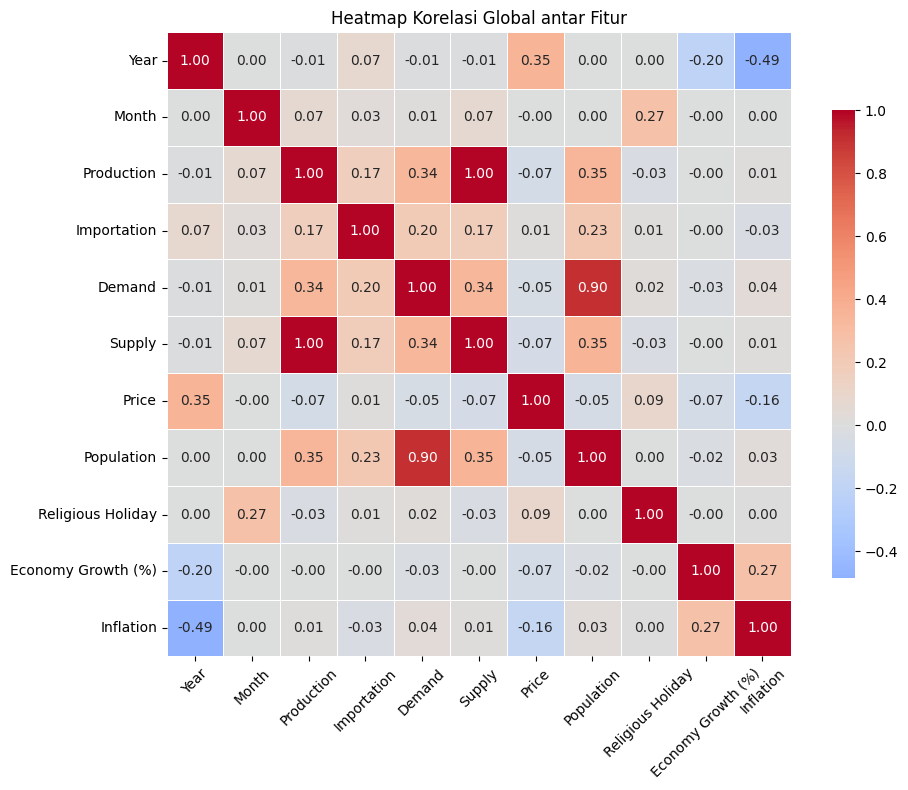

In [36]:
import seaborn as sns
df_numeric = df_imputed.select_dtypes(include=['float64', 'int64'])
# 4. Hitung korelasi global (default Pearson)
corr_global = df_numeric.corr()
plt.figure(figsize=(10, 8))  # Sesuaikan ukuran jika banyak fitur
sns.heatmap(corr_global, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Heatmap Korelasi Global antar Fitur")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 7.2) KOLINEARITAS PER PROVINSI

In [37]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# df_numeric = df_imputed.select_dtypes(include=['float64', 'int64'])

# # Gabungkan kembali dengan kolom Province untuk groupby
# df_numeric['Province'] = df_imputed['Province']

# # Loop setiap provinsi
# for province_name, group in df_numeric.groupby('Province'):
#     # Drop kolom Province agar tidak dihitung dalam korelasi
#     group_numeric = group.drop(columns='Province')
    
#     # Hitung korelasi
#     corr = group_numeric.corr()
  
#     # Plot heatmap
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True,
#                 linewidths=0.5, cbar_kws={"shrink": .75})
#     plt.title(f"Heatmap Korelasi antar Fitur - {province_name}")
#     plt.xticks(rotation=45)
#     plt.yticks(rotation=0)
#     plt.tight_layout()
#     plt.show()


# FEATURE ENGINEERING

In [38]:
df_imputed

Province  Year  Month  Production  Importation  Demand  Supply  \
0           Aceh  2013      1         0.0          0.0  3262.0     0.0   
1           Aceh  2013      2         0.0          0.0  3127.0     0.0   
2           Aceh  2013      3         0.0          0.0  3223.0     0.0   
3           Aceh  2013      4         0.0          0.0  4188.0     0.0   
4           Aceh  2013      5         0.0          0.0  5076.0     0.0   
...          ...   ...    ...         ...          ...     ...     ...   
4075  Yogyakarta  2022      8      1275.0          0.0  4431.0  1275.0   
4076  Yogyakarta  2022      9      1405.0          0.0  4677.0  1405.0   
4077  Yogyakarta  2022     10         0.0          0.0  2264.0     0.0   
4078  Yogyakarta  2022     11         0.0          0.0  2663.0     0.0   
4079  Yogyakarta  2022     12         0.0          0.0  3724.0     0.0   

        Price  Population  Religious Holiday  Economy Growth (%)  Inflation  
0     12500.0     4811100                  0                3.29       6.39  
1     12500.0     4811100                  0                3.29       6.39  
2     12500.0     4811100                  0                3.29       6.39  
3     12000.0     4811100                  0                3.29       6.39  
4     12659.0     4811100                  0                3.29       6.39  
...       ...         ...                ...                 ...        ...  
4075  13855.0     3762200                  0                5.15       6.49  
4076  13152.0     3762200                  0                5.15       6.49  
4077  12830.0     3762200                  0                5.15       6.49  
4078  13239.0     3762200                  0                5.15       6.49  
4079  13386.0     3762200                  1                5.15       6.49  

[4080 rows x 12 columns]

## 1) KOMBINASI FITUR FITUR PENDUKUNG TARGET

In [39]:
# FEATURE ENGINEERING PRODUCTION X APA GTU ? TAMBAHKAN DI CELL BAWAH (CELL PERKALIAN)


In [40]:
# Salin dataframe agar tidak overwrite data asli
df_feat = df_imputed.copy()

# # Kombinasi fitur
df_feat['Demand_Inflation'] = df_feat['Demand'] * df_feat['Inflation']
df_feat['Demand_EconGrowth'] = df_feat['Demand'] * df_feat['Economy Growth (%)']
df_feat['Pop_Demand'] = df_feat['Population'] * df_feat['Demand']
df_feat['Holiday_Demand'] = df_feat['Religious Holiday'] * df_feat['Demand']
df_feat['Demand_per_Capita'] = df_feat['Demand'] / (df_feat['Population'] + 1e-5)  # hindari div/0

# === Revisi tambahan: Kombinasi Production dengan fitur lain ===
df_feat['Production_Inflation'] = df_feat['Production'] * df_feat['Inflation']
df_feat['Production_EconGrowth'] = df_feat['Production'] * df_feat['Economy Growth (%)']
df_feat['Production_Population'] = df_feat['Production'] * df_feat['Population']
df_feat['Production_Holiday'] = df_feat['Production'] * df_feat['Religious Holiday']
df_feat['Production_Demand'] = df_feat['Production'] * df_feat['Demand']
df_feat['Production_per_Capita'] = df_feat['Production'] / (df_feat['Population'] + 1e-5)  # hindari div/0

# (Opsional) Interaksi dengan harga
df_feat['Production_Price'] = df_feat['Production'] * df_feat['Price']

# Tampilkan dataframe hasil feature engineering
df_feat


Province  Year  Month  Production  Importation  Demand  Supply  \
0           Aceh  2013      1         0.0          0.0  3262.0     0.0   
1           Aceh  2013      2         0.0          0.0  3127.0     0.0   
2           Aceh  2013      3         0.0          0.0  3223.0     0.0   
3           Aceh  2013      4         0.0          0.0  4188.0     0.0   
4           Aceh  2013      5         0.0          0.0  5076.0     0.0   
...          ...   ...    ...         ...          ...     ...     ...   
4075  Yogyakarta  2022      8      1275.0          0.0  4431.0  1275.0   
4076  Yogyakarta  2022      9      1405.0          0.0  4677.0  1405.0   
4077  Yogyakarta  2022     10         0.0          0.0  2264.0     0.0   
4078  Yogyakarta  2022     11         0.0          0.0  2663.0     0.0   
4079  Yogyakarta  2022     12         0.0          0.0  3724.0     0.0   

        Price  Population  Religious Holiday  ...    Pop_Demand  \
0     12500.0     4811100                  0  ...  1.569381e+10   
1     12500.0     4811100                  0  ...  1.504431e+10   
2     12500.0     4811100                  0  ...  1.550618e+10   
3     12000.0     4811100                  0  ...  2.014889e+10   
4     12659.0     4811100                  0  ...  2.442114e+10   
...       ...         ...                ...  ...           ...   
4075  13855.0     3762200                  0  ...  1.667031e+10   
4076  13152.0     3762200                  0  ...  1.759581e+10   
4077  12830.0     3762200                  0  ...  8.517621e+09   
4078  13239.0     3762200                  0  ...  1.001874e+10   
4079  13386.0     3762200                  1  ...  1.401043e+10   

      Holiday_Demand  Demand_per_Capita  Production_Inflation  \
0                0.0           0.000678                  0.00   
1                0.0           0.000650                  0.00   
2                0.0           0.000670                  0.00   
3                0.0           0.000870                  0.00   
4                0.0           0.001055                  0.00   
...              ...                ...                   ...   
4075             0.0           0.001178               8274.75   
4076             0.0           0.001243               9118.45   
4077             0.0           0.000602                  0.00   
4078             0.0           0.000708                  0.00   
4079          3724.0           0.000990                  0.00   

      Production_EconGrowth  Production_Population  Production_Holiday  \
0                      0.00           0.000000e+00                 0.0   
1                      0.00           0.000000e+00                 0.0   
2                      0.00           0.000000e+00                 0.0   
3                      0.00           0.000000e+00                 0.0   
4                      0.00           0.000000e+00                 0.0   
...                     ...                    ...                 ...   
4075                6566.25           4.796805e+09                 0.0   
4076                7235.75           5.285891e+09                 0.0   
4077                   0.00           0.000000e+00                 0.0   
4078                   0.00           0.000000e+00                 0.0   
4079                   0.00           0.000000e+00                 0.0   

      Production_Demand  Production_per_Capita  Production_Price  
0                   0.0               0.000000               0.0  
1                   0.0               0.000000               0.0  
2                   0.0               0.000000               0.0  
3                   0.0               0.000000               0.0  
4                   0.0               0.000000               0.0  
...                 ...                    ...               ...  
4075          5649525.0               0.000339        17665125.0  
4076          6571185.0               0.000373        18478560.0  
4077                0.0               0.0

In [41]:
# Menampilkan nilai minimum dan maksimum dari setiap kolom
min_values = df_feat.min(numeric_only=True)
max_values = df_feat.max(numeric_only=True)

summary_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values
})

print(summary_df)


                             Min           Max
Year                     2013.00  2.022000e+03
Month                       1.00  1.200000e+01
Production                  0.00  3.982400e+05
Importation                 0.00  3.736618e+03
Demand                      0.00  7.748800e+04
Supply                      0.00  3.990763e+05
Price                       0.00  2.200000e+04
Population             701800.00  4.737940e+07
Religious Holiday           0.00  1.000000e+00
Economy Growth (%)        -15.74  2.294000e+01
Inflation                  -0.89  1.190000e+01
Demand_Inflation        -1023.50  5.518109e+05
Demand_EconGrowth     -158956.56  4.385821e+05
Pop_Demand                  0.00  3.671335e+12
Holiday_Demand              0.00  6.923600e+04
Demand_per_Capita           0.00  1.716437e-03
Production_Inflation        0.00  2.075614e+06
Production_EconGrowth -625511.80  2.218197e+06
Production_Population       0.00  1.564804e+13
Production_Holiday          0.00  2.544470e+05
Production_De

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


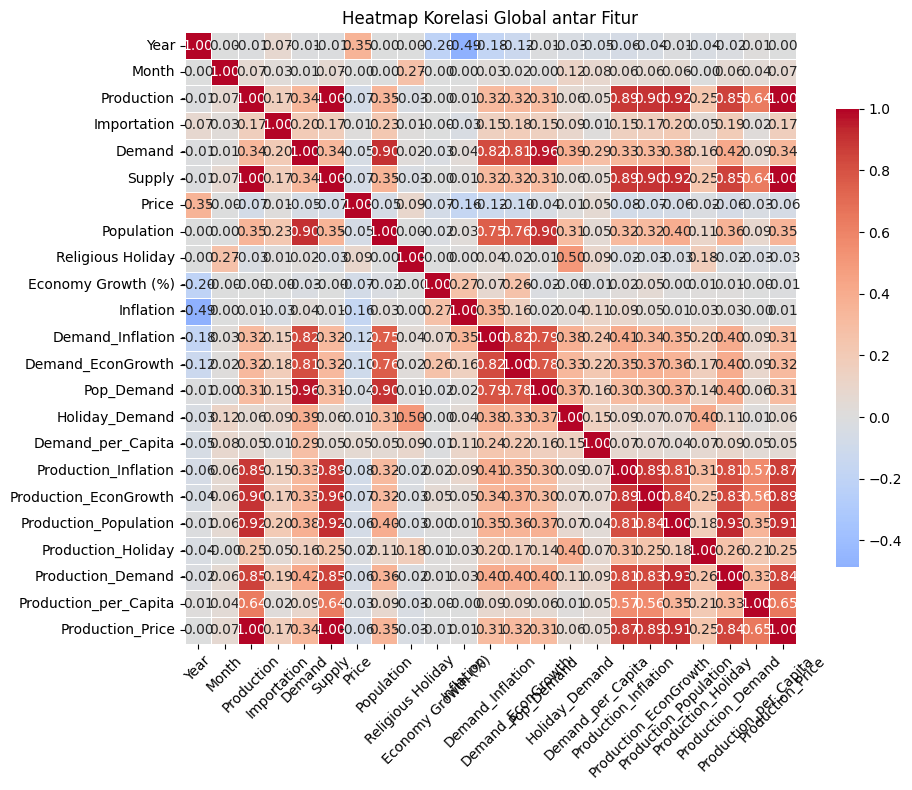

In [42]:
import seaborn as sns
df_numeric = df_feat.select_dtypes(include=['float64', 'int64'])
# 4. Hitung korelasi global (default Pearson)
corr_global = df_numeric.corr()
plt.figure(figsize=(10, 8))  # Sesuaikan ukuran jika banyak fitur
sns.heatmap(corr_global, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Heatmap Korelasi Global antar Fitur")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# PREPROCESSING

## 1) BUAT DATA PANEL : INDEXING BY PROVINCE YEAR MONTH

In [43]:
df = df_feat.copy()

df = df.set_index(['Province','Year','Month'])
df

Production  Importation  Demand  Supply    Price  \
Province   Year Month                                                     
Aceh       2013 1             0.0          0.0  3262.0     0.0  12500.0   
                2             0.0          0.0  3127.0     0.0  12500.0   
                3             0.0          0.0  3223.0     0.0  12500.0   
                4             0.0          0.0  4188.0     0.0  12000.0   
                5             0.0          0.0  5076.0     0.0  12659.0   
...                           ...          ...     ...     ...      ...   
Yogyakarta 2022 8          1275.0          0.0  4431.0  1275.0  13855.0   
                9          1405.0          0.0  4677.0  1405.0  13152.0   
                10            0.0          0.0  2264.0     0.0  12830.0   
                11            0.0          0.0  2663.0     0.0  13239.0   
                12            0.0          0.0  3724.0     0.0  13386.0   

                       Population  Religious Holiday  Economy Growth (%)  \
Province   Year Month                                                      
Aceh       2013 1         4811100                  0                3.29   
                2         4811100                  0                3.29   
                3         4811100                  0                3.29   
                4         4811100                  0                3.29   
                5         4811100                  0                3.29   
...                           ...                ...                 ...   
Yogyakarta 2022 8         3762200                  0                5.15   
                9         3762200                  0                5.15   
                10        3762200                  0                5.15   
                11        3762200                  0                5.15   
                12        3762200                  1                5.15   

                       Inflation  Demand_Inflation  ...    Pop_Demand  \
Province   Year Month                               ...                 
Aceh       2013 1           6.39          20844.18  ...  1.569381e+10   
                2           6.39          19981.53  ...  1.504431e+10   
                3           6.39          20594.97  ...  1.550618e+10   
                4           6.39          26761.32  ...  2.014889e+10   
                5           6.39          32435.64  ...  2.442114e+10   
...                          ...               ...  ...           ...   
Yogyakarta 2022 8           6.49          28757.19  ...  1.667031e+10   
                9           6.49          30353.73  ...  1.759581e+10   
                10          6.49          14693.36  ...  8.517621e+09   
                11          6.49          17282.87  ...  1.001874e+10   
                12          6.49          24168.76  ...  1.401043e+10   

                       Holiday_Demand  Demand_per_Capita  \
Province   Year Month                                      
Aceh       2013 1                 0.0           0.000678   
                2                 0.0           0.000650   
                3                 0.0           0.000670   
                4                 0.0           0.000870   
                5                 0.0           0.001055   
...                               ...                ...   
Yogyakarta 2022 8                 0.0           0.001178   
                9                 0.0           0.001243   
                10                0.0           0.000602   
                11                0.0           0.000708   
                12             3724.0           0.000990   

                       Production_Inflation  Production_EconGrowth  \
Province   Year Month                                                
Aceh       2013 1                      0.00                   0.00   
                2                      0.00                   0.00   
                3                      0.00    

In [44]:
# # kolom_fitur = ['Production','Importation','Demand','Price','Population','Religious Holiday','Economy Growth (%)', 'Inflation']
# kolom_fitur = ['Demand','Price','Religious Holiday','Economy Growth (%)', 'Inflation']
# kolom_target = 'Supply'

# X = df.groupby('Province')[kolom_fitur].shift(1) 
# y = df.groupby('Province')[kolom_target].shift(-1)

# df_processed = pd.concat([X, y], axis=1)
# df_processed.dropna(inplace=True)
# df_processed

In [45]:
df.columns

Index(['Production', 'Importation', 'Demand', 'Supply', 'Price', 'Population',
       'Religious Holiday', 'Economy Growth (%)', 'Inflation',
       'Demand_Inflation', 'Demand_EconGrowth', 'Pop_Demand', 'Holiday_Demand',
       'Demand_per_Capita', 'Production_Inflation', 'Production_EconGrowth',
       'Production_Population', 'Production_Holiday', 'Production_Demand',
       'Production_per_Capita', 'Production_Price'],
      dtype='object')

In [46]:
lookback = 12
horizon = 3  # ganti sesuai kebutuhan

# kolom_fitur = ['Demand', 'Supply', 'Price', 'Population',
#        'Religious Holiday', 'Economy Growth (%)', 'Inflation',
#        'Demand_Inflation', 'Demand_EconGrowth', 'Pop_Demand', 'Holiday_Demand',
#        'Demand_per_Capita']

# kolom_fitur = df.columns

kolom_fitur = ['Importation', 'Demand', 'Price', 'Population',
       'Religious Holiday', 'Economy Growth (%)', 'Inflation',
       'Demand_Inflation', 'Demand_EconGrowth', 'Pop_Demand', 'Holiday_Demand',
       'Demand_per_Capita', 'Production_Inflation', 'Production_EconGrowth',
       'Production_Population', 'Production_Holiday', 'Production_Demand',
       'Production_per_Capita', 'Production_Price']

kolom_target = 'Supply'

# Buat input X
X_lookback = []
for i in range(lookback, 0, -1):  # dari t-11 sampai t-1
    shifted = df.groupby('Province')[kolom_fitur].shift(i)
    shifted.columns = [f"{col}_t-{i}" for col in kolom_fitur]
    X_lookback.append(shifted)

X = pd.concat(X_lookback, axis=1)

# Buat target y dalam bentuk multi-horizon
y_horizon = []
for h in range(1, horizon + 1):
    shifted = df.groupby('Province')[kolom_target].shift(-h)
    shifted.name = f"{kolom_target}_t+{h}"
    y_horizon.append(shifted)

y = pd.concat(y_horizon, axis=1)

# Gabungkan input dan target
df_processed = pd.concat([X, y], axis=1)
df_processed.dropna(inplace=True)

In [47]:
df_processed

Importation_t-12  Demand_t-12  Price_t-12  \
Province   Year Month                                              
Aceh       2014 1                   0.0       3262.0     12500.0   
                2                   0.0       3127.0     12500.0   
                3                   0.0       3223.0     12500.0   
                4                   0.0       4188.0     12000.0   
                5                   0.0       5076.0     12659.0   
...                                 ...          ...         ...   
Yogyakarta 2022 5                   0.0       4050.0     12750.0   
                6                   0.0       4481.0     12725.0   
                7                   0.0       2920.0     12650.0   
                8                   0.0       4060.0     12530.0   
                9                   0.0       3262.0     12500.0   

                       Population_t-12  Religious Holiday_t-12  \
Province   Year Month                                            
Aceh       2014 1            4811100.0                     0.0   
                2            4811100.0                     0.0   
                3            4811100.0                     0.0   
                4            4811100.0                     0.0   
                5            4811100.0                     0.0   
...                                ...                     ...   
Yogyakarta 2022 5            3762200.0                     0.0   
                6            3762200.0                     0.0   
                7            3762200.0                     0.0   
                8            3762200.0                     0.0   
                9            3762200.0                     0.0   

                       Economy Growth (%)_t-12  Inflation_t-12  \
Province   Year Month                                            
Aceh       2014 1                         3.29            6.39   
                2                         3.29            6.39   
                3                         3.29            6.39   
                4                         3.29            6.39   
                5                         3.29            6.39   
...                                        ...             ...   
Yogyakarta 2022 5                         5.58            2.29   
                6                         5.58            2.29   
                7                         5.58            2.29   
                8                         5.58            2.29   
                9                         5.58            2.29   

                       Demand_Inflation_t-12  Demand_EconGrowth_t-12  \
Province   Year Month                                                  
Aceh       2014 1                   20844.18                10731.98   
                2                   19981.53                10287.83   
                3                   20594.97                10603.67   
                4                   26761.32                13778.52   
                5                   32435.64                16700.04   
...                                      ...                     ...   
Yogyakarta 2022 5                    9274.50                22599.00   
                6                   10261.49                25003.98   
                7                    6686.80                16293.60   
                8                    9297.40                22654.80   
                9                    7469.98                18201.96   

                       Pop_Demand_t-12  ...  Production_Inflation_t-1  \
Province   Year Month                   ...                             
Aceh       2014 1         1.569381e+10  ...                      0.00   
                2         1.504431e+10  ...                      0.00   
                3         1.550618e+10  ...                      0.00   
                4         2.014889e+10  ...                      0.00   
                5         2.442114e+10  ...  

In [48]:
for col in df_processed.columns:
    print(col)


Importation_t-12
Demand_t-12
Price_t-12
Population_t-12
Religious Holiday_t-12
Economy Growth (%)_t-12
Inflation_t-12
Demand_Inflation_t-12
Demand_EconGrowth_t-12
Pop_Demand_t-12
Holiday_Demand_t-12
Demand_per_Capita_t-12
Production_Inflation_t-12
Production_EconGrowth_t-12
Production_Population_t-12
Production_Holiday_t-12
Production_Demand_t-12
Production_per_Capita_t-12
Production_Price_t-12
Importation_t-11
Demand_t-11
Price_t-11
Population_t-11
Religious Holiday_t-11
Economy Growth (%)_t-11
Inflation_t-11
Demand_Inflation_t-11
Demand_EconGrowth_t-11
Pop_Demand_t-11
Holiday_Demand_t-11
Demand_per_Capita_t-11
Production_Inflation_t-11
Production_EconGrowth_t-11
Production_Population_t-11
Production_Holiday_t-11
Production_Demand_t-11
Production_per_Capita_t-11
Production_Price_t-11
Importation_t-10
Demand_t-10
Price_t-10
Population_t-10
Religious Holiday_t-10
Economy Growth (%)_t-10
Inflation_t-10
Demand_Inflation_t-10
Demand_EconGrowth_t-10
Pop_Demand_t-10
Holiday_Demand_t-10
Deman

## 2) CEK MIN DAN MAX TIAP FITUR

In [49]:
# print('= Cek Min Max tiap fitur =')
# print('production : ' , "Min = ", df_processed["Production"].min(), "|", "Max = ", df_processed["Production"].max())
# print('Importation : ' , "Min = ", df_processed["Importation"].min(), "|", "Max = ", df_processed["Importation"].max())
# print('Demand : ' , "Min = ", df_processed["Demand"].min(), "|", "Max = ", df_processed["Demand"].max())
# print('Supply : ' , "Min = ", df_processed["Supply"].min(), "|", "Max = ", df_processed["Supply"].max())
# print('Price : ' , "Min = ", df_processed["Price"].min(), "|", "Max = ", df_processed["Price"].max())
# print('Population : ' , "Min = ", df_processed["Population"].min(), "|", "Max = ", df_processed["Population"].max())
# print('Religious Holiday : ' , "Min = ", df_processed["Religious Holiday"].min(), "|", "Max = ", df_processed["Religious Holiday"].max())
# print('Economy Growth (%) : ' , "Min = ", df_processed["Economy Growth (%)"].min(), "|", "Max = ", df_processed["Economy Growth (%)"].max())
# print('Inflation : ' , "Min = ", df_processed["Inflation"].min(), "|", "Max = ", df_processed["Inflation"].max())

## 3) SPLITTING DATA 80:10:10 + NORMALISASI (MIN-MAX)

In [50]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # Ambil nama semua fitur di df_processed, kecuali kolom target
# fitur_final = df_processed.columns.drop(kolom_target).tolist()

# # Inisialisasi list untuk semua provinsi
# X_train_list, X_val_list, X_test_list = [], [], []
# y_train_list, y_val_list, y_test_list = [], [], []

# # Iterasi per provinsi
# for provinsi, df_prov in df_processed.groupby(level=0):
#     df_prov = df_prov.sort_index()
#     total_bulan = df_prov.shape[0]
#     train_bulan = int(total_bulan * 0.8)
#     val_bulan = int(total_bulan * 0.1)
#     test_bulan = total_bulan - train_bulan - val_bulan

#     # Ambil fitur dan target sesuai kolom hasil shifting
#     X_prov = df_prov[fitur_final]
#     y_prov = df_prov[[kolom_target]]  # tetap 2D supaya cocok scaler

#     # Split train, val, test
#     X_train_raw = X_prov.iloc[:train_bulan]
#     X_val_raw = X_prov.iloc[train_bulan:train_bulan + val_bulan]
#     X_test_raw = X_prov.iloc[train_bulan + val_bulan:]

#     y_train_raw = y_prov.iloc[:train_bulan]
#     y_val_raw = y_prov.iloc[train_bulan:train_bulan + val_bulan]
#     y_test_raw = y_prov.iloc[train_bulan + val_bulan:]

#     # Scaling fitur
#     scaler_x = MinMaxScaler()
#     X_train = scaler_x.fit_transform(X_train_raw)
#     X_val = scaler_x.transform(X_val_raw)
#     X_test = scaler_x.transform(X_test_raw)

#     # Clip hasil transform jika perlu
#     if X_val.min() < 0 or X_val.max() > 1:
#         print(f"⚠️ CLIPPED: {provinsi} — X_val sebelum clip: min {X_val.min()}, max {X_val.max()}")
#         X_val = np.clip(X_val, 0, 1)

#     if X_test.min() < 0 or X_test.max() > 1:
#         print(f"⚠️ CLIPPED: {provinsi} — X_test sebelum clip: min {X_test.min()}, max {X_test.max()}")
#         X_test = np.clip(X_test, 0, 1)

#     # Scaling target
#     y_min = y_train_raw.min().values[0]
#     y_max = y_train_raw.max().values[0]

#     if y_min == y_max:
#         print(f"⚠️ Provinsi {provinsi} — target train konstan: {y_min}, val/test akan diisi nol")
#         y_train = np.zeros_like(y_train_raw)
#         y_val = np.zeros_like(y_val_raw)
#         y_test = np.zeros_like(y_test_raw)
#     else:
#         scaler_y = MinMaxScaler()
#         y_train = scaler_y.fit_transform(y_train_raw)
#         y_val = scaler_y.transform(y_val_raw)
#         y_test = scaler_y.transform(y_test_raw)

#         # Clip hasil transform jika perlu
#         if y_val.min() < 0 or y_val.max() > 1:
#             print(f"⚠️ CLIPPED: {provinsi} — y_val sebelum clip: min {y_val.min()}, max {y_val.max()}")
#             y_val = np.clip(y_val, 0, 1)

#         if y_test.min() < 0 or y_test.max() > 1:
#             print(f"⚠️ CLIPPED: {provinsi} — y_test sebelum clip: min {y_test.min()}, max {y_test.max()}")
#             y_test = np.clip(y_test, 0, 1)

#     # Simpan ke list
#     X_train_list.append(X_train)
#     X_val_list.append(X_val)
#     X_test_list.append(X_test)

#     y_train_list.append(y_train.ravel())
#     y_val_list.append(y_val.ravel())
#     y_test_list.append(y_test.ravel())

# # Gabungkan semua provinsi
# X_train_all = np.vstack(X_train_list)
# X_val_all = np.vstack(X_val_list)
# X_test_all = np.vstack(X_test_list)

# y_train_all = np.concatenate(y_train_list)
# y_val_all = np.concatenate(y_val_list)
# y_test_all = np.concatenate(y_test_list)

# # Cek hasil akhir
# print("\n=== Summary Range After Scaling ===")
# print("X_train range:", X_train_all.min(), "to", X_train_all.max())
# print("X_val range:", X_val_all.min(), "to", X_val_all.max())
# print("X_test range:", X_test_all.min(), "to", X_test_all.max())
# print("y_train range:", y_train_all.min(), "to", y_train_all.max())
# print("y_val range:", y_val_all.min(), "to", y_val_all.max())
# print("y_test range:", y_test_all.min(), "to", y_test_all.max())


In [51]:
# target_cols = [f"Supply_t+{h}" for h in range(1, horizon + 1)]
# target_cols

In [52]:
# tr = 0.8
# ts = 0.1

# # Target multi-horizon: kolom Supply t+1 sampai t+horizon
# target_cols = [f"Supply_t+{h}" for h in range(1, horizon + 1)]

# # Fitur = semua kolom di df_processed kecuali kolom target horizon
# fitur_final = df_processed.columns.drop(target_cols).tolist()

# # List penampung hasil split
# X_train_list, X_val_list, X_test_list = [], [], []
# y_train_list, y_val_list, y_test_list = [], [], []

# for provinsi, df_prov in df_processed.groupby(level=0):
#     df_prov = df_prov.sort_index()
#     total_bulan = df_prov.shape[0]
#     train_bulan = int(total_bulan * tr)
#     val_bulan = int(total_bulan * ts)
#     test_bulan = total_bulan - train_bulan - val_bulan

#     # Ambil fitur dan target
#     X_prov = df_prov[fitur_final]
#     y_prov = df_prov[target_cols]

#     # Split data
#     X_train = X_prov.iloc[:train_bulan].values
#     X_val = X_prov.iloc[train_bulan:train_bulan + val_bulan].values
#     X_test = X_prov.iloc[train_bulan + val_bulan:].values

#     y_train_raw = y_prov.iloc[:train_bulan]
#     y_val_raw = y_prov.iloc[train_bulan:train_bulan + val_bulan]
#     y_test_raw = y_prov.iloc[train_bulan + val_bulan:]

#     # Target handling: jika konstan, isi nol; jika tidak, gunakan apa adanya
#     y_min = y_train_raw.min().min()
#     y_max = y_train_raw.max().max()

#     if y_min == y_max:
#         print(f"⚠️ Provinsi {provinsi} — target train konstan: {y_min}, val/test akan diisi nol")
#         y_train = np.zeros_like(y_train_raw)
#         y_val = np.zeros_like(y_val_raw)
#         y_test = np.zeros_like(y_test_raw)
#     else:
#         y_train = y_train_raw.values
#         y_val = y_val_raw.values
#         y_test = y_test_raw.values

#     # Simpan ke list
#     X_train_list.append(X_train)
#     X_val_list.append(X_val)
#     X_test_list.append(X_test)

#     y_train_list.append(y_train)
#     y_val_list.append(y_val)
#     y_test_list.append(y_test)

# # Gabungkan semua provinsi
# X_train_all = np.vstack(X_train_list)
# X_val_all = np.vstack(X_val_list)
# X_test_all = np.vstack(X_test_list)

# y_train_all = np.vstack(y_train_list)
# y_val_all = np.vstack(y_val_list)
# y_test_all = np.vstack(y_test_list)

# print("\n=== Summary Range (Tanpa Scaling) ===")
# print("X_train range:", X_train_all.min(), "to", X_train_all.max())
# print("X_val range:", X_val_all.min(), "to", X_val_all.max())
# print("X_test range:", X_test_all.min(), "to", X_test_all.max())
# print("y_train range:", y_train_all.min(), "to", y_train_all.max())
# print("y_val range:", y_val_all.min(), "to", y_val_all.max())
# print("y_test range:", y_test_all.min(), "to", y_test_all.max())


In [53]:
# import pandas as pd

# X_train_df = pd.DataFrame(X_train_all, columns=fitur_final)
# X_val_df = pd.DataFrame(X_val_all, columns=fitur_final)
# X_test_df = pd.DataFrame(X_test_all, columns=fitur_final)


In [54]:
# plt.plot(X_train_df['Inflation_t-12'])
# plt.plot(X_test_df['Inflation_t-12'])
# plt.plot(X_val_df['Inflation_t-12'])

In [55]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import numpy as np
tr = 0.8
ts = 0.1
# Target multi-horizon: kolom Supply t+1 sampai t+horizon
target_cols = [f"Supply_t+{h}" for h in range(1, horizon + 1)]

# Fitur = semua kolom di df_processed kecuali kolom target horizon
fitur_final = df_processed.columns.drop(target_cols).tolist()
# print("=== Daftar Kolom fitur_final ===")
# for col in fitur_final:
#     print(col)
# List penampung hasil split dan scaling
X_train_list, X_val_list, X_test_list = [], [], []
y_train_list, y_val_list, y_test_list = [], [], []

scaler_y_dict = {}

for provinsi, df_prov in df_processed.groupby(level=0):
    df_prov = df_prov.sort_index()
    total_bulan = df_prov.shape[0]
    train_bulan = int(total_bulan * tr)
    val_bulan = int(total_bulan * ts)
    test_bulan = total_bulan - train_bulan - val_bulan

    # Ambil fitur dan target
    X_prov = df_prov[fitur_final]
    y_prov = df_prov[target_cols]

    # Split data
    X_train_raw = X_prov.iloc[:train_bulan]
    X_val_raw = X_prov.iloc[train_bulan:train_bulan + val_bulan]
    X_test_raw = X_prov.iloc[train_bulan + val_bulan:]

    y_train_raw = y_prov.iloc[:train_bulan]
    y_val_raw = y_prov.iloc[train_bulan:train_bulan + val_bulan]
    y_test_raw = y_prov.iloc[train_bulan + val_bulan:]

    # Scaling fitur
    scaler_x = MinMaxScaler()
    X_train = scaler_x.fit_transform(X_train_raw)
    X_val = scaler_x.transform(X_val_raw)
    X_test = scaler_x.transform(X_test_raw)

    # Clip kalau keluar range 0-1
    if X_val.min() < 0 or X_val.max() > 1:
        print(f"⚠️ CLIPPED: {provinsi} — X_val sebelum clip: min {X_val.min()}, max {X_val.max()}")
        X_val = np.clip(X_val, 0, 1)

    if X_test.min() < 0 or X_test.max() > 1:
        print(f"⚠️ CLIPPED: {provinsi} — X_test sebelum clip: min {X_test.min()}, max {X_test.max()}")
        X_test = np.clip(X_test, 0, 1)

    # Scaling target (multi-output)
    y_min = y_train_raw.min().min()
    y_max = y_train_raw.max().max()

    if y_min == y_max:
        print(f"⚠️ Provinsi {provinsi} — target train konstan: {y_min}, val/test akan diisi nol")
        y_train = np.zeros_like(y_train_raw)
        y_val = np.zeros_like(y_val_raw)
        y_test = np.zeros_like(y_test_raw)
        scaler_y = None
    else:
        scaler_y = MinMaxScaler()
        y_train = scaler_y.fit_transform(y_train_raw)
        y_val = scaler_y.transform(y_val_raw)
        y_test = scaler_y.transform(y_test_raw)
        
        # Clip supaya 0-1
        y_val = np.clip(y_val, 0, 1)
        y_test = np.clip(y_test, 0, 1)
        
    scaler_y_dict[provinsi] = scaler_y

    # Simpan ke list (tidak di-ravel, biar tetap 2D: samples x horizon)
    X_train_list.append(X_train)
    X_val_list.append(X_val)
    X_test_list.append(X_test)

    y_train_list.append(y_train)
    y_val_list.append(y_val)
    y_test_list.append(y_test)

# Gabungkan semua provinsi
X_train_all = np.vstack(X_train_list)
X_val_all = np.vstack(X_val_list)
X_test_all = np.vstack(X_test_list)

y_train_all = np.vstack(y_train_list)
y_val_all = np.vstack(y_val_list)
y_test_all = np.vstack(y_test_list)

# Buat ini saat looping per provinsi
provinsi_index_dict = {}
start = 0
for provinsi, y in zip(df_processed.groupby(level=0).groups.keys(), y_val_list):
    n = len(y)
    provinsi_index_dict[provinsi] = slice(start, start + n)
    start += n


print("\n=== Summary Range After Scaling ===")
print("X_train range:", X_train_all.min(), "to", X_train_all.max())
print("X_val range:", X_val_all.min(), "to", X_val_all.max())
print("X_test range:", X_test_all.min(), "to", X_test_all.max())
print("y_train range:", y_train_all.min(), "to", y_train_all.max())
print("y_val range:", y_val_all.min(), "to", y_val_all.max())
print("y_test range:", y_test_all.min(), "to", y_test_all.max())



⚠️ CLIPPED: Aceh — X_val sebelum clip: min -2.7727272727272725, max 2.2359999999999998
⚠️ CLIPPED: Aceh — X_test sebelum clip: min -2.7727272727272725, max 1.01129161176848
⚠️ CLIPPED: Bali — X_val sebelum clip: min -19.35064935064934, max 45700.0
⚠️ CLIPPED: Bali — X_test sebelum clip: min -19.35064935064934, max 45700.0
⚠️ CLIPPED: Bangka Belitung — X_val sebelum clip: min -4.878260869565218, max 120923088000.0
⚠️ CLIPPED: Bangka Belitung — X_test sebelum clip: min -4.878260869565218, max 120923088000.0
⚠️ Provinsi Bangka Belitung — target train konstan: 0.0, val/test akan diisi nol
⚠️ CLIPPED: Banten — X_val sebelum clip: min -16.960784313725497, max 1.1634664292980672
⚠️ CLIPPED: Banten — X_test sebelum clip: min -16.960784313725497, max 1.0
⚠️ Provinsi Banten — target train konstan: 0.0, val/test akan diisi nol
⚠️ CLIPPED: Bengkulu — X_val sebelum clip: min -256.4, max 24036218000.0
⚠️ CLIPPED: Bengkulu — X_test sebelum clip: min -14.588235294117654, max 1.0
⚠️ CLIPPED: Gorontalo 

In [56]:
print("Jumlah total data:", len(df_processed))  # Harus sama dengan jumlah baris setelah dropna shifting

# Set untuk menyimpan info unik
train_provinces, val_provinces, test_provinces = set(), set(), set()
train_months, val_months, test_months = set(), set(), set()
train_years, val_years, test_years = set(), set(), set()

for provinsi, df_prov in df_processed.groupby(level=0):
    df_prov = df_prov.sort_index()

    total_rows = len(df_prov)
    train_end = int(total_rows * tr)
    val_end = train_end + int(total_rows * ts)

    df_train = df_prov.iloc[:train_end]
    df_val = df_prov.iloc[train_end:val_end]
    df_test = df_prov.iloc[val_end:]

    train_provinces.add(provinsi)
    val_provinces.add(provinsi)
    test_provinces.add(provinsi)

    # Pastikan level 'Month' dan 'Year' memang ada di index multi-level
    train_months.update(df_train.index.get_level_values('Month').unique())
    val_months.update(df_val.index.get_level_values('Month').unique())
    test_months.update(df_test.index.get_level_values('Month').unique())

    train_years.update(df_train.index.get_level_values('Year').unique())
    val_years.update(df_val.index.get_level_values('Year').unique())
    test_years.update(df_test.index.get_level_values('Year').unique())

print("Jumlah provinsi di train:", len(train_provinces))
print("Jumlah provinsi di val  :", len(val_provinces))
print("Jumlah provinsi di test :", len(test_provinces))
print("Sama antara semua split provinsi:", train_provinces == val_provinces == test_provinces)

print("\nBulan unik di train:", sorted(train_months))
print("Bulan unik di val  :", sorted(val_months))
print("Bulan unik di test :", sorted(test_months))

print("\nTahun unik di train:", sorted(train_years))
print("Tahun unik di val  :", sorted(val_years))
print("Tahun unik di test :", sorted(test_years))


Jumlah total data: 3570
Jumlah provinsi di train: 34
Jumlah provinsi di val  : 34
Jumlah provinsi di test : 34
Sama antara semua split provinsi: True

Bulan unik di train: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Bulan unik di val  : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Bulan unik di test : [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]

Tahun unik di train: [2014, 2015, 2016, 2017, 2018, 2019, 2020]
Tahun unik di val  : [2021]
Tahun unik di test : [2021, 2022]


# CALLBACKS

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    ),
    
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=0
    ),
    
    ModelCheckpoint(
        filepath='best_model.h5',       # nama file model yang disimpan
        monitor='val_loss',
        save_best_only=True,            # hanya simpan model terbaik
        save_weights_only=False,        # simpan seluruh model, bukan hanya bobot
        verbose=0
    )
]


# COBA FORECAST MANUAL LSTM 

In [58]:
fitur_final = df_processed.columns.drop(target_cols).tolist()

# Dapatkan fitur asli dari nama fitur_final dengan menghapus bagian "_t-*" 
fitur_asli = list(set([col.rsplit('_t-', 1)[0] for col in fitur_final]))

n_features = len(fitur_asli)
print("Jumlah fitur asli:", n_features)
print("Jumlah fitur total:", len(fitur_final))
print("Lookback:", lookback)
print("Expected shape:", lookback * n_features)
print("X_train_all shape:", X_train_all.shape)


Jumlah fitur asli: 19
Jumlah fitur total: 228
Lookback: 12
Expected shape: 228
X_train_all shape: (2856, 228)


In [59]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

lookback = lookback
n_features = n_features   # hitung jumlah fitur asli

assert X_train_all.shape[1] == lookback * n_features, "Dimensi fitur tidak cocok dengan lookback"

def reshape_for_lstm(X, lookback, n_features):
    return X.reshape((X.shape[0], lookback, n_features))

X_train = reshape_for_lstm(X_train_all, lookback, n_features)
X_val = reshape_for_lstm(X_val_all, lookback, n_features)
X_test = reshape_for_lstm(X_test_all, lookback, n_features)

print('X_train = ', X_train.shape)
print('X_val = ', X_val.shape)
print('X_test = ', X_test.shape)

print(f"Shape X_train: {X_train.shape}, y_train: {y_train_all.shape}")



model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(lookback, n_features)),
    Dropout(0.1),
    LSTM(128, return_sequences=True),
    Dropout(0.1),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(64, activation='relu'),  # Dense tambahan
    Dropout(0.1),
    # Dense(32, activation='relu'),  # Dense tambahan
    # Dropout(0.1),
    # Dense(16, activation='relu'),  # Dense tambahan
    # Dropout(0.1),
    Dense(3, activation='linear')  # Output layer
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

history = model.fit(
    X_train, y_train_all,
    validation_data=(X_val, y_val_all),
    epochs=100,
    batch_size=64,
    verbose=2,
    callbacks=callbacks  
)

# --- Evaluasi Metrik Lengkap ---

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def evaluate_metrics(y_true, y_pred, label="Test"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    smape_val = smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.6f}")
    print(f"{label} MAE: {mae:.6f}")
    print(f"{label} RMSE: {rmse:.6f}")
    print(f"{label} SMAPE: {smape_val:.2f}%")
    print(f"{label} R2: {r2:.2f}")
    print("-" * 30)

# Prediksi dari model (1D)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

evaluate_metrics(y_train_all, y_train_pred, label="Train")
evaluate_metrics(y_val_all, y_val_pred, label="Validation")
evaluate_metrics(y_test_all, y_test_pred, label="Test")


X_train =  (2856, 12, 19)
X_val =  (340, 12, 19)
X_test =  (374, 12, 19)
Shape X_train: (2856, 12, 19), y_train: (2856, 3)


I0000 00:00:1754475018.549387      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 256)             │         282,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533,507 (2.04 MB)

 Trainable params: 533,507 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


I0000 00:00:1754475025.681775      74 cuda_dnn.cc:529] Loaded cuDNN version 90300


45/45 - 8s - 183ms/step - loss: 0.0325 - mae: 0.1038 - val_loss: 0.0412 - val_mae: 0.0970 - learning_rate: 1.0000e-04
Epoch 2/100
45/45 - 1s - 12ms/step - loss: 0.0245 - mae: 0.0844 - val_loss: 0.0363 - val_mae: 0.0952 - learning_rate: 1.0000e-04
Epoch 3/100
45/45 - 1s - 13ms/step - loss: 0.0224 - mae: 0.0762 - val_loss: 0.0349 - val_mae: 0.1005 - learning_rate: 1.0000e-04
Epoch 4/100
45/45 - 1s - 12ms/step - loss: 0.0215 - mae: 0.0724 - val_loss: 0.0349 - val_mae: 0.0998 - learning_rate: 1.0000e-04
Epoch 5/100
45/45 - 1s - 12ms/step - loss: 0.0205 - mae: 0.0704 - val_loss: 0.0334 - val_mae: 0.1011 - learning_rate: 1.0000e-04
Epoch 6/100
45/45 - 0s - 11ms/step - loss: 0.0195 - mae: 0.0675 - val_loss: 0.0335 - val_mae: 0.1026 - learning_rate: 1.0000e-04
Epoch 7/100
45/45 - 1s - 12ms/step - loss: 0.0191 - mae: 0.0670 - val_loss: 0.0334 - val_mae: 0.0985 - learning_rate: 1.0000e-04
Epoch 8/100
45/45 - 1s - 11ms/step - loss: 0.0185 - mae: 0.0650 - val_loss: 0.0339 - val_mae: 0.0990 - learn

In [60]:
# Inverse semua prediksi dan label aktual berdasarkan provinsi
y_test_actual_list = []
y_test_pred_list = []

for provinsi, sl in provinsi_index_dict.items():
    scaler_y = scaler_y_dict[provinsi]
    if scaler_y is not None:
        y_test_actual = scaler_y.inverse_transform(y_test_all[sl])
        y_test_pred_inv = scaler_y.inverse_transform(y_test_pred[sl])
    else:
        y_test_actual = y_test_all[sl]
        y_test_pred_inv = y_test_pred[sl]

    y_test_actual_list.append(y_test_actual)
    y_test_pred_list.append(y_test_pred_inv)

# Gabungkan kembali semua provinsi
y_test_actual_all = np.vstack(y_test_actual_list)
y_test_pred_all = np.vstack(y_test_pred_list)


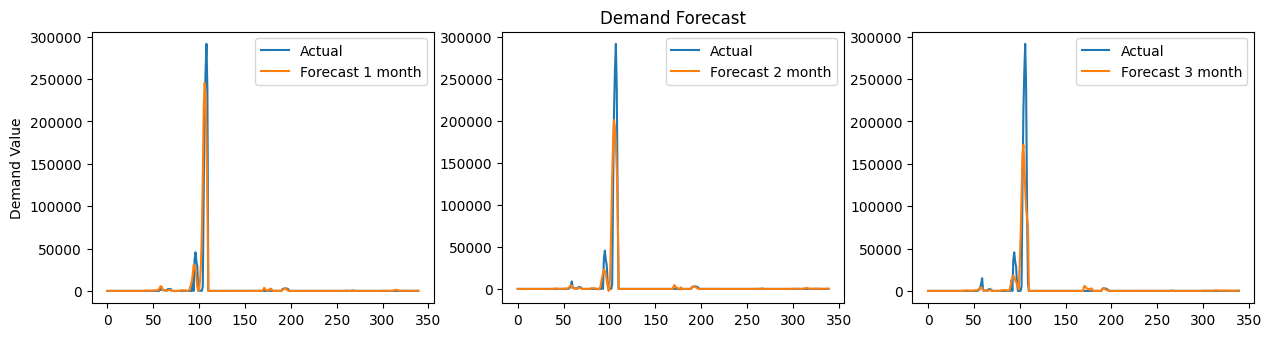

In [61]:
plt.rcParams['figure.figsize']=(15,12)
plt.subplot(331)
plt.plot(y_test_actual_all[:,0], label='Actual')
plt.plot(y_test_pred_all[:,0], label='Forecast 1 month')
plt.ylabel('Demand Value')
plt.legend(loc='upper right')
# plt.title("Supply Forecast t+1")
plt.subplot(332)
plt.plot(y_test_actual_all[:,1], label='Actual')
plt.plot(y_test_pred_all[:,1], label='Forecast 2 month')
plt.legend(loc='upper right')
plt.title("Demand Forecast")
plt.subplot(333)
plt.plot(y_test_actual_all[:,2], label='Actual')
plt.plot(y_test_pred_all[:,2], label='Forecast 3 month')
plt.legend(loc='upper right')
# plt.title("Supply Forecast t+1")



In [62]:
r2_asli = r2_score(y_test_actual_all, y_test_pred_all )
r2_asli

0.7455088260034909

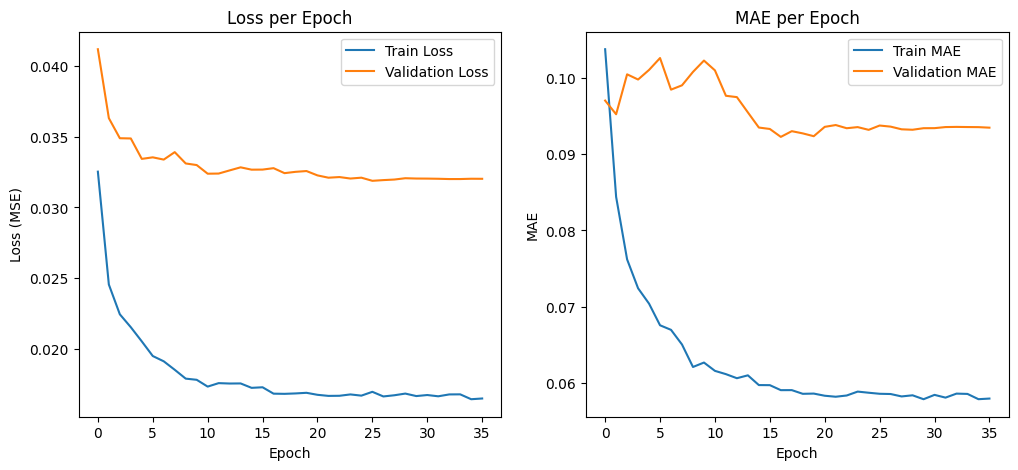

In [63]:
import matplotlib.pyplot as plt

# history adalah hasil output dari model.fit()
# history.history berisi dictionary metrik seperti 'loss', 'val_loss', 'mae', 'val_mae'

# Plot loss dan val_loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot mae dan val_mae
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()


# VARIABEL PENTING DALAM HPO

In [64]:
#Bayesian Optim

init_bo = 5
iter_bo = 5

#PSO 
par1 = 20
# par2 = 25
iter_pso = 10


In [65]:
# #Bayesian Optim

# init_bo = 10
# iter_bo = 25

# #PSO 
# par1 = 20
# par2 = 1
# iter_pso = 10


# PSO-par20

In [66]:
# import numpy as np
# from pyswarm import pso
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import os
# import pandas as pd
# import time

# # === Fungsi SMAPE ===
# def smape(y_true, y_pred):
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
#     return np.mean(np.abs(y_true - y_pred) / denominator) * 100

# # # === Bobot scalarization ===
# # w_mae = 0.25
# # w_mse = 0.25
# # w_smape = 0.25
# # w_rmse = 0.25

# # === Hyperparameter choices ===
# units_choices = [8, 16, 32, 64, 128, 256]
# lr_choices = [0.01, 0.001, 0.0001]
# layer_choices = [1, 2, 3, 4, 5]
# dropout = [0.1, 0.6] #KONTINU BUKAN DISKRIT
# batchsize = ????


# # # === Siapkan data ===
# # X_train = X_train_all.reshape((X_train_all.shape[0], 1, X_train_all.shape[1]))
# # X_val = X_val_all.reshape((X_val_all.shape[0], 1, X_val_all.shape[1]))
# # X_test = X_test_all.reshape((X_test_all.shape[0], 1, X_test_all.shape[1]))

# y_train = y_train_all
# y_val = y_val_all
# y_test = y_test_all

# # === Konfigurasi PSO ===
# swarmsize = par1
# maxiter = iter_pso
# model_path = f"/kaggle/working/pso_iter({maxiter})_partikel({swarmsize}).h5"

# print(f'=== TUNING PSO ===')
# print(f'swarmsize = {swarmsize}, iter = {maxiter}')
# print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
# print(f'X_val shape  : {X_val.shape}, y_val shape  : {y_val.shape}')
# print(f'X_test shape : {X_test.shape}, y_test shape : {y_test.shape}')
# print('==================')

# # === Definisi callbacks ===
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0),
#     ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)
# ]

# all_results = []
# best_score_global = np.inf  # untuk menyimpan model terbaik

# # === Fungsi training & evaluasi (satu kombinasi hyperparameter) ===
# def build_and_evaluate_lstm(units_per_layer, lr, n_layers):
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
#     for i in range(n_layers):
#         return_sequences = i < n_layers - 1
#         model.add(LSTM(units_per_layer[i], return_sequences=return_sequences, dropout=0.1))
    
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.1))
#     # model.add(Dense(16, activation='relu'))
#     # model.add(Dropout(0.1))
#     model.add(Dense(3, activation='linear'))
#     model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr))
#     model.fit(X_train, y_train,
#               validation_data=(X_val, y_val),
#               epochs=50, verbose=0, batch_size=32,
#               callbacks=callbacks)

#     y_pred = model.predict(X_val).flatten()
#     y_true = y_val.flatten()

#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     s_mape = smape(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)

#     return model, mae, mse, s_mape, rmse, r2 --> (FOKUS R2 AJA (SINGLE OBJ))

# # === Fungsi objektif PSO ===
# def objective_function(params):
#     global best_score_global

#     unit_indices = [int(round(params[i])) for i in range(5)]
#     lr_idx = int(round(params[5]))
#     layer_idx = int(round(params[6]))

#     units_per_layer = [units_choices[i] for i in unit_indices]
#     lr = lr_choices[lr_idx]
#     n_layers = layer_choices[layer_idx]

#     model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units_per_layer, lr, n_layers)

#     norm_mae = mae / 1.0
#     norm_mse = mse / 1.0
#     norm_rmse = rmse / 1.0
#     norm_smape = s_mape / 200.0
#     norm_r2 = r2 / 1.0

#     score = (w_mae * norm_mae) + (w_mse * norm_mse) + (w_smape * norm_smape) + (w_rmse * norm_rmse) 

#     if score < best_score_global:
#         best_score_global = score
#         model.save(model_path)
#         print(f">>> Model baru disimpan! Score: {score:.4f}")

#     all_results.append({
#         'units': units_per_layer[:n_layers],
#         'lr': lr,
#         'n_layers': n_layers,
#         'mae': mae,
#         'mse': mse,
#         'smape': s_mape,
#         'rmse': rmse,
#         'score': score,
#         'r2': r2
#     })

#     print(f"[Eval] units={units_per_layer[:n_layers]}, lr={lr:.5f}, n_layers={n_layers} | MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}, Score={score:.4f}, R2={r2:.4f}")
#     return score

# # === Jalankan PSO ===
# start_time = time.time()

# lb = [0] * 5 + [0, 0]  # 5 unit index, 1 learning rate index, 1 layer count index
# ub = [len(units_choices)-1] * 5 + [len(lr_choices)-1, len(layer_choices)-1]

# best_params, best_score = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)

# end_time = time.time()
# elapsed_time = end_time - start_time

# # === Ambil parameter terbaik ===
# best_units = [units_choices[int(round(best_params[i]))] for i in range(5)]
# best_lr = lr_choices[int(round(best_params[5]))]
# best_layers = layer_choices[int(round(best_params[6]))]

# print("\n=== BEST RESULT (VAL) ===")
# print(f"Best Hyperparameters: units={best_units[:best_layers]}, lr={best_lr}, n_layers={best_layers}")
# print("Best Scalarized Score:", best_score)

# best_result = min(all_results, key=lambda x: x['score'])
# print("MAE   (val):", best_result['mae'])
# print("MSE   (val):", best_result['mse'])
# print("SMAPE (val):", best_result['smape'])
# print("RMSE  (val):", best_result['rmse'])

# # === Simpan ke DataFrame termasuk waktu tuning ===
# hasil_pso1 = pd.DataFrame([{
#     'units': best_result['units'],
#     'lr': best_result['lr'],
#     'n_layers': best_result['n_layers'],
#     'mae': best_result['mae'],
#     'mse': best_result['mse'],
#     'smape': best_result['smape'],
#     'rmse': best_result['rmse'],
#     'score': best_result['score'],
#     'tuning_time_seconds': elapsed_time
# }])

# # === Final Test Evaluation ===
# print(f"\n=== FINAL TEST EVALUATION PSO partikel = {swarmsize} , iteration = {maxiter} ===")
# loaded_model = load_model(model_path, custom_objects={'MeanSquaredError': MeanSquaredError})
# y_pred_test = loaded_model.predict(X_test).flatten()
# y_true_test = y_test.flatten()

# mae_t = mean_absolute_error(y_true_test, y_pred_test)
# mse_t = mean_squared_error(y_true_test, y_pred_test)
# rmse_t = np.sqrt(mse_t)
# s_mape_t = smape(y_true_test, y_pred_test)

# # Normalisasi sesuai skala yang sama dengan validation
# norm_mae_test = mae_t / 1.0
# norm_mse_test = mse_t / 1.0
# norm_rmse_test = rmse_t / 1.0
# norm_smape_test = s_mape_t / 200.0

# scalar_score_test = (w_mae * norm_mae_test) + (w_mse * norm_mse_test) + (w_smape * norm_smape_test) + (w_rmse * norm_rmse_test)

# print(f"MAE   (test): {mae_t:.4f}")
# print(f"MSE   (test): {mse_t:.4f}")
# print(f"RMSE  (test): {rmse_t:.4f}")
# print(f"SMAPE (test): {s_mape_t:.2f}")
# print("scalar_score_test : ", scalar_score_test)
# print("TUNING + EVALUASI SELESAI")


In [67]:
import numpy as np
from pyswarm import pso
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import time


X_train = reshape_for_lstm(X_train_all, lookback, n_features)
X_val = reshape_for_lstm(X_val_all, lookback, n_features)
X_test = reshape_for_lstm(X_test_all, lookback, n_features)

y_train = y_train_all
y_val = y_val_all
y_test = y_test_all

swarmsize = par1
maxiter = iter_pso
model_path = f"/kaggle/working/pso_iter({maxiter})_partikel({swarmsize}).h5"

all_results = []

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_true - y_pred) / denominator) * 100

units_choices = [8, 16, 32, 64, 128, 256]
lr_choices = [0.01, 0.001, 0.0001]
layer_choices = [1, 2, 3, 4, 5]
batch_size_choices = [16, 32, 64, 128]

# Fungsi untuk membangun dan evaluasi model LSTM
def build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    for i in range(n_layers):
        return_sequences = i < n_layers - 1
        model.add(LSTM(units_per_layer[i], return_sequences=return_sequences, dropout=dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='linear'))
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr))

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50, verbose=0,
              batch_size=batch_size,
              callbacks=callbacks)

    y_pred = model.predict(X_val).flatten()
    y_true = y_val.flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    s_mape = smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return model, mae, mse, s_mape, rmse, r2

best_r2_global = -np.inf  # Karena R2 maksimal di 1

def objective_function(params):
    global best_r2_global

    # params indexing:
    # 0-4: units index (5 layers max)
    # 5: learning rate index
    # 6: n_layers index
    # 7: dropout continuous between 0.1 and 0.6
    # 8: batch_size index (diskrit)

    unit_indices = [int(round(params[i])) for i in range(5)]
    lr_idx = int(round(params[5]))
    layer_idx = int(round(params[6]))
    dropout_rate = params[7]  # langsung float
    batch_idx = int(round(params[8]))

    units_per_layer = [units_choices[i] for i in unit_indices]
    lr = lr_choices[lr_idx]
    n_layers = layer_choices[layer_idx]
    batch_size = batch_size_choices[batch_idx]

    model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size)

    # Karena kita ingin max R2, tapi PSO minimizer, kita kembalikan negatif R2
    score = -r2

    if r2 > best_r2_global:
        best_r2_global = r2
        model.save(model_path)
        print(f">>> Model baru disimpan! R2: {r2:.4f}")

    all_results.append({
        'units': units_per_layer[:n_layers],
        'lr': lr,
        'n_layers': n_layers,
        'dropout': dropout_rate,
        'batch_size': batch_size,
        'mae': mae,
        'mse': mse,
        'smape': s_mape,
        'rmse': rmse,
        'r2': r2
    })

    print(f"[Eval] units={units_per_layer[:n_layers]}, lr={lr:.5f}, n_layers={n_layers}, dropout={dropout_rate:.3f}, batch_size={batch_size} | "
          f"MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}, R2={r2:.4f}")
    return score

# Setup batas bawah dan atas parameter
lb = [0]*5 + [0] + [0] + [0.1] + [0]  # units idx, lr idx, layer idx, dropout, batch idx
ub = [len(units_choices)-1]*5 + [len(lr_choices)-1] + [len(layer_choices)-1] + [0.6] + [len(batch_size_choices)-1]

# Jalankan PSO
start_time = time.time()
best_params, best_score = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
elapsed_time = time.time() - start_time

# Ambil parameter terbaik
best_units = [units_choices[int(round(best_params[i]))] for i in range(5)]
best_lr = lr_choices[int(round(best_params[5]))]
best_layers = layer_choices[int(round(best_params[6]))]
best_dropout = best_params[7]
best_batch_size = batch_size_choices[int(round(best_params[8]))]

# Cari hasil terbaik berdasarkan R2
best_result = max(all_results, key=lambda x: x['r2'])

print("\n=== BEST RESULT (VAL) ===")
print(f"Best Hyperparameters: units={best_units[:best_layers]}, lr={best_lr}, n_layers={best_layers}, dropout={best_dropout:.3f}, batch_size={best_batch_size}")
print(f"Best R2 score: {best_result['r2']:.4f}")
print(f"MAE   (val): {best_result['mae']:.4f}")
print(f"MSE   (val): {best_result['mse']:.4f}")
print(f"SMAPE (val): {best_result['smape']:.2f}")
print(f"RMSE  (val): {best_result['rmse']:.4f}")
print(f"Tuning time (seconds): {elapsed_time:.2f}")

# Simpan hasil ke DataFrame jika perlu
hasil_pso1 = pd.DataFrame([{
    'units': best_result['units'],
    'lr': best_result['lr'],
    'n_layers': best_result['n_layers'],
    'dropout': best_result['dropout'],
    'batch_size': best_result['batch_size'],
    'mae': best_result['mae'],
    'mse': best_result['mse'],
    'smape': best_result['smape'],
    'rmse': best_result['rmse'],
    'r2': best_result['r2'],
    'tuning_time_seconds': elapsed_time
}])

# === Final Test Evaluation ===
# from sklearn.metrics import r2_score

print(f"\n=== FINAL TEST EVALUATION BO iteration = {maxiter} ===")
loaded_model = load_model(model_path, custom_objects={'MeanSquaredError': MeanSquaredError})
y_pred_test = loaded_model.predict(X_test).flatten()
y_true_test = y_test.flatten()

# === Evaluasi metrik ===
mae_t = mean_absolute_error(y_true_test, y_pred_test)
mse_t = mean_squared_error(y_true_test, y_pred_test)
rmse_t = np.sqrt(mse_t)
s_mape_t = smape(y_true_test, y_pred_test)
r2_t = r2_score(y_true_test, y_pred_test)

# === Cetak hasil ===
print(f"MAE   (test): {mae_t:.4f}")
print(f"MSE   (test): {mse_t:.4f}")
print(f"RMSE  (test): {rmse_t:.4f}")
print(f"SMAPE (test): {s_mape_t:.2f}")
print(f"R2    (test): {r2_t:.4f}")
print("TUNING + EVALUASI SELESAI")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>>> Model baru disimpan! R2: 0.3278
[Eval] units=[32], lr=0.01000, n_layers=1, dropout=0.533, batch_size=64 | MAE=0.0867, MSE=0.0336, SMAPE=171.93, RMSE=0.1833, R2=0.3278
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
>>> Model baru disimpan! R2: 0.4227
[Eval] units=[128, 8], lr=0.01000, n_layers=2, dropout=0.252, batch_size=64 | MAE=0.0740, MSE=0.0288, SMAPE=168.84, RMSE=0.1698, R2=0.4227
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
[Eval] units=[32, 16, 64], lr=0.00100, n_layers=3, dropout=0.493, batch_size=32 | MAE=0.0969, MSE=0.0379, SMAPE=174.16, RMSE=0.1947, R2=0.2413
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
[Eval] units=[64, 64, 8, 64, 16], lr=0.01000, n_layers=5, dropout=0.583, batch_size=64 | MAE=0.0952, MSE=0.0365, SMAPE=174.58, RMSE=0.1911, R2=0.2693
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[Eval] units=[32], lr=0.00100, n_layers=1, dropout=0.555, batch_size=32 | MAE=0.0964, MSE=0.0387, SMAPE=174.72, RMSE=0.1967, R2=0.2258
11/11 ━━━━━━━━━━━━━━━━━━━

# BO - 25 iter

In [68]:
# === INSTALL terlebih dahulu (hanya 1x di awal) ===
# !pip install bayesian-optimization

import numpy as np
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import pandas as pd
import time

# === Fungsi SMAPE ===
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_true - y_pred) / denominator) * 100


# === Hyperparameter choices ===
units_choices = [8, 16, 32, 64, 128, 256]
lr_choices = [0.01, 0.001, 0.0001]
layer_choices = [1, 2, 3, 4, 5]
batch_size_choices = [16, 32, 64, 128]

# === Siapkan data ===
X_train = reshape_for_lstm(X_train_all, lookback, n_features)
X_val = reshape_for_lstm(X_val_all, lookback, n_features)
X_test = reshape_for_lstm(X_test_all, lookback, n_features)

y_train = y_train_all
y_val = y_val_all
y_test = y_test_all

# === Konfigurasi BO ===
maxiter = iter_bo
model_path = f"/kaggle/working/final_bo_model.h5"

print(f'=== TUNING BAYESIAN OPTIMIZATION ===')
print(f'iter = {maxiter}')
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape  : {X_val.shape}, y_val shape  : {y_val.shape}')
print(f'X_test shape : {X_test.shape}, y_test shape : {y_test.shape}')
print('==================')

# === Definisi callbacks ===
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0),
    ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)
]

all_results = []
best_score_global = np.inf

# Fungsi untuk membangun dan evaluasi model LSTM
def build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    for i in range(n_layers):
        return_sequences = i < n_layers - 1
        model.add(LSTM(units_per_layer[i], return_sequences=return_sequences, dropout=dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='linear'))
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr))

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50, verbose=0,
              batch_size=batch_size,
              callbacks=callbacks)

    y_pred = model.predict(X_val).flatten()
    y_true = y_val.flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    s_mape = smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return model, mae, mse, s_mape, rmse, r2

best_r2_global = -np.inf

# === Fungsi objektif untuk BO ===
def objective_function(params):
    global best_r2_global
    # params indexing:
    # 0-4: units index (5 layers max)
    # 5: learning rate index
    # 6: n_layers index
    # 7: dropout continuous between 0.1 and 0.6
    # 8: batch_size index (diskrit)

    unit_indices = [int(round(params[i])) for i in range(5)]
    lr_idx = int(round(params[5]))
    layer_idx = int(round(params[6]))
    dropout_rate = params[7]  # langsung float
    batch_idx = int(round(params[8]))

    units_per_layer = [units_choices[i] for i in unit_indices]
    lr = lr_choices[lr_idx]
    n_layers = layer_choices[layer_idx]
    batch_size = batch_size_choices[batch_idx]

    model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size)

    score = -r2

    if r2 > best_r2_global:
        best_r2_global = r2
        model.save(model_path)
        print(f">>> Model baru disimpan! R2: {r2:.4f}")

    all_results.append({
        'units': units_per_layer[:n_layers],
        'lr': lr,
        'n_layers': n_layers,
        'dropout': dropout_rate,
        'batch_size': batch_size,
        'mae': mae,
        'mse': mse,
        'smape': s_mape,
        'rmse': rmse,
        'r2': r2
        # 'score': score   # ✅ Tambahkan ini
    })


    print(f"[Eval] units={units_per_layer[:n_layers]}, lr={lr:.5f}, n_layers={n_layers}, dropout={dropout_rate:.3f}, batch_size={batch_size} | "
          f"MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}, R2={r2:.4f}")
    return score

# Setup batas bawah dan atas parameter
lb = [0]*5 + [0] + [0] + [0.1] + [0]  # units idx, lr idx, layer idx, dropout, batch idx
ub = [len(units_choices)-1]*5 + [len(lr_choices)-1] + [len(layer_choices)-1] + [0.6] + [len(batch_size_choices)-1]

# === Wrapper fungsi objektif untuk BO ===
# Perbaiki objective_bo
def objective_bo(unit1, unit2, unit3, unit4, unit5, lr_idx, layer_idx, dropout_rate, batch_idx):
    params = [unit1, unit2, unit3, unit4, unit5, lr_idx, layer_idx, dropout_rate, batch_idx]
    return -objective_function(params)
  # negasi agar BO meminimalkan

# === Jalankan Bayesian Optimization ===
optimizer = BayesianOptimization(
    f=objective_bo,
    # Tambahkan ke pbounds:
    pbounds={
        'unit1': (0, len(units_choices) - 1),
        'unit2': (0, len(units_choices) - 1),
        'unit3': (0, len(units_choices) - 1),
        'unit4': (0, len(units_choices) - 1),
        'unit5': (0, len(units_choices) - 1),
        'lr_idx': (0, len(lr_choices) - 1),
        'layer_idx': (0, len(layer_choices) - 1),
        'dropout_rate': (0.1, 0.6),                   # ✅ Tambah ini
        'batch_idx': (0, len(batch_size_choices) - 1) # ✅ Tambah ini
    }
,
    verbose=2,
    random_state=42
)

start_time = time.time()
optimizer.maximize(init_points=init_bo, n_iter=iter_bo)
end_time = time.time()
elapsed_time = end_time - start_time

# === Ambil parameter terbaik dari hasil BO ===
best_params_bo = optimizer.max['params']
best_params = [
    best_params_bo['unit1'],
    best_params_bo['unit2'],
    best_params_bo['unit3'],
    best_params_bo['unit4'],
    best_params_bo['unit5'],
    best_params_bo['lr_idx'],
    best_params_bo['layer_idx']
]

# Ambil hyperparameter terbaik
best_units = [units_choices[int(round(best_params[i]))] for i in range(5)]
best_lr = lr_choices[int(round(best_params[5]))]
best_layers = layer_choices[int(round(best_params[6]))]
best_dropout = best_params_bo['dropout_rate']
best_batch_size = batch_size_choices[int(round(best_params_bo['batch_idx']))]

# === Cetak hasil tuning terbaik
print("\n=== BEST RESULT (VAL) ===")
print(f"Best Hyperparameters:")
print(f"- units       : {best_units[:best_layers]}")
print(f"- lr          : {best_lr}")
print(f"- n_layers    : {best_layers}")
print(f"- dropout     : {best_dropout:.3f}")
print(f"- batch_size  : {best_batch_size}")

# Ambil hasil evaluasi berdasarkan MAE (atau metrik pilihan)
best_result = min(all_results, key=lambda x: x['mae'])
print("MAE   (val):", best_result['mae'])
print("MSE   (val):", best_result['mse'])
print("SMAPE (val):", best_result['smape'])
print("RMSE  (val):", best_result['rmse'])
print("R2  (val):", best_result['r2'])

# === Simpan hasil ke DataFrame ===
hasil_bo = pd.DataFrame([{
    'units': best_result['units'],
    'lr': best_result['lr'],
    'n_layers': best_result['n_layers'],
    'dropout': best_result['dropout'],
    'batch_size': best_result['batch_size'],
    'mae': best_result['mae'],
    'mse': best_result['mse'],
    'smape': best_result['smape'],
    'rmse': best_result['rmse'],
    'r2': best_result['r2'],
    'tuning_time_seconds': elapsed_time
}])

# === Final Test Evaluation ===
# from sklearn.metrics import r2_score

print(f"\n=== FINAL TEST EVALUATION BO iteration = {maxiter} ===")
loaded_model = load_model(model_path, custom_objects={'MeanSquaredError': MeanSquaredError})
y_pred_test = loaded_model.predict(X_test).flatten()
y_true_test = y_test.flatten()

# === Evaluasi metrik ===
mae_t = mean_absolute_error(y_true_test, y_pred_test)
mse_t = mean_squared_error(y_true_test, y_pred_test)
rmse_t = np.sqrt(mse_t)
s_mape_t = smape(y_true_test, y_pred_test)
r2_t = r2_score(y_true_test, y_pred_test)

# === Cetak hasil ===
print(f"MAE   (test): {mae_t:.4f}")
print(f"MSE   (test): {mse_t:.4f}")
print(f"RMSE  (test): {rmse_t:.4f}")
print(f"SMAPE (test): {s_mape_t:.2f}")
print(f"R2    (test): {r2_t:.4f}")
print("TUNING + EVALUASI SELESAI")

=== TUNING BAYESIAN OPTIMIZATION ===
iter = 5
X_train shape: (2856, 12, 19), y_train shape: (2856, 3)
X_val shape  : (340, 12, 19), y_val shape  : (340, 3)
X_test shape : (374, 12, 19), y_test shape : (374, 3)
|   iter    |  target   | batch_idx | dropou... | layer_idx |  lr_idx   |   unit1   |   unit2   |   unit3   |   unit4   |   unit5   |
-------------------------------------------------------------------------------------------------------------------------------------
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
>>> Model baru disimpan! R2: 0.2332
[Eval] units=[16, 16, 8, 128], lr=0.00100, n_layers=4, dropout=0.575, batch_size=32 | MAE=0.0999, MSE=0.0383, SMAPE=176.50, RMSE=0.1957, R2=0.2332
| 1         | 0.2332    | 1.124     | 0.5754    | 2.928     | 1.197     | 0.7801    | 0.78      | 0.2904    | 4.331     | 3.006     |
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
[Eval] units=[16, 16, 16, 32, 64], lr=0.00010, n_layers=5, dropout=0.110, batch_size=64 | MAE=0.1022, MSE=0.0394, SMAPE=175.8

In [69]:
# hasil_bo

# PSOBO - 20 par pso , 10 iterpso , 25 iterBo

In [70]:
import numpy as np
import time
import pandas as pd
from pyswarm import pso
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import Input, Dropout


X_train = reshape_for_lstm(X_train_all, lookback, n_features)
X_val = reshape_for_lstm(X_val_all, lookback, n_features)
X_test = reshape_for_lstm(X_test_all, lookback, n_features)

y_train = y_train_all
y_val = y_val_all
y_test = y_test_all

swarmsize = par1
maxiter = iter_pso
model_path = f"/kaggle/working/pso_nya_PSOBO.h5"
model_bo_final_path = f'/kaggle/working/PSOBO_FIX.h5'

all_results = []

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_true - y_pred) / denominator) * 100

units_choices = [8, 16, 32, 64, 128, 256]
lr_choices = [0.01, 0.001, 0.0001]
layer_choices = [1, 2, 3, 4, 5]
batch_size_choices = [16, 32, 64, 128]

# Fungsi untuk membangun dan evaluasi model LSTM
def build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    for i in range(n_layers):
        return_sequences = i < n_layers - 1
        model.add(LSTM(units_per_layer[i], return_sequences=return_sequences, dropout=dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='linear'))
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr))

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50, verbose=0,
              batch_size=batch_size,
              callbacks=callbacks)

    y_pred = model.predict(X_val).flatten()
    y_true = y_val.flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    s_mape = smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return model, mae, mse, s_mape, rmse, r2

best_r2_global = -np.inf  # Karena R2 maksimal di 1

def objective_function(params):
    global best_r2_global

    # params indexing:
    # 0-4: units index (5 layers max)
    # 5: learning rate index
    # 6: n_layers index
    # 7: dropout continuous between 0.1 and 0.6
    # 8: batch_size index (diskrit)

    unit_indices = [int(round(params[i])) for i in range(5)]
    lr_idx = int(round(params[5]))
    layer_idx = int(round(params[6]))
    dropout_rate = params[7]  # langsung float
    batch_idx = int(round(params[8]))

    units_per_layer = [units_choices[i] for i in unit_indices]
    lr = lr_choices[lr_idx]
    n_layers = layer_choices[layer_idx]
    batch_size = batch_size_choices[batch_idx]

    model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size)

    # Karena kita ingin max R2, tapi PSO minimizer, kita kembalikan negatif R2
    score = -r2

    if r2 > best_r2_global:
        best_r2_global = r2
        model.save(model_path)
        print(f">>> Model baru disimpan! R2: {r2:.4f}")

    all_results.append({
        'units': units_per_layer[:n_layers],
        'lr': lr,
        'n_layers': n_layers,
        'dropout': dropout_rate,
        'batch_size': batch_size,
        'mae': mae,
        'mse': mse,
        'smape': s_mape,
        'rmse': rmse,
        'r2': r2
    })

    print(f"[Eval] units={units_per_layer[:n_layers]}, lr={lr:.5f}, n_layers={n_layers}, dropout={dropout_rate:.3f}, batch_size={batch_size} | "
          f"MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}, R2={r2:.4f}")
    return score

# Setup batas bawah dan atas parameter
lb = [0]*5 + [0] + [0] + [0.1] + [0]  # units idx, lr idx, layer idx, dropout, batch idx
ub = [len(units_choices)-1]*5 + [len(lr_choices)-1] + [len(layer_choices)-1] + [0.6] + [len(batch_size_choices)-1]

# Jalankan PSO
start_time = time.time()
best_params, best_score = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
elapsed_time = time.time() - start_time



# =========== lanjut ke bo ==============
# === Extract Best PSO Result ===
unit_indices = [int(round(best_params[i])) for i in range(5)]
pso_lr_idx = int(round(best_params[5]))
pso_layer_idx = int(round(best_params[6]))
pso_batch_idx = int(round(best_params[8]))
pso_dropout = best_params[7]

pso_units_full = [units_choices[i] for i in unit_indices]
pso_lr = lr_choices[pso_lr_idx]
pso_layers = layer_choices[pso_layer_idx]
pso_units = pso_units_full[:pso_layers]

# === Define BO Space ===
unit_map = {8:[4,8], 16:[8, 16], 32: [16, 32], 64: [48, 64], 128: [96, 128], 256: [192, 256], 512: [384, 512]}
lr_map = {0.01: [0.005, 0.01], 0.001: [0.0005, 0.001], 0.0001: [0.00005, 0.0001]}
def to_log_bounds(lr_values): return np.log10(min(lr_values)), np.log10(max(lr_values))

bo_pbounds = {
    **{f'units_{i+1}': (min(unit_map[pso_units[i]]), max(unit_map[pso_units[i]])) for i in range(pso_layers)},
    'lr_log': to_log_bounds(lr_map[pso_lr]),
    'n_layers': (pso_layers, pso_layers),
    'dropout': (max(0.1, pso_dropout - 0.1), min(0.6, pso_dropout + 0.1)),
    'batch_idx': (max(0, pso_batch_idx - 1), min(len(batch_size_choices) - 1, pso_batch_idx + 1))
}

# === BO Objective ===
bo_results = []
best_r2_bo = -np.inf  # maximize R²

def bo_objective(**kwargs):
    global best_model_bo, best_r2_bo

    def map_to_nearest(val, choices):
        return min(choices, key=lambda x: abs(x - val))

    lr_val = 10 ** kwargs['lr_log']
    lr = map_to_nearest(lr_val, lr_map[pso_lr])
    n_layers = int(round(kwargs['n_layers']))
    dropout = kwargs['dropout']
    batch_size = batch_size_choices[int(round(kwargs['batch_idx']))]

    units = []
    for i in range(n_layers):
        raw_val = kwargs[f'units_{i+1}']
        units.append(map_to_nearest(raw_val, unit_map[pso_units[i]]))

    model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units, lr, n_layers, dropout, batch_size)

    bo_results.append({
        'units': units,
        'lr': lr,
        'n_layers': n_layers,
        'dropout': dropout,
        'batch_size': batch_size,
        'mae': mae,
        'mse': mse,
        'smape': s_mape,
        'rmse': rmse,
        'r2': r2
    })

    if r2 > best_r2_bo:
        best_r2_bo = r2
        best_model_bo = model
        print(f">>> [BO] Model BO terbaik saat ini! R²: {r2:.4f}")
        print(f"[BO Eval] units={units}, lr={lr:.5f}, n_layers={n_layers}, dropout={dropout:.3f}, batch_size={batch_size} | R2={r2:.4f}, MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}")

    return r2  # karena ingin dimaksimalkan

# === Jalankan BO ===
optimizer = BayesianOptimization(f=bo_objective, pbounds=bo_pbounds, random_state=42, verbose=2)
optimizer.maximize(init_points=init_bo, n_iter=iter_bo)

# === Simpan Model Terbaik dari BO ===
if best_model_bo is not None:
    best_model_bo.save(model_bo_final_path)

# === Ringkasan Validasi ===
end_time = time.time()
elapsed_time = end_time - start_time
best_result = max(bo_results, key=lambda x: x['r2'])

best_units = best_result['units']
best_lr = best_result['lr']
best_layers = best_result['n_layers']
best_dropout = best_result['dropout']
best_batch_size = best_result['batch_size']
best_r2 = best_result['r2']

print("\n=== BEST RESULT (VAL) ===")
print(f"Best Hyperparameters: units={best_units}, lr={best_lr}, n_layers={best_layers}, dropout={best_dropout:.3f}, batch_size={best_batch_size}")
print(f"Best R² (val): {best_r2:.4f}")
print(f"MAE   (val): {best_result['mae']:.4f}")
print(f"MSE   (val): {best_result['mse']:.4f}")
print(f"SMAPE (val): {best_result['smape']:.2f}")
print(f"RMSE  (val): {best_result['rmse']:.4f}")
print(f"R2  (val): {best_result['r2']:.4f}")

hasil_psobo = pd.DataFrame([{
    'units': best_units,
    'lr': best_lr,
    'n_layers': best_layers,
    'dropout': best_result['dropout'],
    'batch_size': best_result['batch_size'],
    'mae': best_result['mae'],
    'mse': best_result['mse'],
    'smape': best_result['smape'],
    'rmse': best_result['rmse'],
    'r2': best_result['r2'],
    'tuning_time_seconds': elapsed_time
}])

# === Evaluasi Akhir (TEST SET) ===
loaded_model = load_model(model_bo_final_path, custom_objects={'MeanSquaredError': MeanSquaredError})
y_pred_test = loaded_model.predict(X_test).flatten()
y_true_test = y_test.flatten()

mae_t = mean_absolute_error(y_true_test, y_pred_test)
mse_t = mean_squared_error(y_true_test, y_pred_test)
rmse_t = np.sqrt(mse_t)
s_mape_t = smape(y_true_test, y_pred_test)
r2_t = r2_score(y_true_test, y_pred_test)

print("\n=== FINAL TEST EVALUATION HYBRID PSO → BO ===")
print(f"MAE   (test): {mae_t:.4f}")
print(f"MSE   (test): {mse_t:.4f}")
print(f"RMSE  (test): {rmse_t:.4f}")
print(f"SMAPE (test): {s_mape_t:.2f}")
print(f"R2    (test): {r2_t:.4f}")
print(f"Total Waktu Eksekusi: {elapsed_time:.2f} detik")
print("TUNING + EVALUASI SELESAI")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
>>> Model baru disimpan! R2: 0.3947
[Eval] units=[64, 32], lr=0.00010, n_layers=2, dropout=0.120, batch_size=64 | MAE=0.0939, MSE=0.0302, SMAPE=171.98, RMSE=0.1739, R2=0.3947
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
>>> Model baru disimpan! R2: 0.4070
[Eval] units=[32, 256, 64, 16, 128], lr=0.00100, n_layers=5, dropout=0.287, batch_size=64 | MAE=0.0779, MSE=0.0296, SMAPE=169.90, RMSE=0.1721, R2=0.4070
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
[Eval] units=[8, 32, 128, 128], lr=0.01000, n_layers=4, dropout=0.565, batch_size=16 | MAE=0.1390, MSE=0.0505, SMAPE=182.32, RMSE=0.2247, R2=-0.0106
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
>>> Model baru disimpan! R2: 0.4072
[Eval] units=[32], lr=0.00010, n_layers=1, dropout=0.346, batch_size=32 | MAE=0.0894, MSE=0.0296, SMAPE=171.93, RMSE=0.1721, R2=0.4072
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
[Eval] units=[32, 32, 64, 16], lr=0.00010, n_layers=4, dropout=0.177, batch_size=16 | MAE=0.1022, MSE=0.0369, SMAPE

In [71]:
hasil_bo.to_excel('hasil_bo.xlsx')
hasil_pso1.to_excel('hasil_pso1.xlsx')
hasil_psobo.to_excel('hasil_psobo.xlsx')
# hasil_psogs.to_excel('hasil_psogs.xlsx')
print('sudah tersimpan ke excel')

sudah tersimpan ke excel


# PSOGS - 20 par pso , 10 iter pso -- NAUFAL

In [72]:
# from itertools import product
# import numpy as np
# import pandas as pd
# import time
# from pyswarm import pso
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import mean_absolute_error, mean_squared_error


# # === Fungsi SMAPE ===
# def smape(y_true, y_pred):
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
#     return np.mean(np.abs(y_true - y_pred) / denominator) * 100
    
# # === Hyperparameter choices ===
# units_choices = [8, 16, 32, 64, 128, 256]
# lr_choices = [0.01, 0.001, 0.0001]
# layer_choices = [1, 2, 3, 4, 5]
# batch_size_choices = [16, 32, 64, 128]

# # === Placeholder data reshaping ===
# y_train = y_train_all
# y_val = y_val_all
# y_test = y_test_all

# # === Paths dan config ===
# swarmsize = par1
# maxiter = iter_pso
# model_path = f"/kaggle/working/psonya_PSOGS.h5"
# model_gs_final_path = "/kaggle/working/final_gs_model.h5"

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0),
#     ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)
# ]

# all_results = []
# gs_results = []

# # Fungsi untuk membangun dan evaluasi model LSTM
# def build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size):
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
#     for i in range(n_layers):
#         return_sequences = i < n_layers - 1
#         model.add(LSTM(units_per_layer[i], return_sequences=return_sequences, dropout=dropout_rate))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(3, activation='linear'))
#     model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr))

#     model.fit(X_train, y_train,
#               validation_data=(X_val, y_val),
#               epochs=50, verbose=0,
#               batch_size=batch_size,
#               callbacks=callbacks)

#     y_pred = model.predict(X_val).flatten()
#     y_true = y_val.flatten()

#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     s_mape = smape(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)

#     return model, mae, mse, s_mape, rmse, r2
    
# best_r2_global = -np.inf 
# def objective_function(params):
#     global best_r2_global

#     # params indexing:
#     # 0-4: units index (5 layers max)
#     # 5: learning rate index
#     # 6: n_layers index
#     # 7: dropout continuous between 0.1 and 0.6
#     # 8: batch_size index (diskrit)

#     unit_indices = [int(round(params[i])) for i in range(5)]
#     lr_idx = int(round(params[5]))
#     layer_idx = int(round(params[6]))
#     dropout_rate = params[7]  # langsung float
#     batch_idx = int(round(params[8]))

#     units_per_layer = [units_choices[i] for i in unit_indices]
#     lr = lr_choices[lr_idx]
#     n_layers = layer_choices[layer_idx]
#     batch_size = batch_size_choices[batch_idx]

#     model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units_per_layer, lr, n_layers, dropout_rate, batch_size)

#     # Karena kita ingin max R2, tapi PSO minimizer, kita kembalikan negatif R2
#     score = -r2

#     if r2 > best_r2_global:
#         best_r2_global = r2
#         model.save(model_path)
#         print(f">>> Model baru disimpan! R2: {r2:.4f}")

#     all_results.append({
#         'units': units_per_layer[:n_layers],
#         'lr': lr,
#         'n_layers': n_layers,
#         'dropout': dropout_rate,
#         'batch_size': batch_size,
#         'mae': mae,
#         'mse': mse,
#         'smape': s_mape,
#         'rmse': rmse,
#         'r2': r2
#     })

#     print(f"[Eval] units={units_per_layer[:n_layers]}, lr={lr:.5f}, n_layers={n_layers}, dropout={dropout_rate:.3f}, batch_size={batch_size} | "
#           f"MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}, R2={r2:.4f}")
#     return score
    


# # Setup batas bawah dan atas parameter
# lb = [0]*5 + [0] + [0] + [0.1] + [0]  # units idx, lr idx, layer idx, dropout, batch idx
# ub = [len(units_choices)-1]*5 + [len(lr_choices)-1] + [len(layer_choices)-1] + [0.6] + [len(batch_size_choices)-1]

# # Jalankan PSO
# start_time = time.time()
# best_params, best_score = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
# elapsed_time = time.time() - start_time


# ###### lanjutkan ke GS ######################

# # === Ambil hasil PSO terbaik ===
# pso_unit_indices = [int(round(best_params[i])) for i in range(5)]
# pso_lr_idx = int(round(best_params[5]))
# pso_layer_idx = int(round(best_params[6]))
# pso_dropout = best_params[7]
# pso_batch_idx = int(round(best_params[8]))

# pso_units_all = [units_choices[i] for i in pso_unit_indices]
# pso_lr = lr_choices[pso_lr_idx]
# pso_layers = layer_choices[pso_layer_idx]
# pso_units = pso_units_all[:pso_layers]


# # === Define GS range berdasarkan sekitar hasil PSO ===
# unit_map = {8:[4,8], 16:[8,16],32: [16, 32], 64: [48, 64], 128: [96, 128], 256: [192, 256]}
# lr_map = {0.01: [0.005, 0.01], 0.001: [0.0005, 0.001], 0.0001: [0.00005, 0.0001]}
# dropout_range = [round(pso_dropout + d, 2) for d in [-0.1, 0, 0.1] if 0.1 <= pso_dropout + d <= 0.6]
# batch_sizes = batch_size_choices  # atau batasi sekitar best batch idx kalau mau sempitkan

# grid_units = [unit_map.get(u, [u]) for u in pso_units]  # fallback: [u] jika u tidak ada di map
# grid_lr = lr_map[pso_lr]
# grid_n_layers = [pso_layers]

# # === Grid Search ===
# best_r2_gs = -np.inf
# best_model_gs = None

# for combo in product(*grid_units, grid_lr, grid_n_layers, dropout_range, batch_sizes):
#     units = list(combo[:-4])
#     lr = combo[-4]
#     n_layers = combo[-3]
#     dropout = combo[-2]
#     batch_size = combo[-1]

#     model, mae, mse, s_mape, rmse, r2 = build_and_evaluate_lstm(units, lr, n_layers, dropout, batch_size)

#     gs_results.append({
#         'units': units,
#         'lr': lr,
#         'n_layers': n_layers,
#         'dropout': dropout,
#         'batch_size': batch_size,
#         'mae': mae,
#         'mse': mse,
#         'rmse': rmse,
#         'smape': s_mape,
#         'r2': r2
#     })

#     print(f"[GS Eval] units={units}, lr={lr:.5f}, n_layers={n_layers}, dropout={dropout:.2f}, batch_size={batch_size} | "
#           f"MAE={mae:.4f}, MSE={mse:.4f}, RMSE={rmse:.4f}, SMAPE={s_mape:.2f}, R2={r2:.4f}")

#     if r2 > best_r2_gs:
#         best_r2_gs = r2
#         best_model_gs = model
#         best_result = gs_results[-1]  # yang baru ini

# # Simpan model terbaik hasil GS
# if best_model_gs is not None:
#     best_model_gs.save(model_gs_final_path)


# end_time = time.time()
# elapsed_time = end_time - start_time

# # === Ringkasan Hasil GS Terbaik (berdasarkan R2 tertinggi) ===
# best_result = max(gs_results, key=lambda x: x['r2'])  # disesuaikan

# print("\n=== BEST RESULT (VAL) ===")
# print(f"Best Hyperparameters:")
# print(f"- units      : {best_result['units']}")
# print(f"- lr         : {best_result['lr']}")
# print(f"- n_layers   : {best_result['n_layers']}")
# print(f"- dropout    : {best_result['dropout']}")
# print(f"- batch_size : {best_result['batch_size']}")
# print("MAE   (val):", best_result['mae'])
# print("MSE   (val):", best_result['mse'])
# print("RMSE  (val):", best_result['rmse'])
# print("SMAPE (val):", best_result['smape'])
# print("R2    (val):", best_result['r2'])

# # === Simpan ke DataFrame ===
# hasil_psogs = pd.DataFrame([{
#     'units': best_result['units'],
#     'lr': best_result['lr'],
#     'n_layers': best_result['n_layers'],
#     'dropout': best_result['dropout'],
#     'batch_size': best_result['batch_size'],
#     'mae': best_result['mae'],
#     'mse': best_result['mse'],
#     'rmse': best_result['rmse'],
#     'smape': best_result['smape'],
#     'r2_val': best_result['r2'],
#     'tuning_time_seconds': elapsed_time
# }])

# # === Evaluasi Akhir (Test Set) ===
# loaded_model = load_model(model_gs_final_path, custom_objects={'MeanSquaredError': MeanSquaredError})
# y_pred_test = loaded_model.predict(X_test).flatten()
# y_true_test = y_test.flatten()

# mae_t = mean_absolute_error(y_true_test, y_pred_test)
# mse_t = mean_squared_error(y_true_test, y_pred_test)
# rmse_t = np.sqrt(mse_t)
# s_mape_t = smape(y_true_test, y_pred_test)
# r2_t = r2_score(y_true_test, y_pred_test)

# print("\n=== FINAL TEST EVALUATION HYBRID PSO → GS ===")
# print(f"MAE   (test): {mae_t:.4f}")
# print(f"MSE   (test): {mse_t:.4f}")
# print(f"RMSE  (test): {rmse_t:.4f}")
# print(f"SMAPE (test): {s_mape_t:.2f}")
# print(f"R2    (test): {r2_t:.4f}")
# print(f"Total Waktu Eksekusi: {elapsed_time:.2f} detik")
# print("TUNING + EVALUASI SELESAI")


In [73]:
# hasil_psogs

In [74]:
# hasil_psogs.to_excel('hasil_psogs.xlsx')

In [75]:
# hasil_psogs

In [76]:
# kolom_gs = ['units',	'lr',	'n_layers',	'dropout',	'batch_size',	'mae',	'mse',	'rmse', 'smape'	,'r2','tuning_time_seconds']
# hasil_psogs.columns = kolom_gs
# hasil_psogs

# PSOGS -- PAPER -- PAK AGUS

# REKAP

In [77]:
# hasil_bo.to_excel('hasil_bo.xlsx')
# hasil_pso1.to_excel('hasil_pso1.xlsx')
# hasil_psobo.to_excel('hasil_psobo.xlsx')
# hasil_psogs.to_excel('hasil_psogs.xlsx')
# print('sudah tersimpan ke excel')

In [78]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Asumsikan variabel hasil_xxx sudah merupakan DataFrame 1 baris
# bo = hasil_bo.copy()
# pso = hasil_pso1.copy()
# psobo = hasil_psobo.copy()
# psogs = hasil_psogs.copy()

# # Tambahkan nama model agar bisa dijadikan indeks
# bo['Model'] = 'BO'
# pso['Model'] = 'PSO'
# psobo['Model'] = 'PSOBO'
# psogs['Model'] = 'PSOGS'

# # Gabungkan semua ke dalam satu DataFrame
# df_all = pd.concat([bo, pso, psobo, psogs], ignore_index=True)
# df_all.set_index('Model', inplace=True)

# # Daftar metrik untuk plotting
# metrics = ['mae', 'mse', 'smape', 'rmse', 'r2','tuning_time_seconds']

# # Buat subplot 2 baris x 3 kolom
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
# axes = axes.flatten()  # Supaya bisa di-loop dengan mudah

# # Plot masing-masing metrik
# for i, metric in enumerate(metrics):
#     ax = axes[i]
#     df_all[metric].plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')
#     ax.set_title(metric.upper())
#     ax.set_xlabel('Model')
#     ax.set_ylabel(metric)
#     ax.grid(True, linestyle='--', alpha=0.5)
    
#     # Tambahkan label di atas bar
#     for p in ax.patches:
#         ax.annotate(f'{p.get_height():.3f}',
#                     (p.get_x() + p.get_width() / 2, p.get_height()),
#                     ha='center', va='bottom', fontsize=8)

# # Tata letak rapat
# plt.tight_layout()
# plt.suptitle('Perbandingan Hasil Hyperparameter Optimization', fontsize=16, y=1.05)

# # Tampilkan plot
# # plt.savefig('perbandingan_tuning.png', dpi=300)  # Simpan jika ingin
# plt.show()


# PSO 1 objektif

In [79]:
# #Bayesian Optim

# init_bo = 5
# iter_bo = 5

# #PSO 
# par1 = 10
# # par2 = 25
# iter_pso = 5


In [80]:
# y_train_all.shape

In [81]:
# import numpy as np
# from pyswarm import pso
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import os
# import pandas as pd
# import time

# # === Fungsi SMAPE ===
# def smape(y_true, y_pred):
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
#     return np.mean(np.abs(y_true - y_pred) / denominator) * 100

# # === Hyperparameter choices ===
# units_choices = [8, 16, 32, 64, 128, 256]
# lr_choices = [0.01, 0.001, 0.0001]
# layer_choices = [1, 2, 3, 4, 5]

# # # === Siapkan data ===
# # X_train = X_train_all.reshape((X_train_all.shape[0], 1, X_train_all.shape[1]))
# # X_val = X_val_all.reshape((X_val_all.shape[0], 1, X_val_all.shape[1]))
# # X_test = X_test_all.reshape((X_test_all.shape[0], 1, X_test_all.shape[1]))

# y_train = y_train_all.reshape(-1,1)
# y_val = y_val_all.reshape(-1,1)
# y_test = y_test_all.reshape(-1,1)


# # === Konfigurasi PSO ===
# swarmsize = par1
# maxiter = iter_pso
# model_path = f"/kaggle/working/pso_iter({maxiter})_partikel({swarmsize}).h5"

# print(f'=== TUNING PSO ===')
# print(f'swarmsize = {swarmsize}, iter = {maxiter}')
# print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
# print(f'X_val shape  : {X_val.shape}, y_val shape  : {y_val.shape}')
# print(f'X_test shape : {X_test.shape}, y_test shape : {y_test.shape}')
# print('==================')

# # === Definisi callbacks ===
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0),
#     ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)
# ]

# all_results = []
# best_mse_global = np.inf  # hanya pakai MSE

# # === Fungsi training & evaluasi (satu kombinasi hyperparameter) ===
# def build_and_evaluate_lstm(units_per_layer, lr, n_layers):
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
#     for i in range(n_layers):
#         return_sequences = i < n_layers - 1
#         model.add(LSTM(units_per_layer[i], return_sequences=return_sequences, dropout=0.1))
    
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.1))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dropout(0.1))
#     model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr))

#     model.fit(X_train, y_train,
#               validation_data=(X_val, y_val),
#               epochs=50, verbose=0, batch_size=32,
#               callbacks=callbacks)

#     y_pred = model.predict(X_val).flatten()
#     y_true = y_val.flatten()

#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     s_mape = smape(y_true, y_pred)

#     return model, mae, mse, s_mape, rmse

# # === Fungsi objektif PSO ===
# def objective_function(params):
#     global best_mse_global

#     unit_indices = [int(round(params[i])) for i in range(5)]
#     lr_idx = int(round(params[5]))
#     layer_idx = int(round(params[6]))

#     units_per_layer = [units_choices[i] for i in unit_indices]
#     lr = lr_choices[lr_idx]
#     n_layers = layer_choices[layer_idx]

#     model, mae, mse, s_mape, rmse = build_and_evaluate_lstm(units_per_layer, lr, n_layers)

#     if mse < best_mse_global:
#         best_mse_global = mse
#         model.save(model_path)
#         print(f">>> Model baru disimpan! MSE: {mse:.4f}")

#     all_results.append({
#         'units': units_per_layer[:n_layers],
#         'lr': lr,
#         'n_layers': n_layers,
#         'mae': mae,
#         'mse': mse,
#         'smape': s_mape,
#         'rmse': rmse
#     })

#     print(f"[Eval] units={units_per_layer[:n_layers]}, lr={lr:.5f}, n_layers={n_layers} | MAE={mae:.4f}, MSE={mse:.4f}, SMAPE={s_mape:.2f}, RMSE={rmse:.4f}")
#     return mse  # hanya gunakan MSE sebagai objektif

# # === Jalankan PSO ===
# start_time = time.time()

# lb = [0] * 5 + [0, 0]  # 5 unit index, 1 learning rate index, 1 layer count index
# ub = [len(units_choices)-1] * 5 + [len(lr_choices)-1, len(layer_choices)-1]

# best_params, best_mse = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)

# end_time = time.time()
# elapsed_time = end_time - start_time

# # === Ambil parameter terbaik ===
# best_units = [units_choices[int(round(best_params[i]))] for i in range(5)]
# best_lr = lr_choices[int(round(best_params[5]))]
# best_layers = layer_choices[int(round(best_params[6]))]

# print("\n=== BEST RESULT (VAL) ===")
# print(f"Best Hyperparameters: units={best_units[:best_layers]}, lr={best_lr}, n_layers={best_layers}")
# print("Best MSE:", best_mse)

# best_result = min(all_results, key=lambda x: x['mse'])
# print("MAE   (val):", best_result['mae'])
# print("MSE   (val):", best_result['mse'])
# print("SMAPE (val):", best_result['smape'])
# print("RMSE  (val):", best_result['rmse'])

# # === Simpan ke DataFrame termasuk waktu tuning ===
# hasil_pso1 = pd.DataFrame([{
#     'units': best_result['units'],
#     'lr': best_result['lr'],
#     'n_layers': best_result['n_layers'],
#     'mae': best_result['mae'],
#     'mse': best_result['mse'],
#     'smape': best_result['smape'],
#     'rmse': best_result['rmse'],
#     'tuning_time_seconds': elapsed_time
# }])

# # === Final Test Evaluation ===
# print(f"\n=== FINAL TEST EVALUATION PSO partikel = {swarmsize} , iteration = {maxiter} ===")
# loaded_model = load_model(model_path, custom_objects={'MeanSquaredError': MeanSquaredError})
# y_pred_test = loaded_model.predict(X_test).flatten()
# y_true_test = y_test.flatten()

# mae_t = mean_absolute_error(y_true_test, y_pred_test)
# mse_t = mean_squared_error(y_true_test, y_pred_test)
# rmse_t = np.sqrt(mse_t)
# s_mape_t = smape(y_true_test, y_pred_test)

# print(f"MAE   (test): {mae_t:.4f}")
# print(f"MSE   (test): {mse_t:.4f}")
# print(f"RMSE  (test): {rmse_t:.4f}")
# print(f"SMAPE (test): {s_mape_t:.2f}")
# print("TUNING + EVALUASI SELESAI")
